# Plot data for each example

- Fingerprints for an optimized pose cluster
- Pair features for optimized pose cluster

In [1]:
import sys
import os
import numpy as np

sys.path.append('../dock')
sys.path.append('../ifp')
sys.path.append('../mcss')
sys.path.append('../score')
sys.path.append('benchmarks')

from benchmark import load_pdb
from prob_opt import PredictStructs
from statistics import statistics
from containers import Protein
from shared_paths import shared_paths, proteins

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_pdb(fname):
    data = {}
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            (mode, protein, ligand, alpha, features, combind_pose, _,
             glide_pose, _, best_pose, _) = line.strip().split('\t')
            if mode not in data: data[mode] = {}
            if (alpha, features) not in data[mode]: data[mode][(alpha, features)] = {}
            if protein not in data[mode][(alpha, features)]: data[mode][(alpha, features)][protein] = {}
            data[mode][(alpha, features)][protein][ligand] = (int(combind_pose), int(glide_pose), int(best_pose))
    return data

results = load_pdb('/Users/jpaggi/Downloads/combind_data/bpp_outputs/stats6_pdb.tsv')['standard'][('1.0', 'mcss_contact_hbond_sb')]

ELANE
crystal


/Users/jpaggi/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


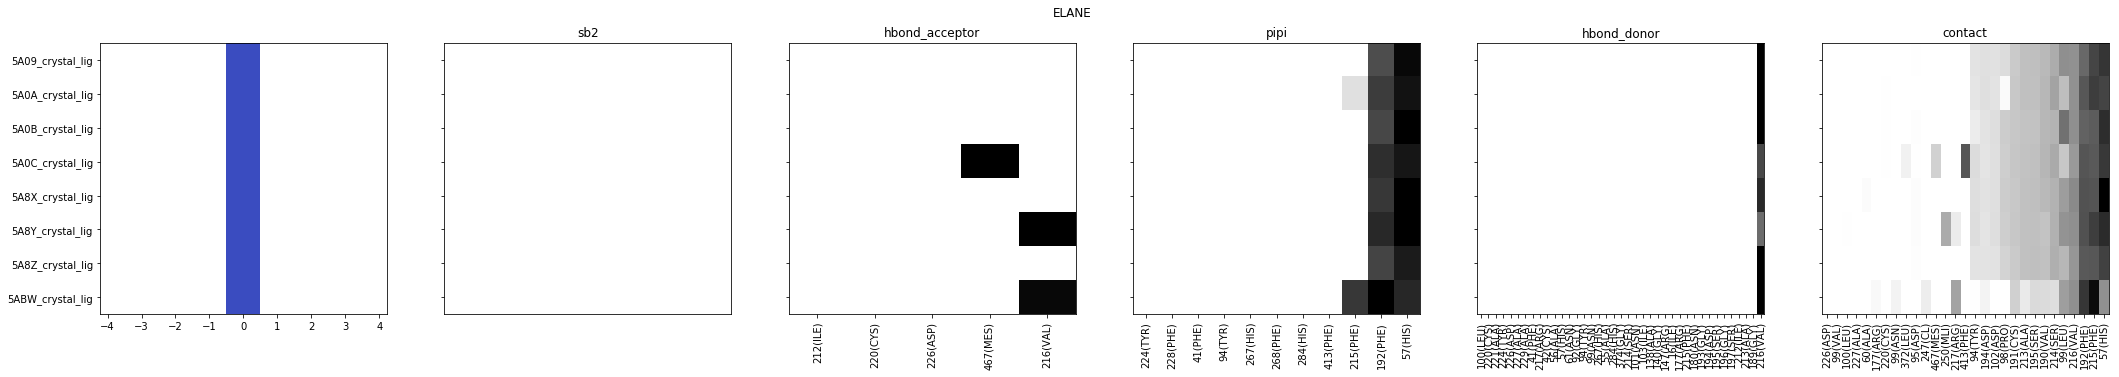

best


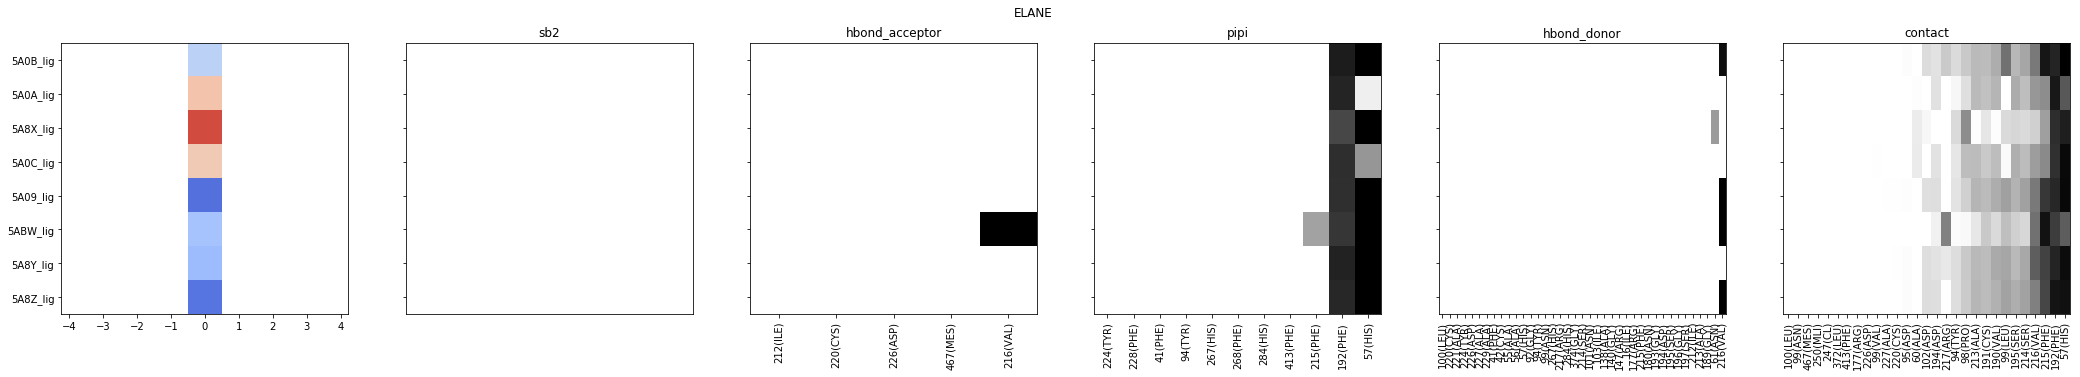

combind


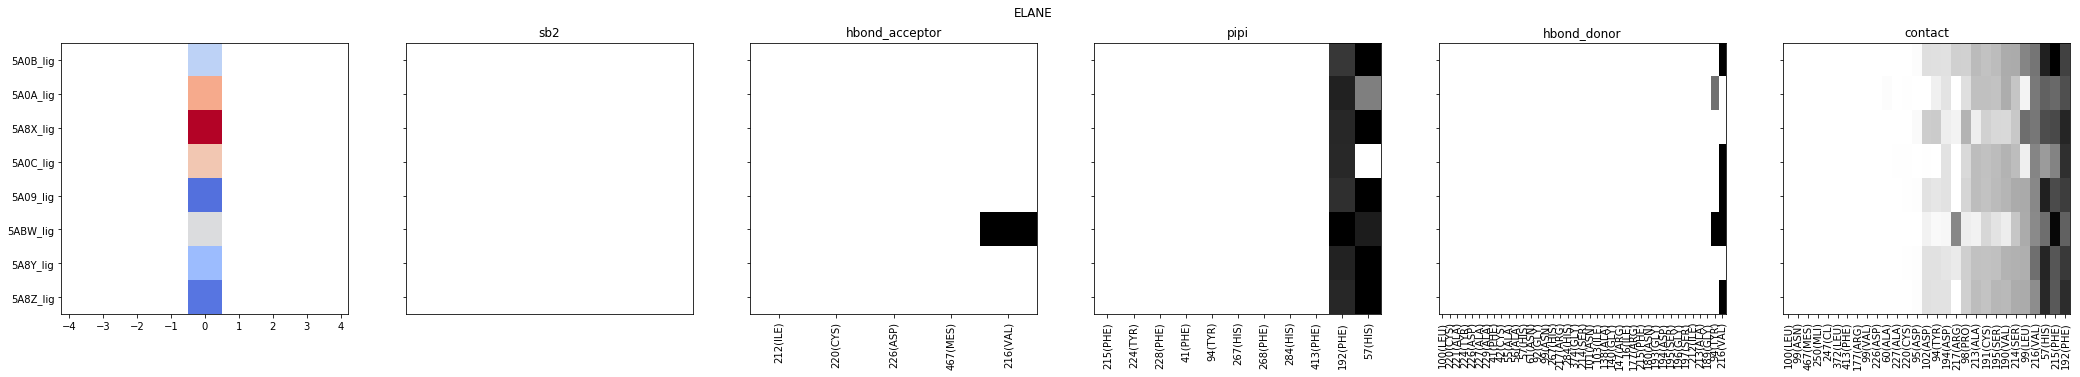

glide


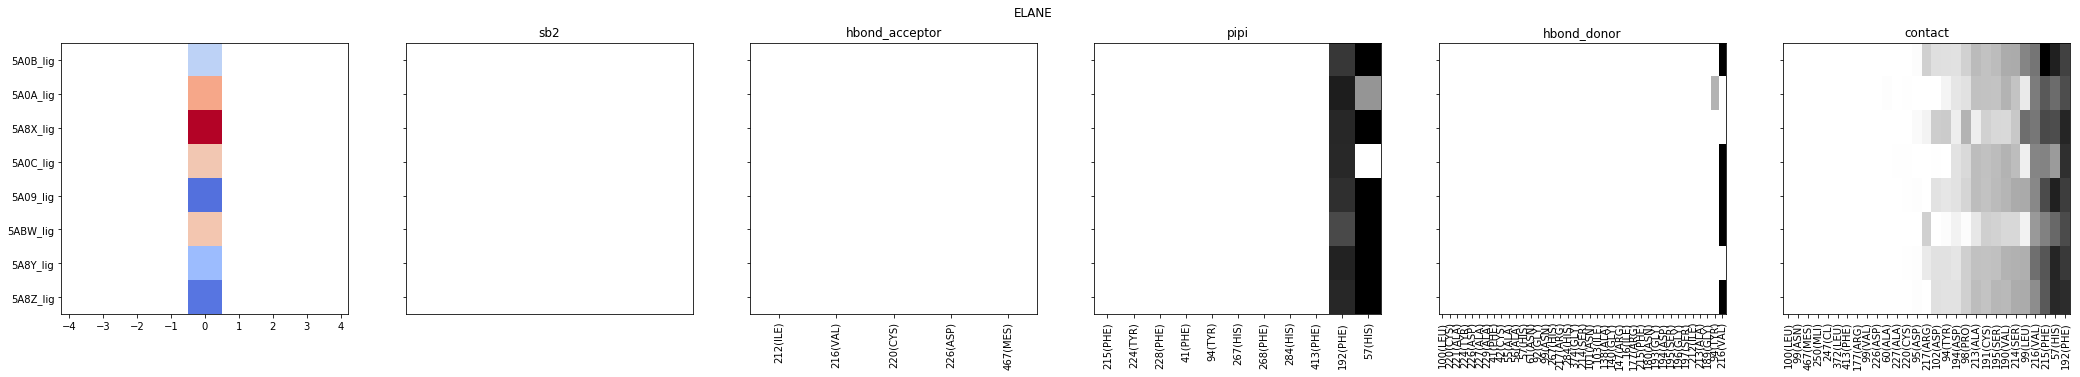

VDR
crystal


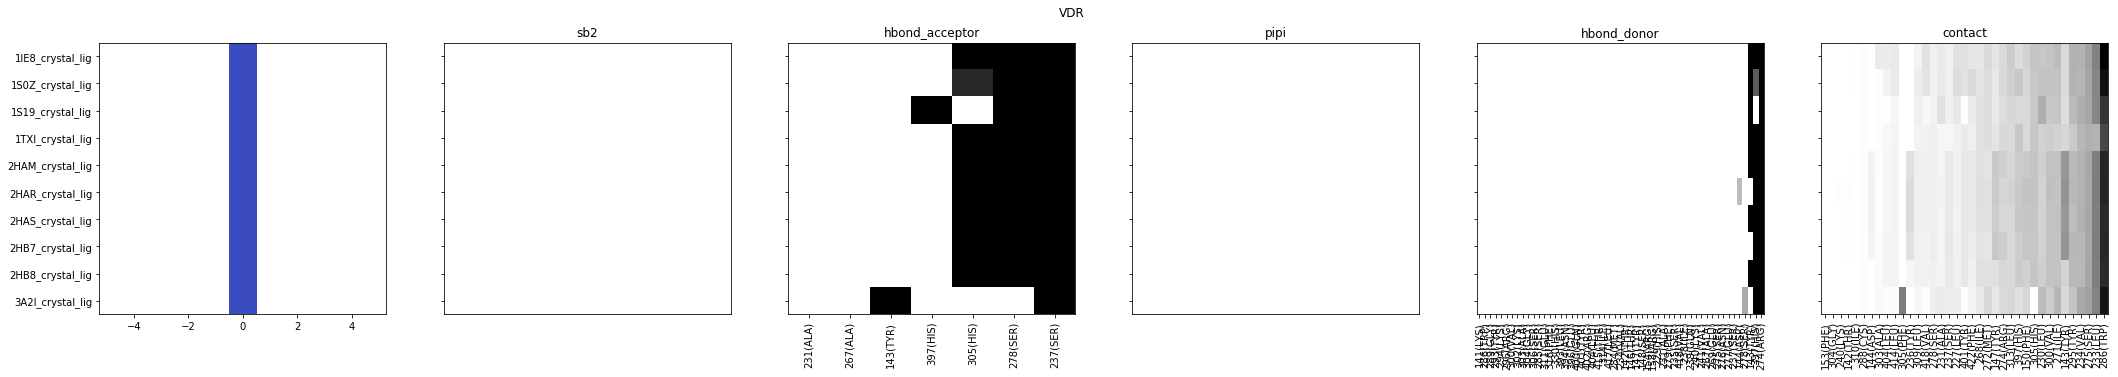

best


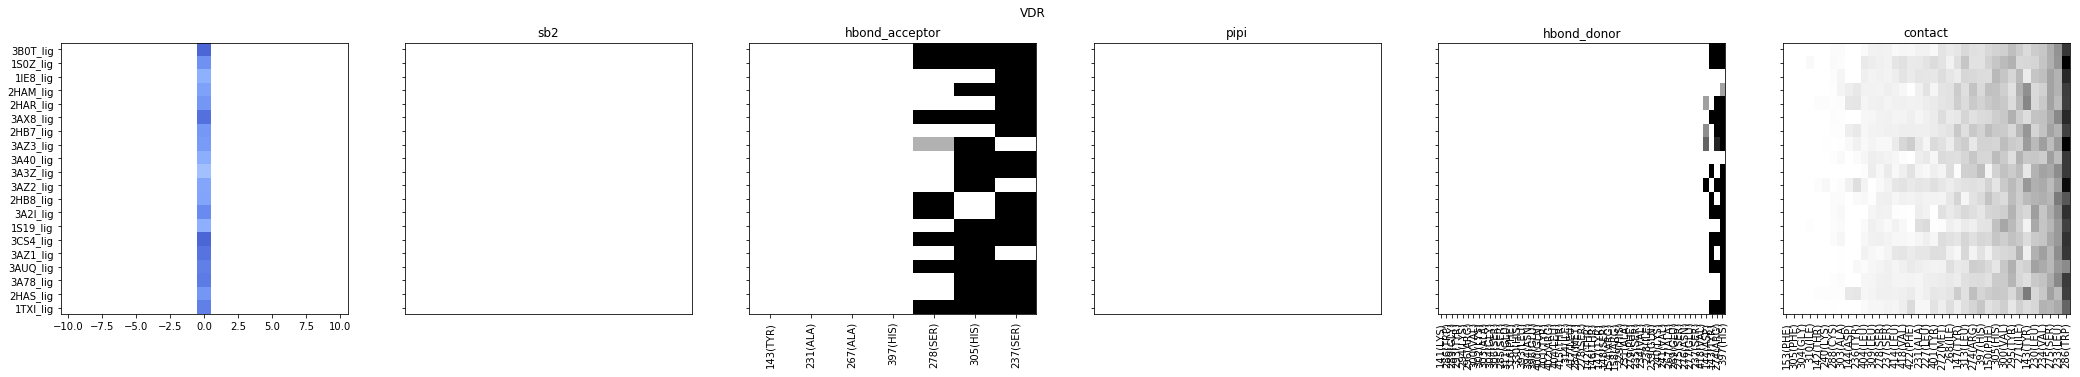

combind


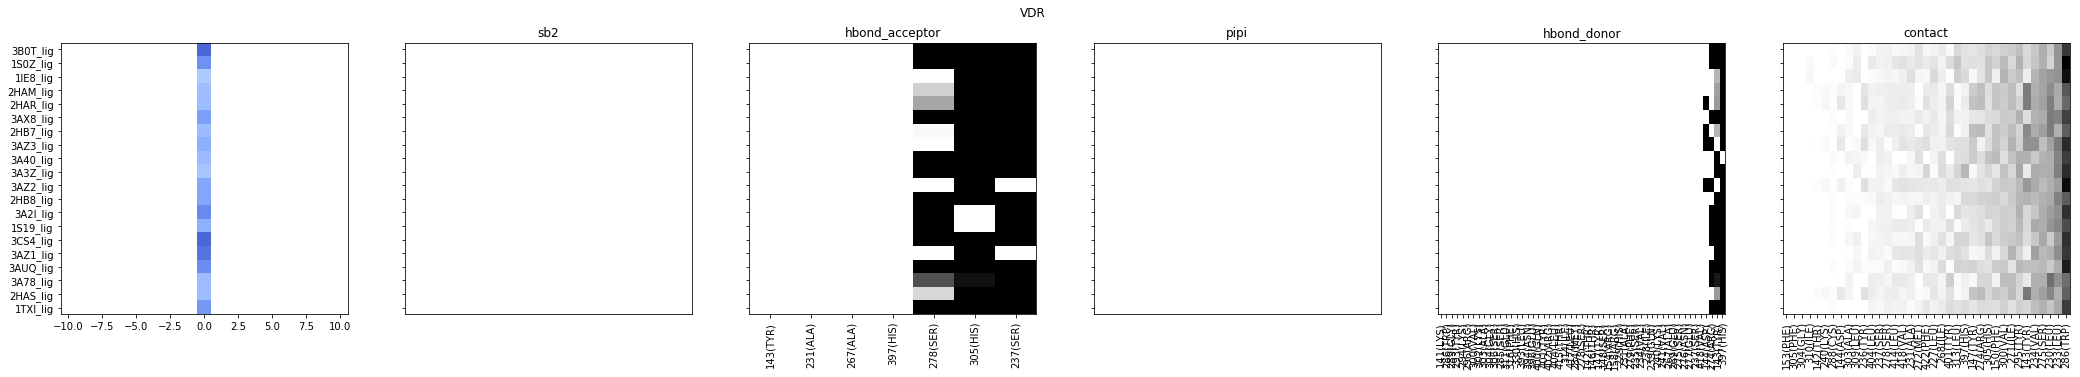

glide


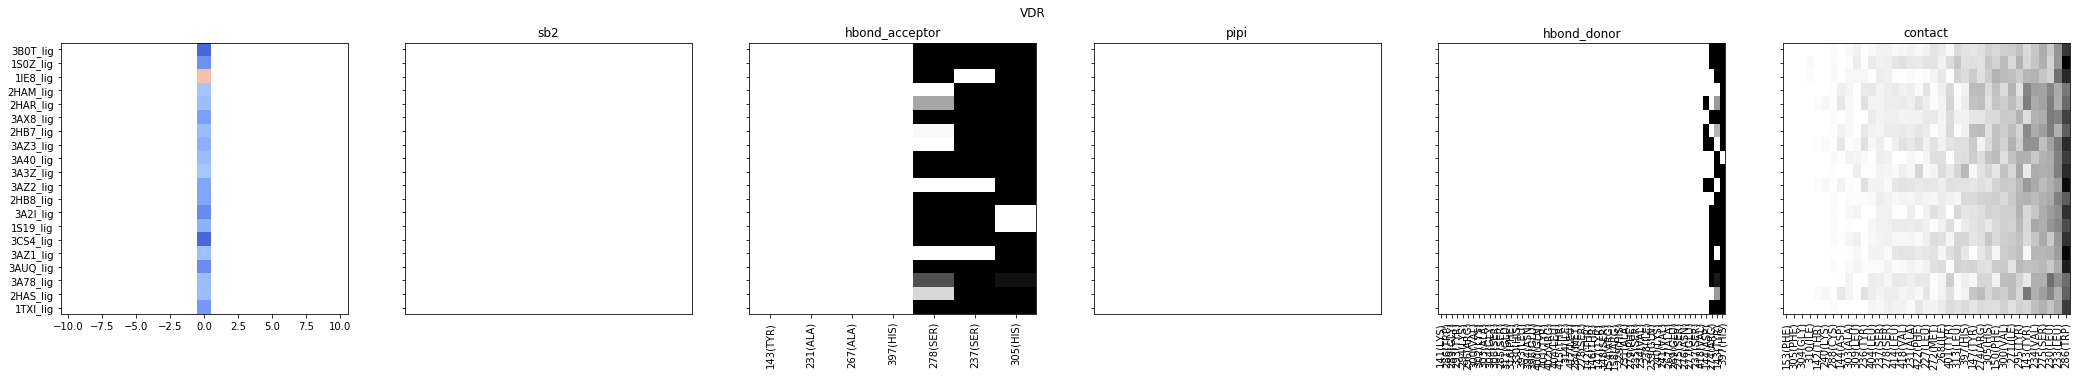

5HT2B
crystal


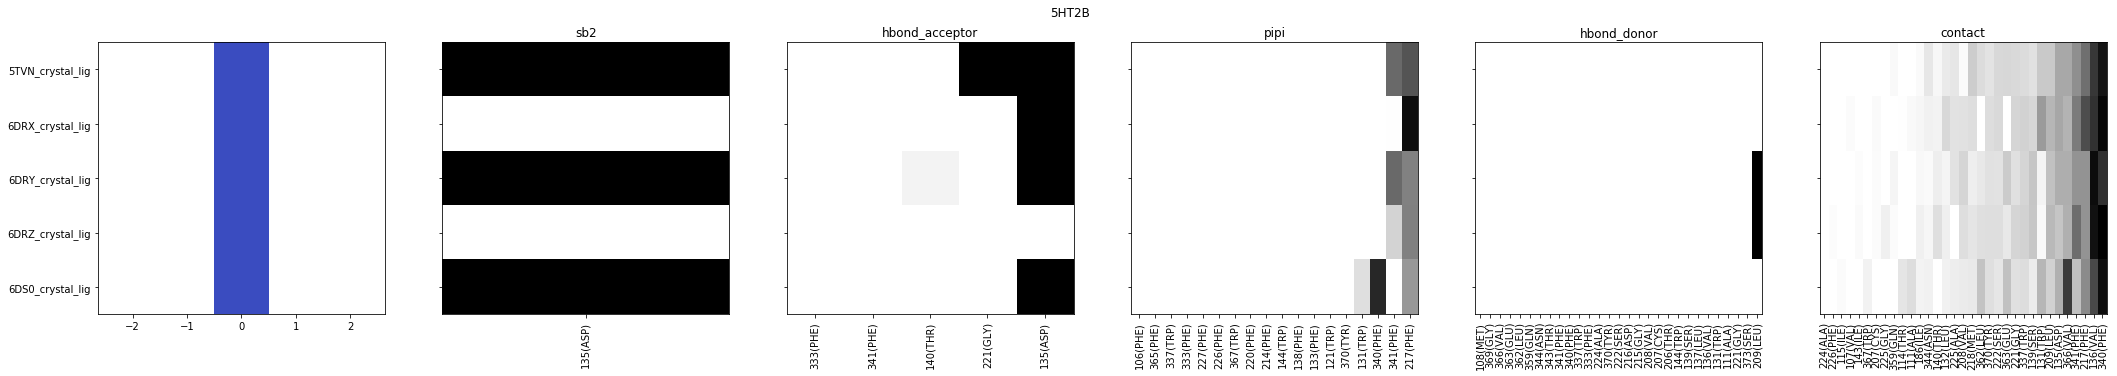

best


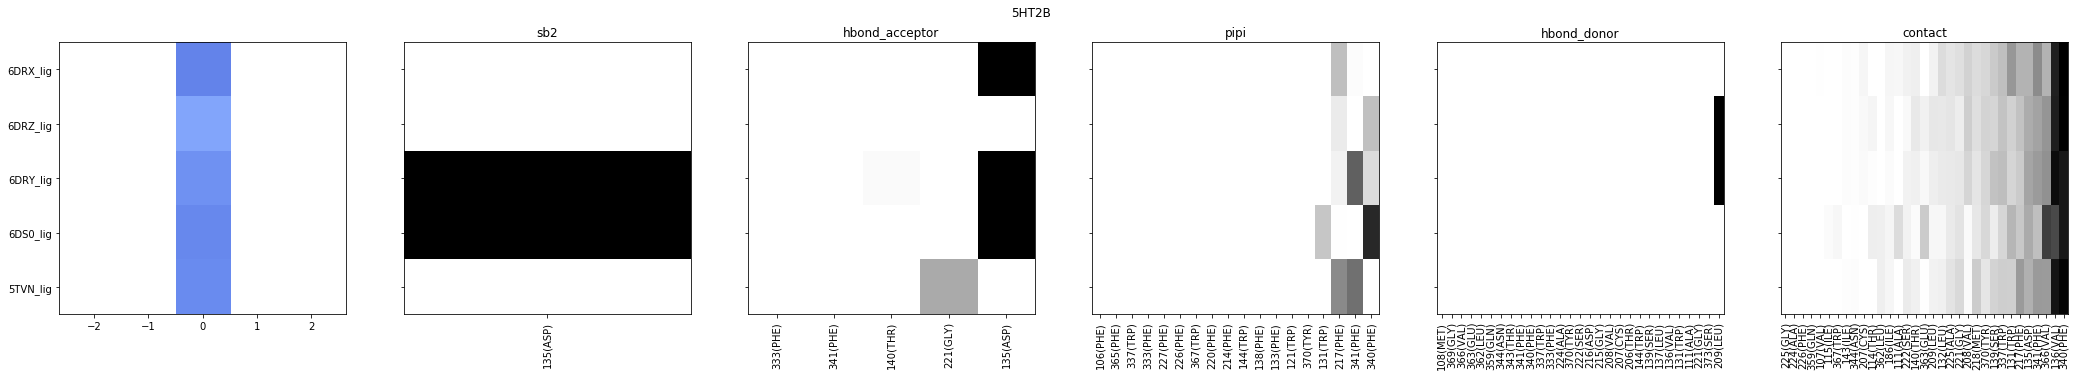

combind


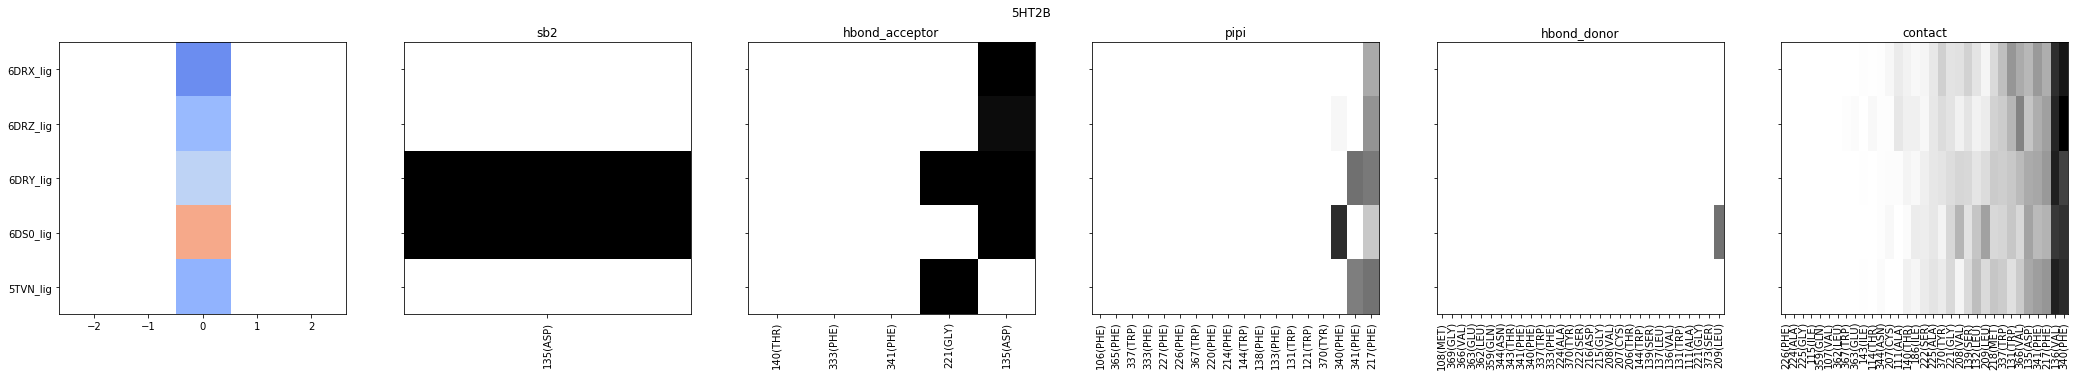

glide


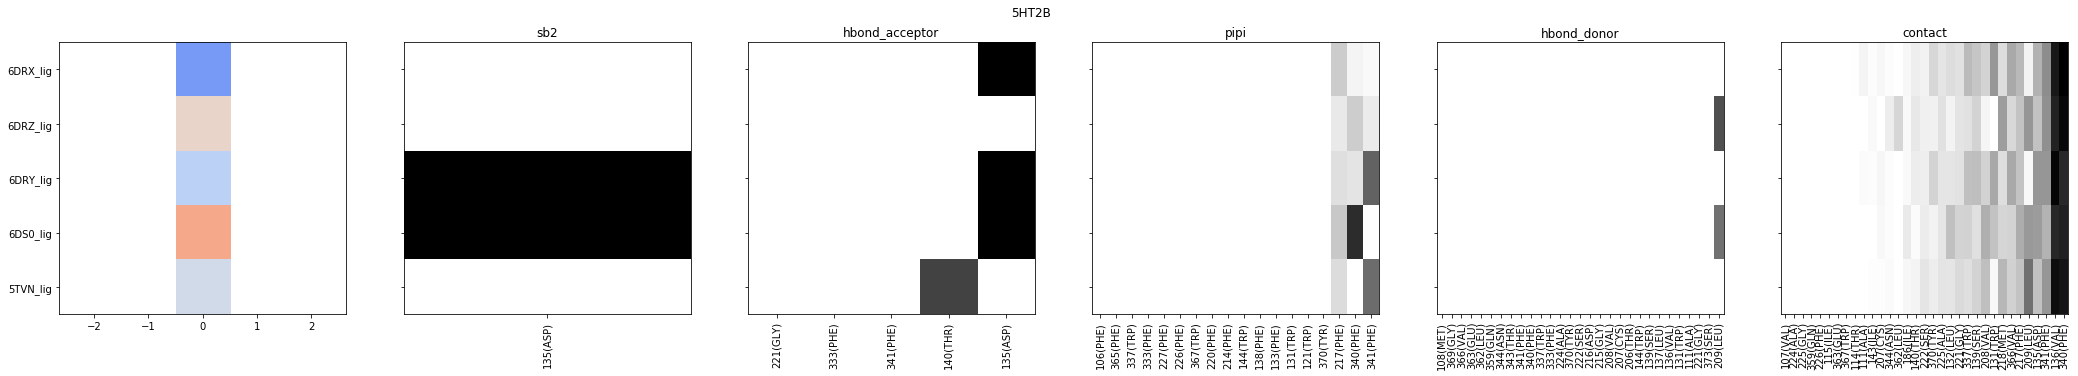

SLC6A4
crystal


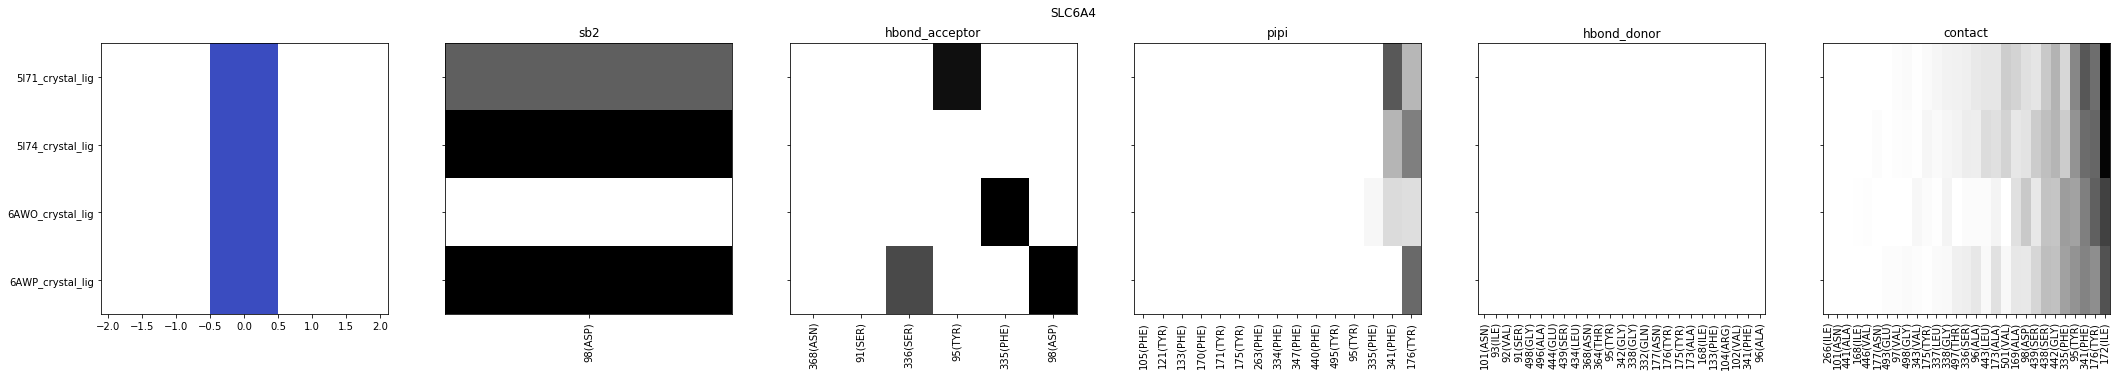

best


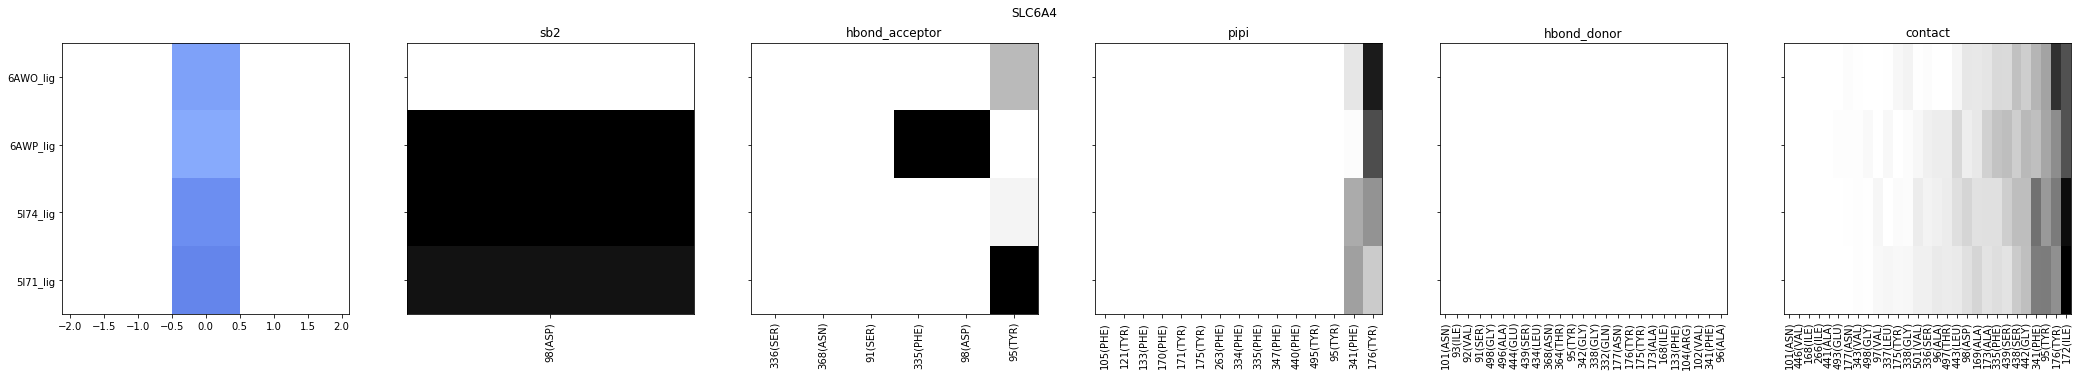

combind


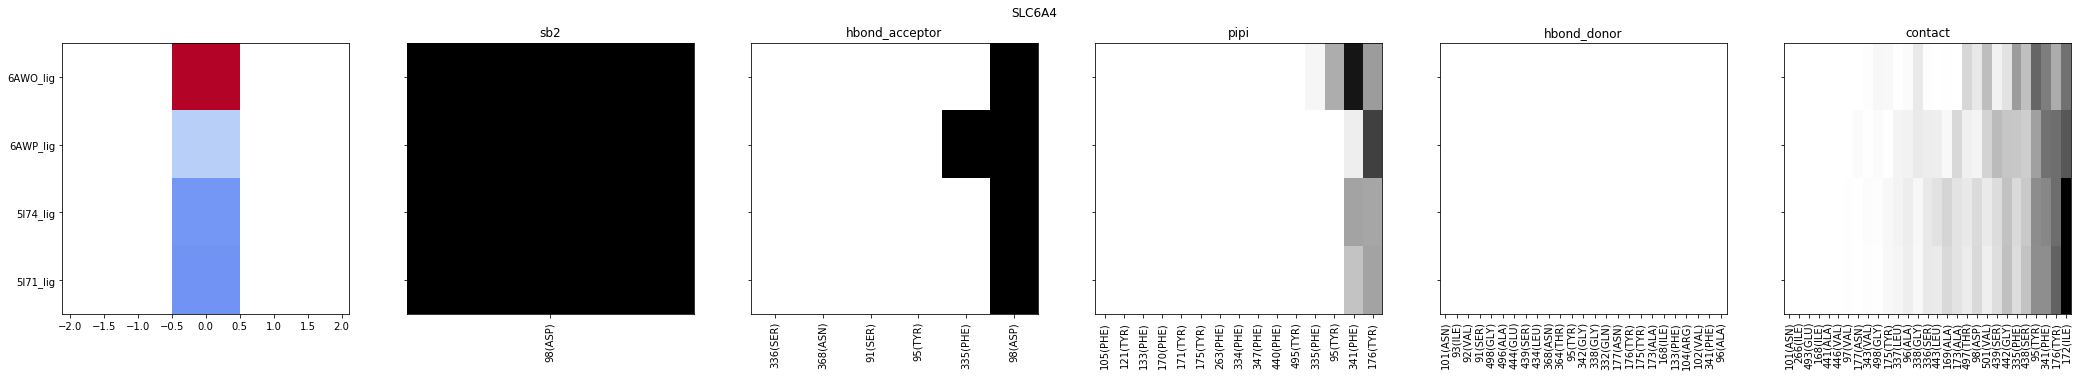

glide


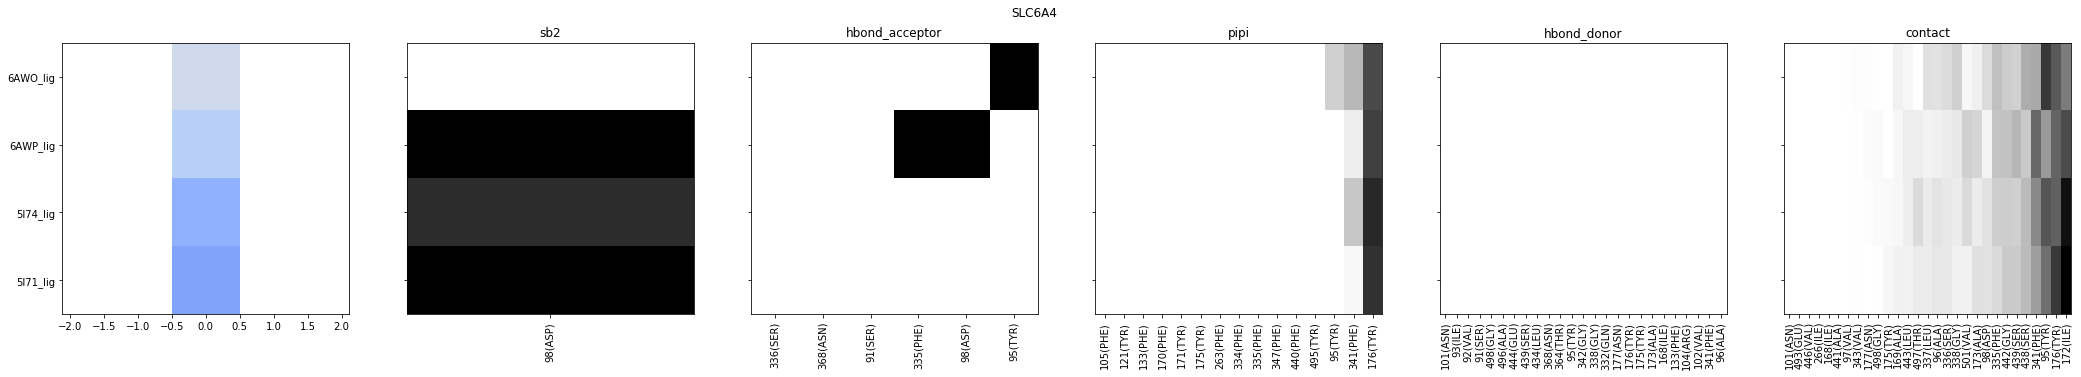

PLK1
crystal


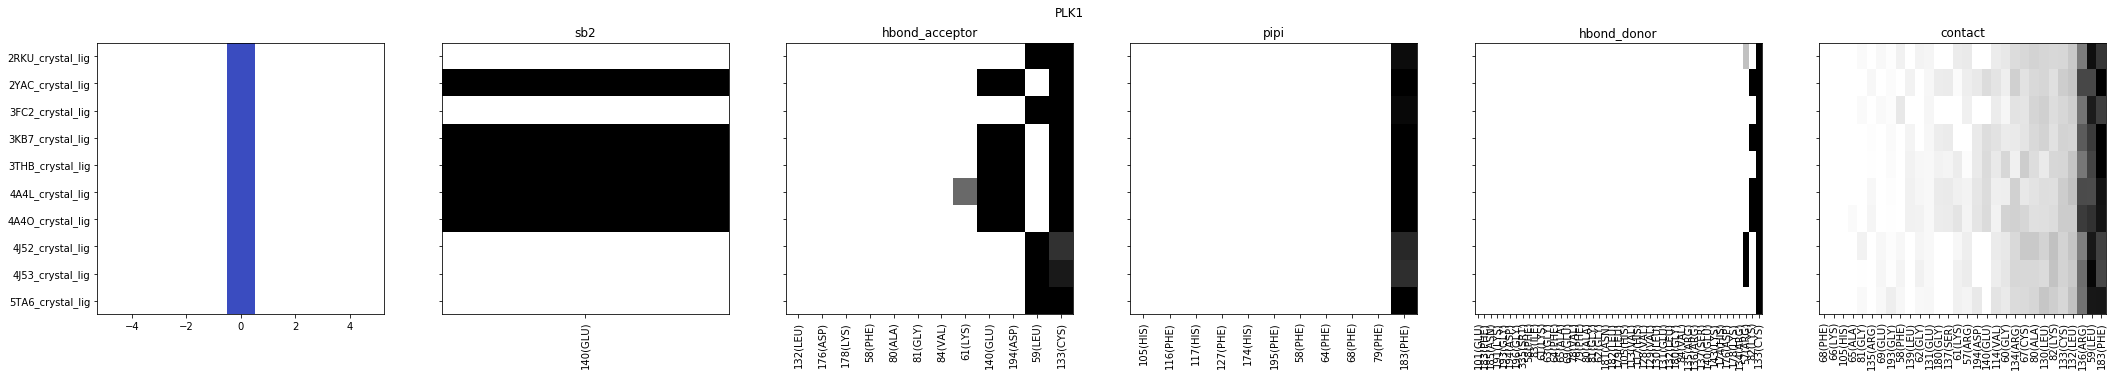

best


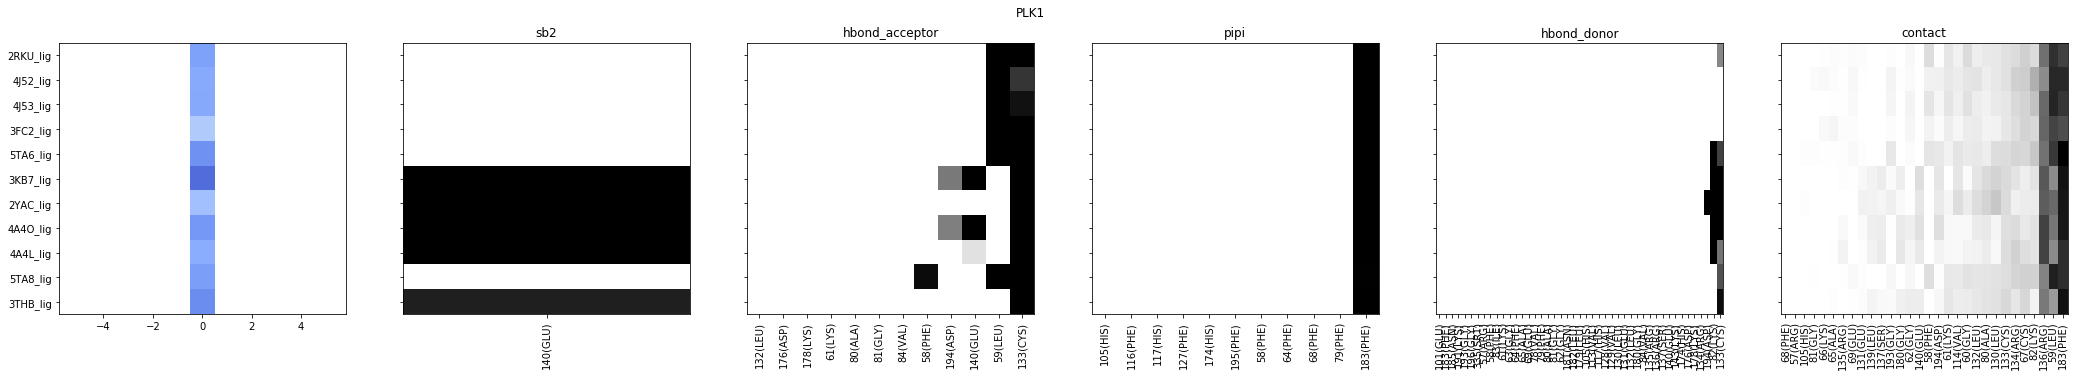

combind


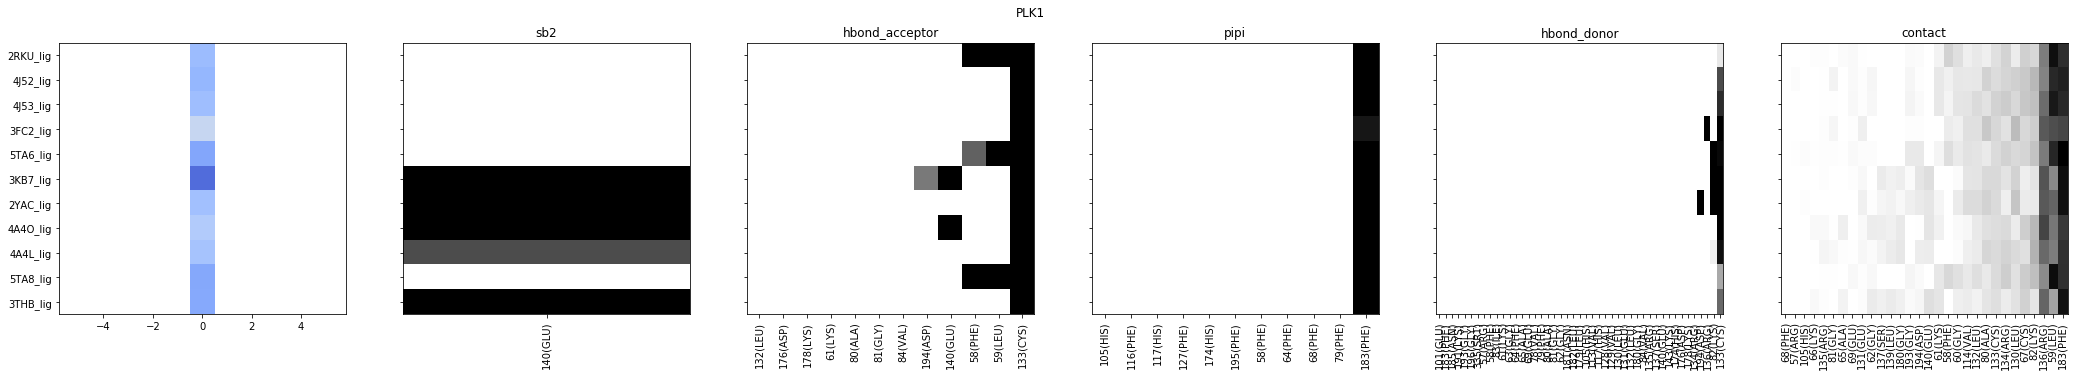

glide


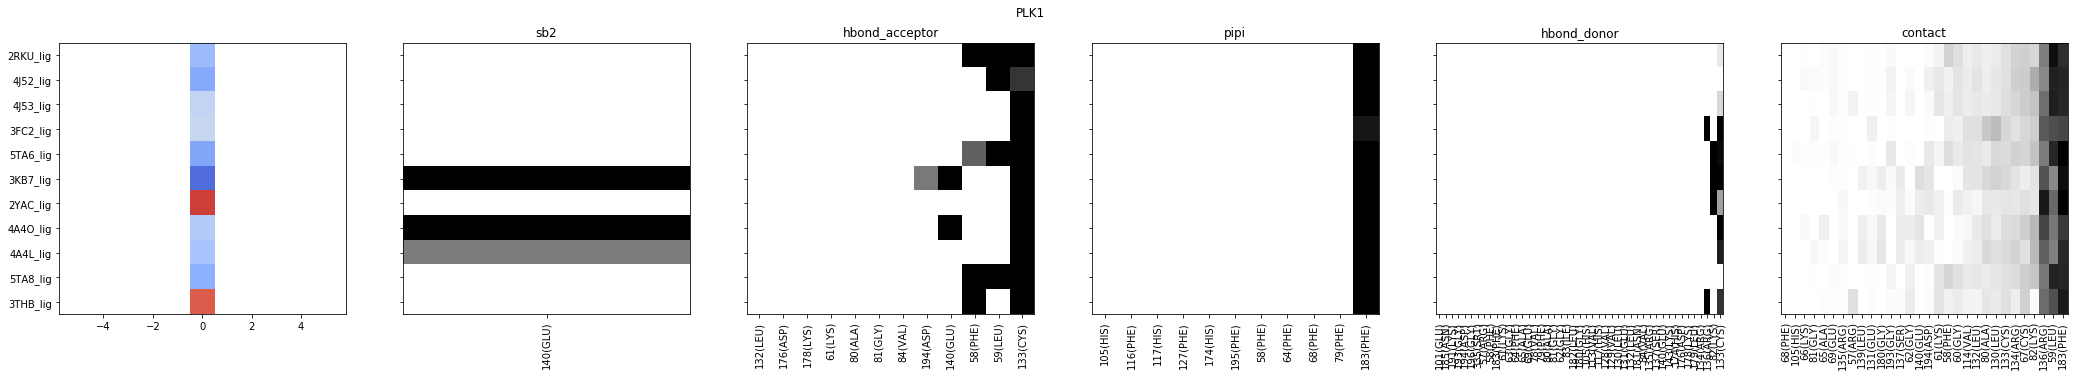

MGLUR5
crystal


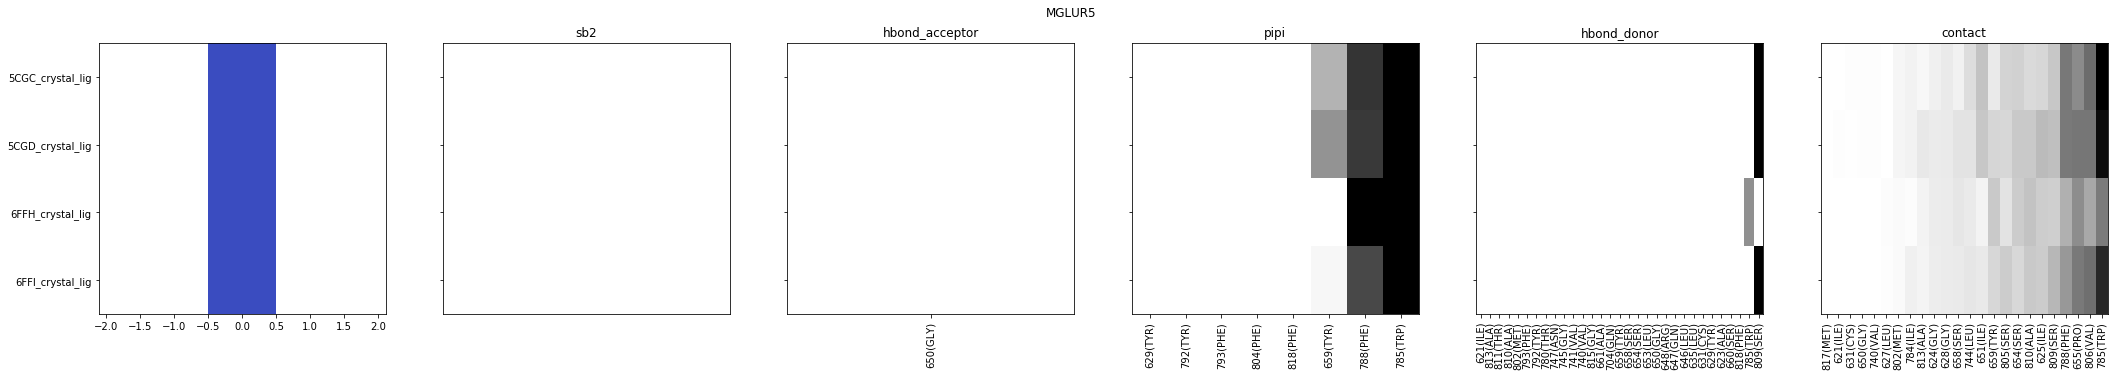

best


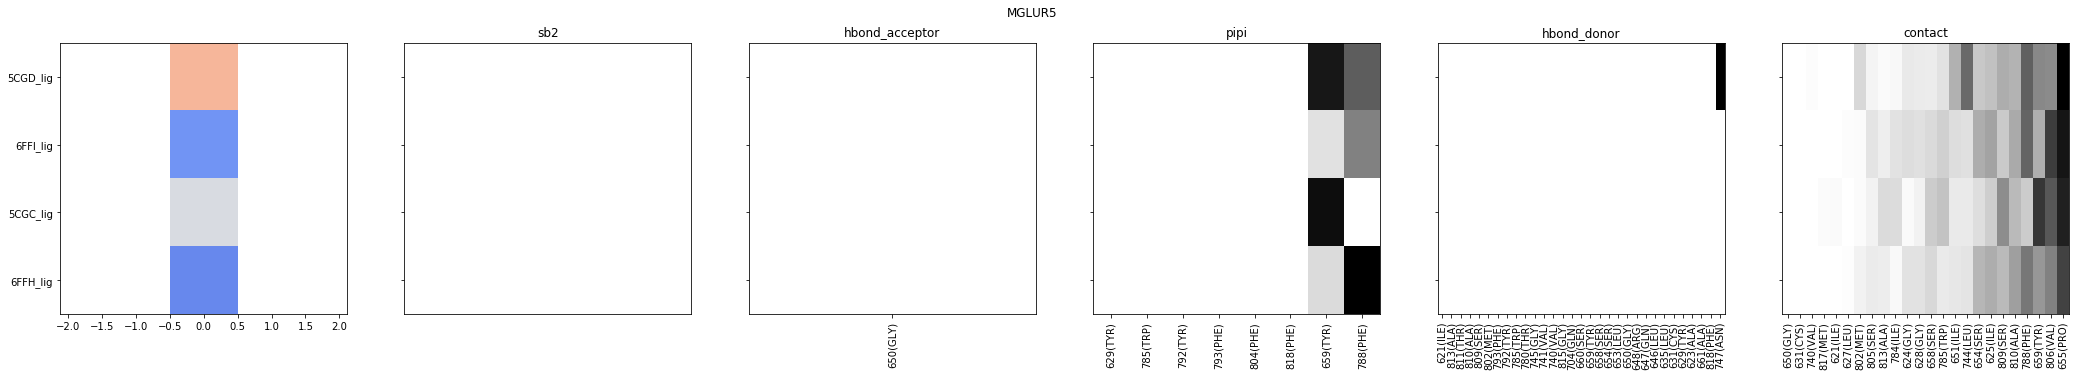

combind


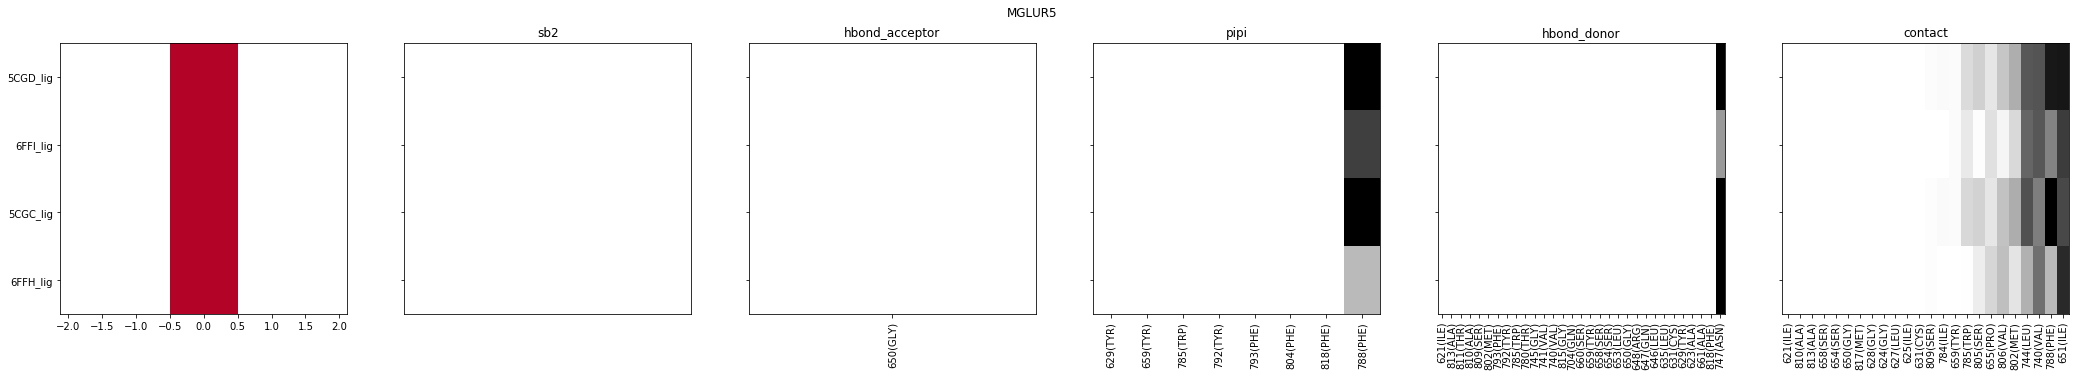

glide


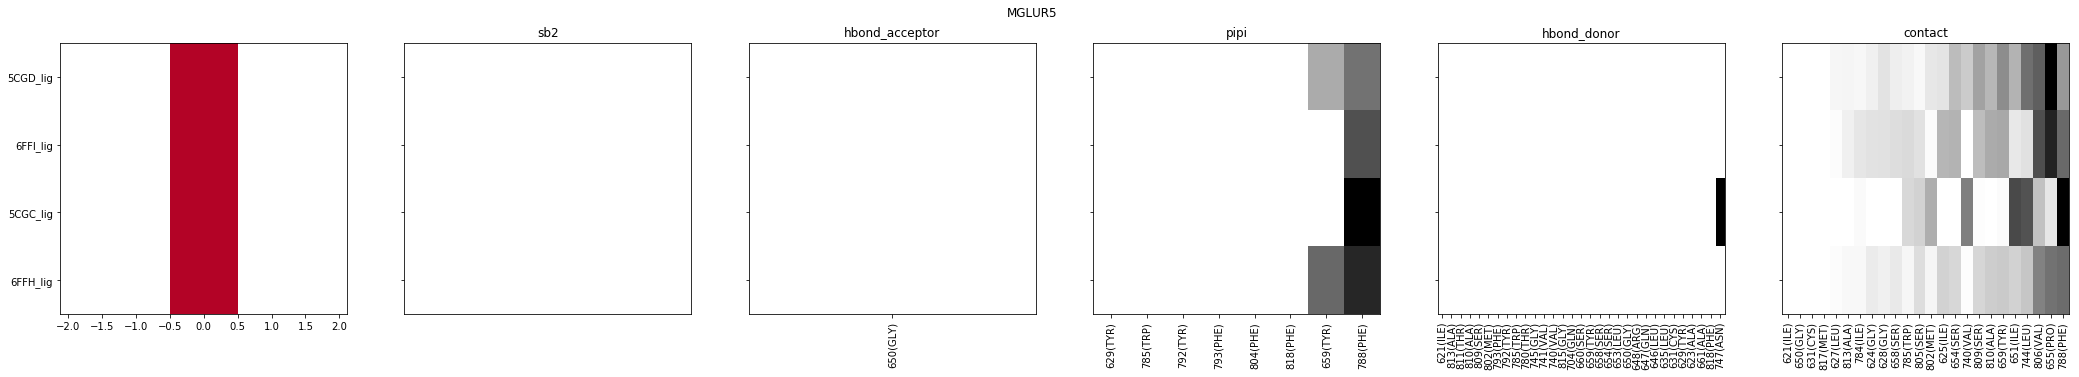

ERA
crystal


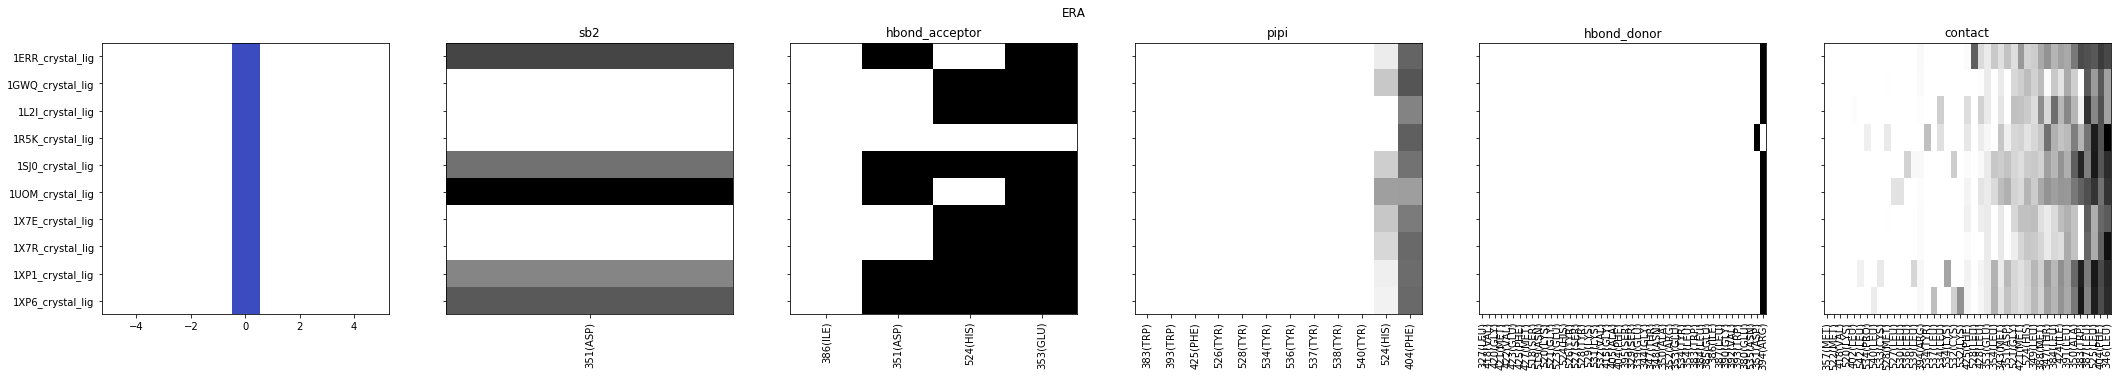

best


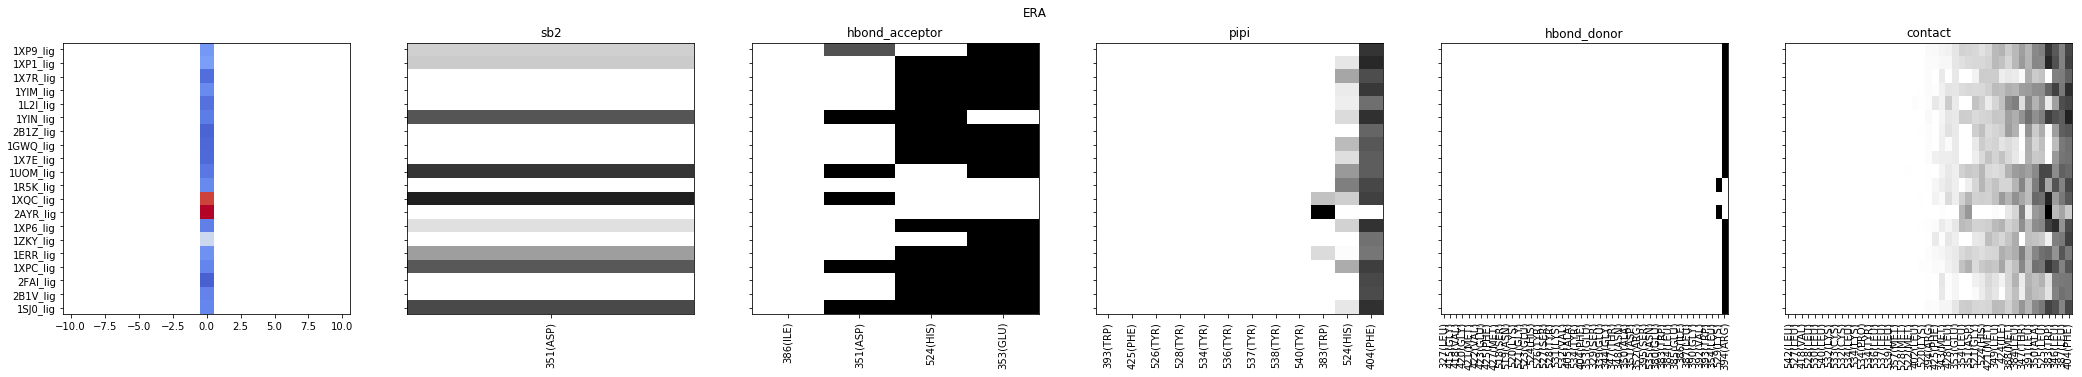

combind


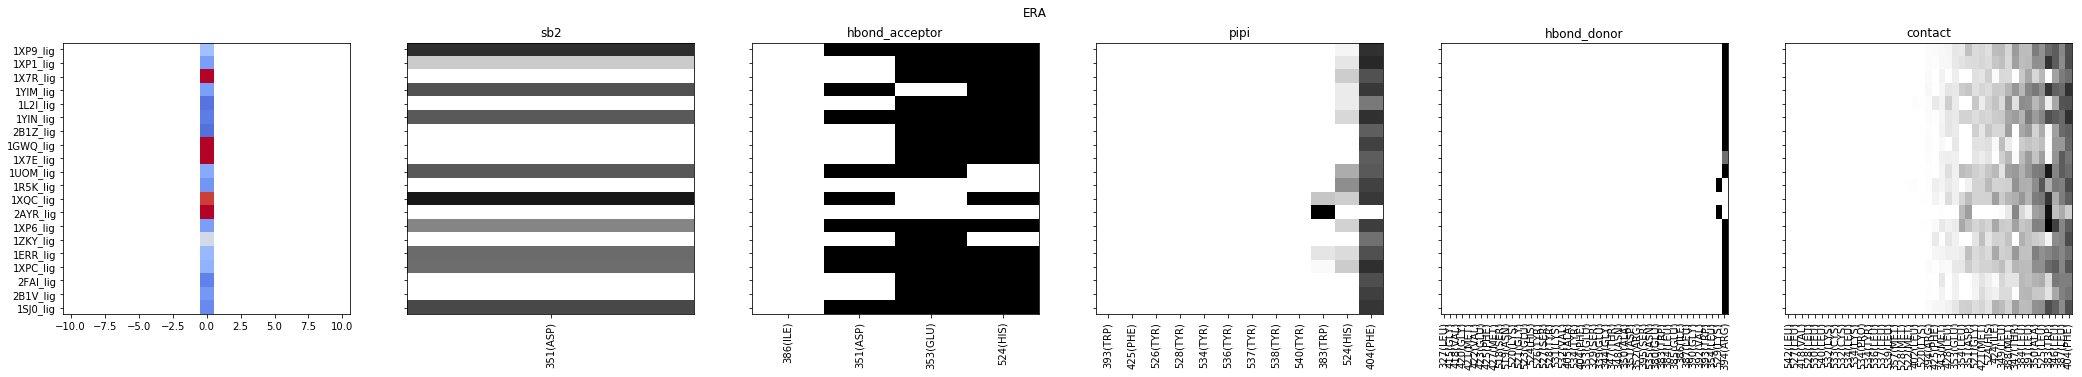

glide


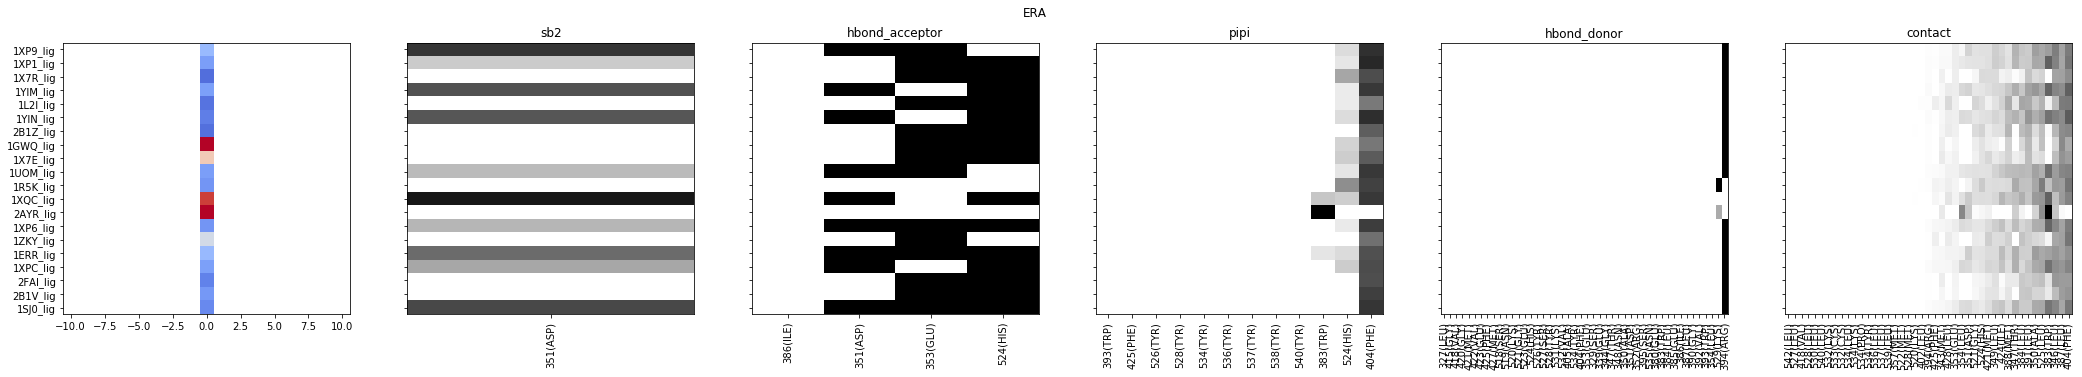

F10
crystal


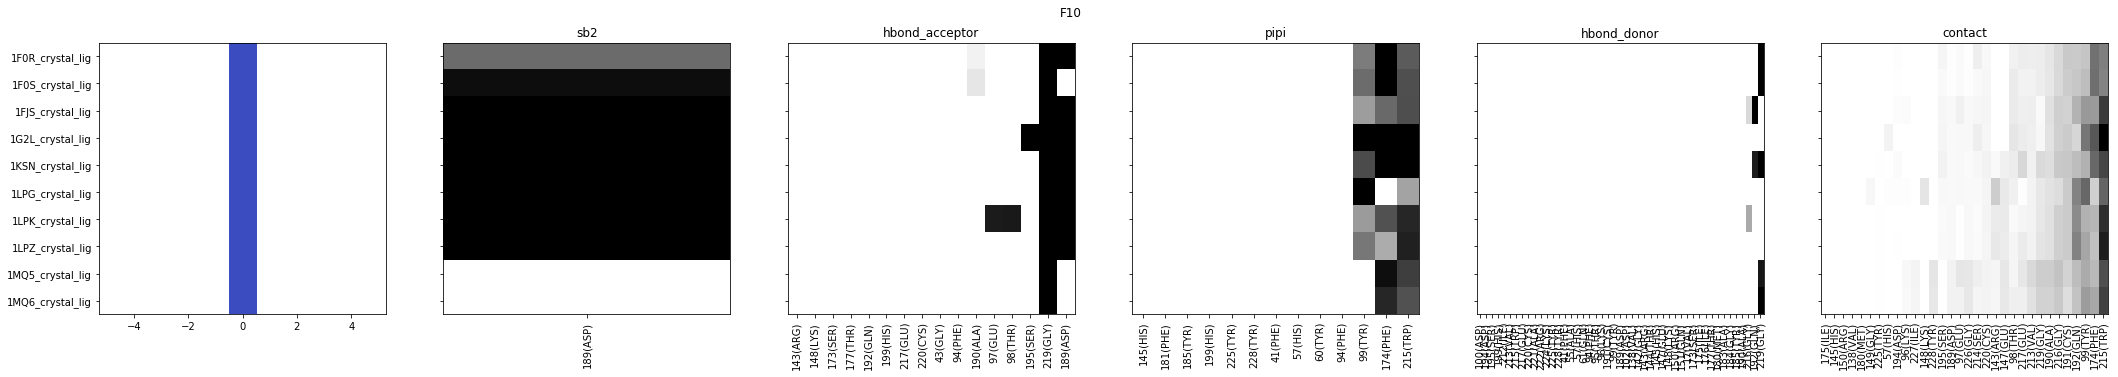

best


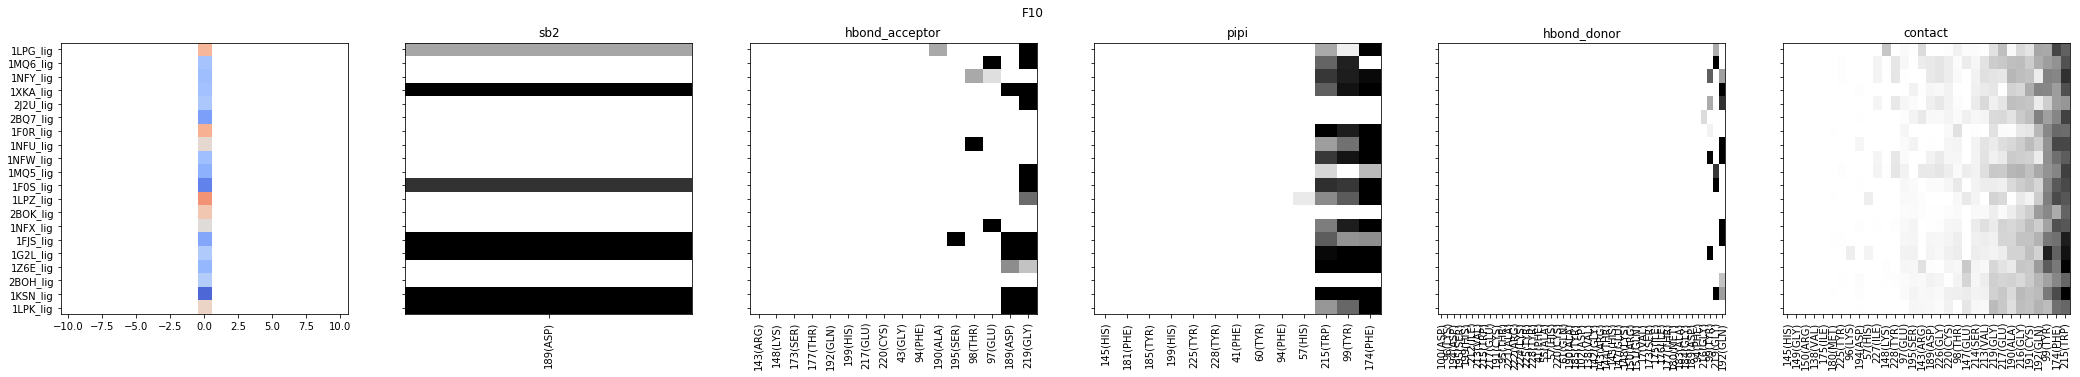

combind


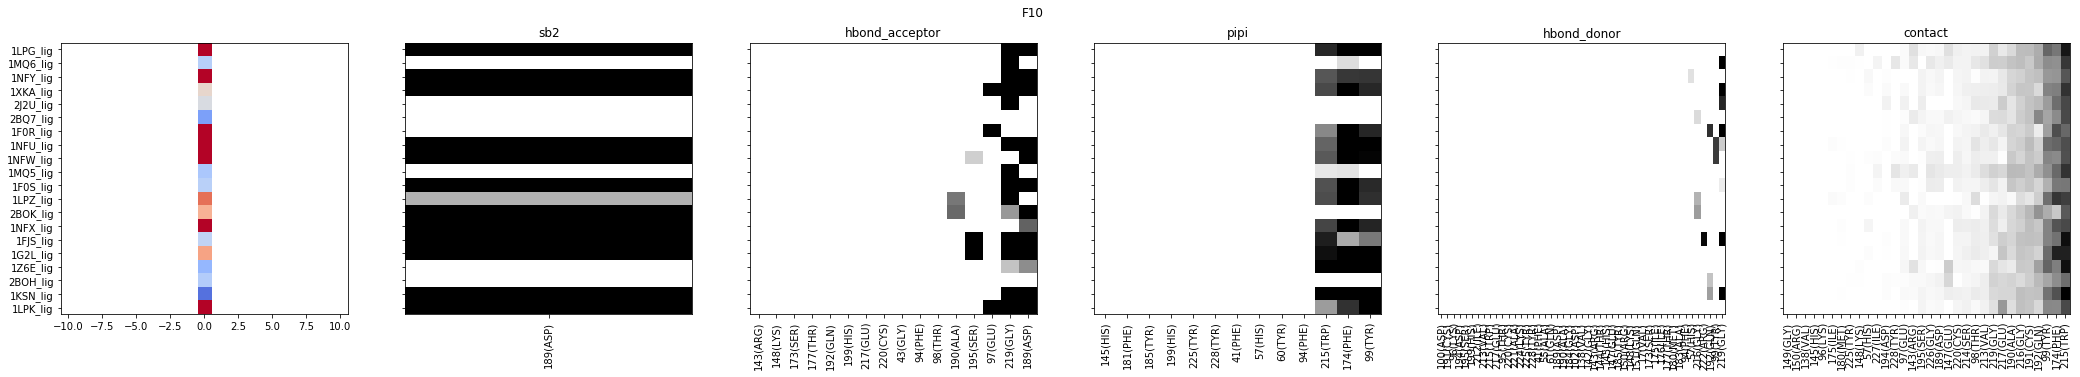

glide


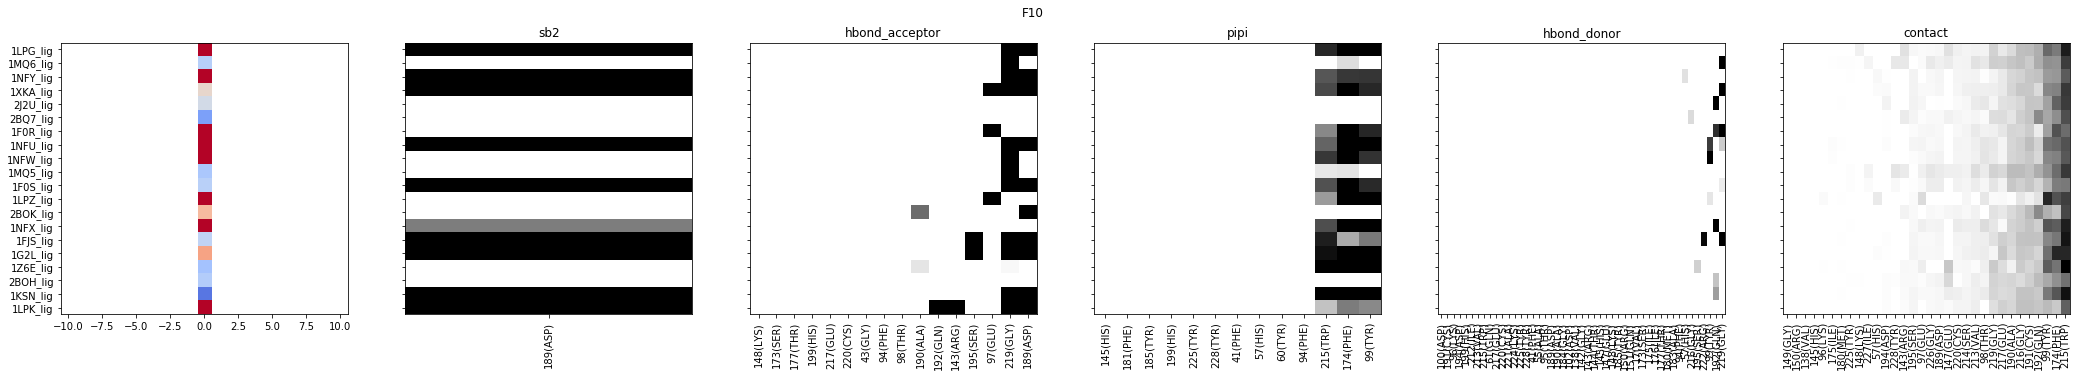

GLUT1
crystal


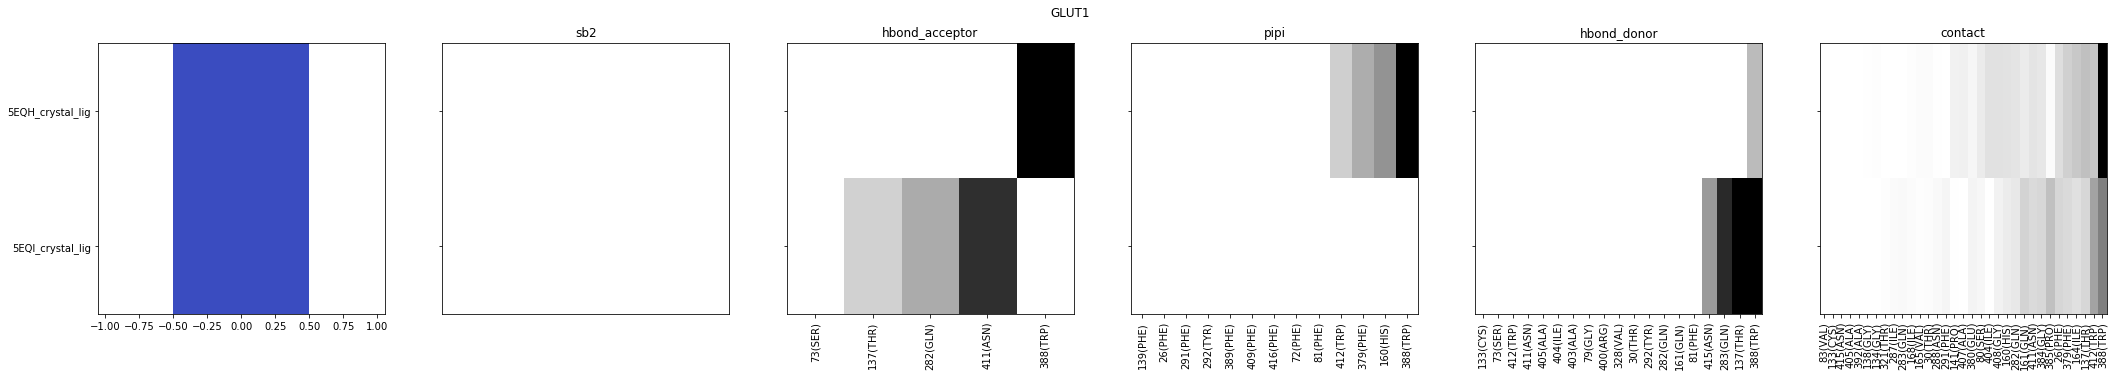

best


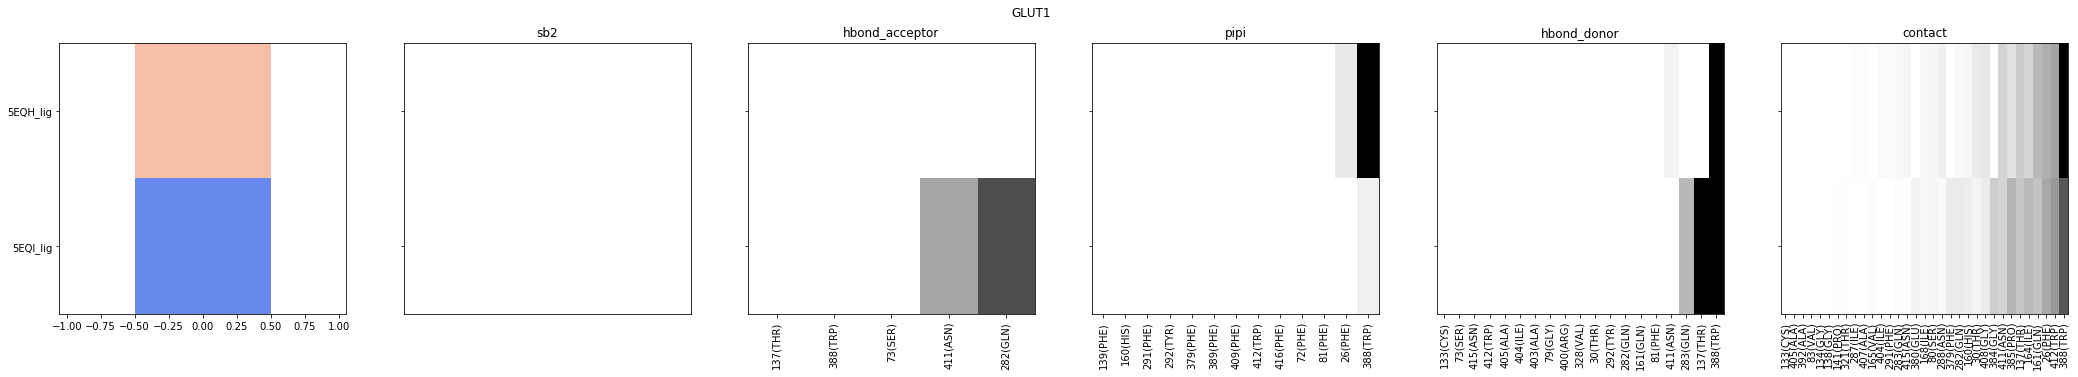

combind


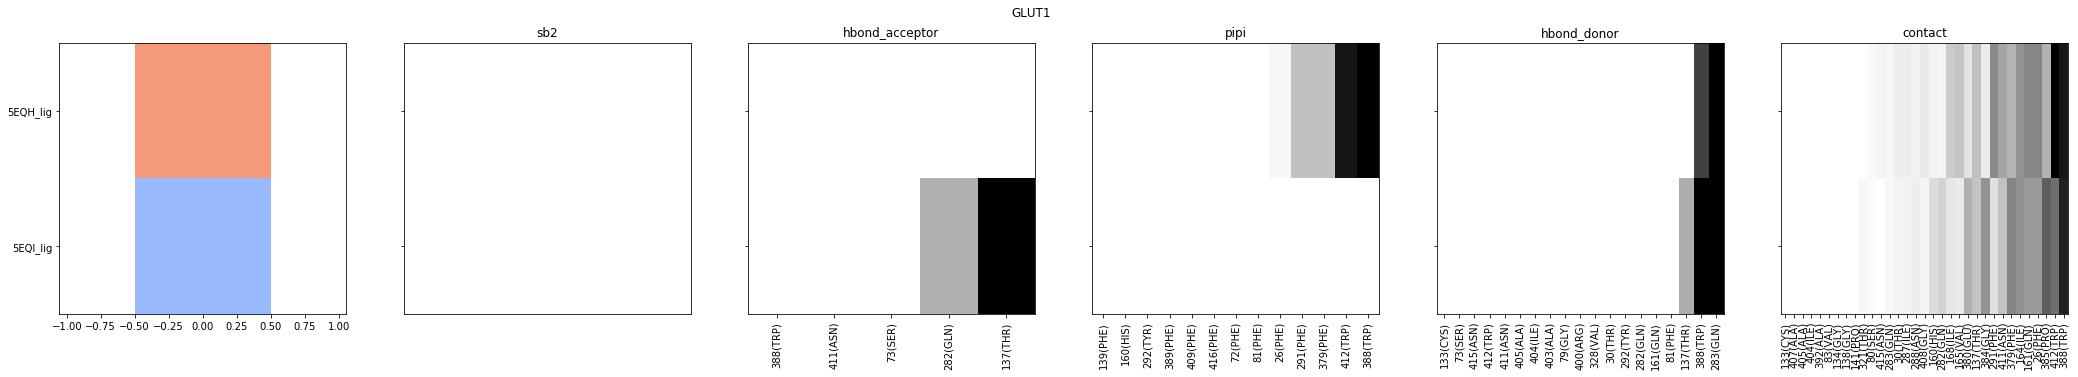

glide


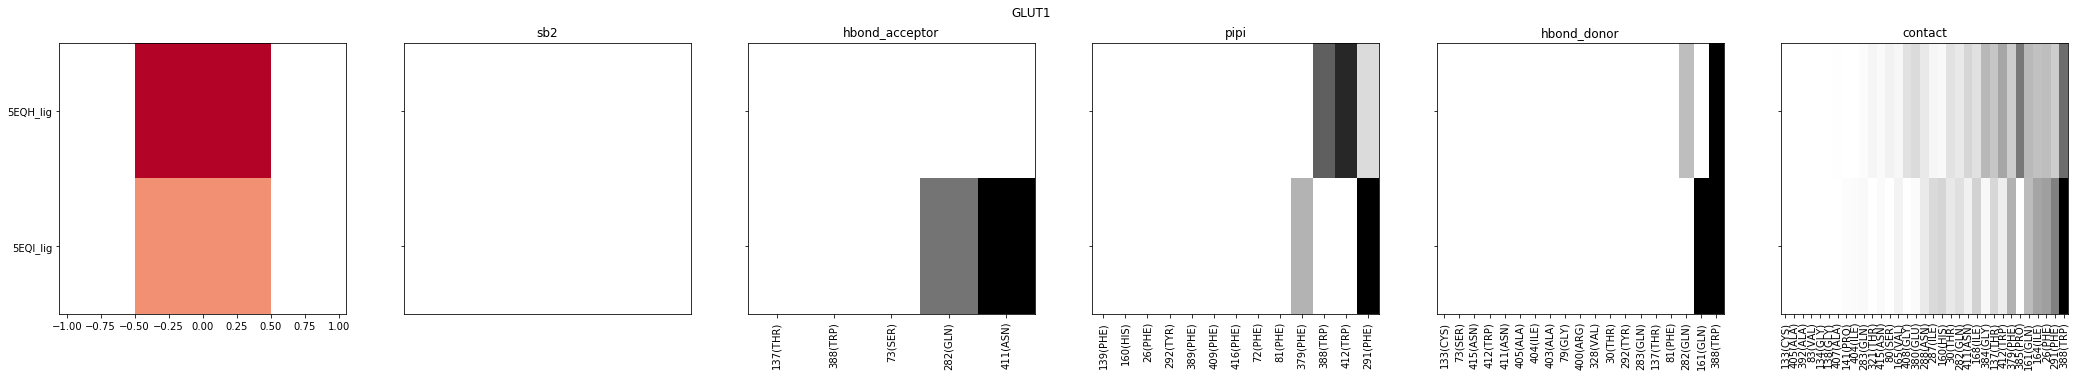

SMO
crystal


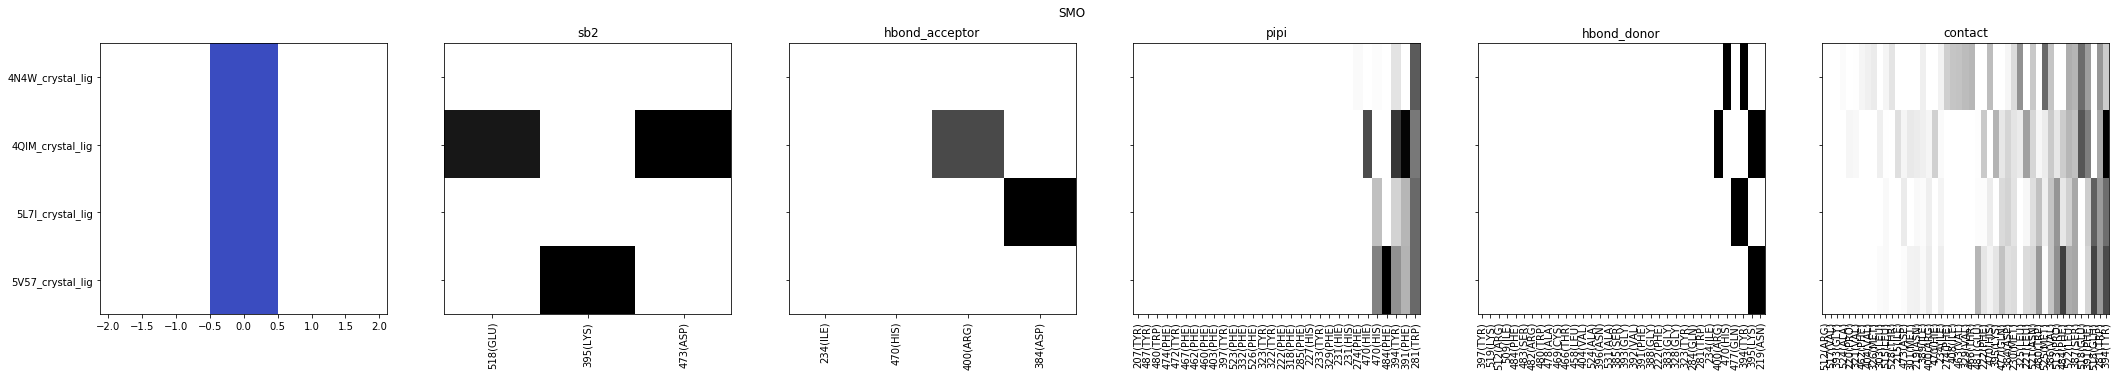

best


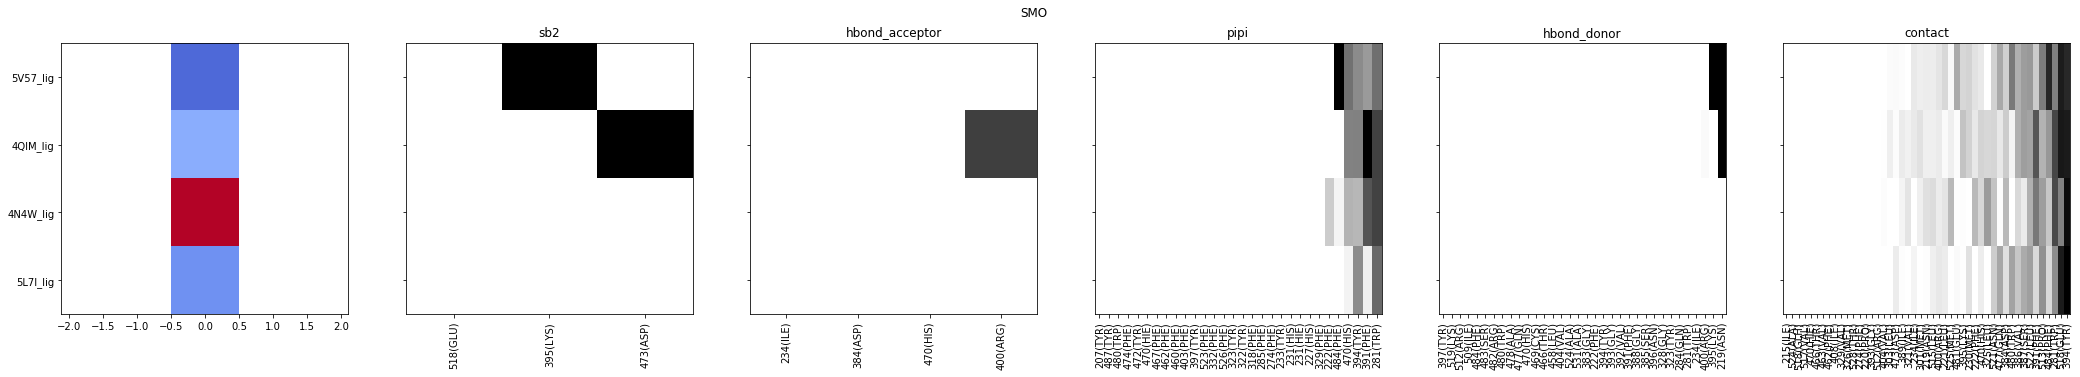

combind


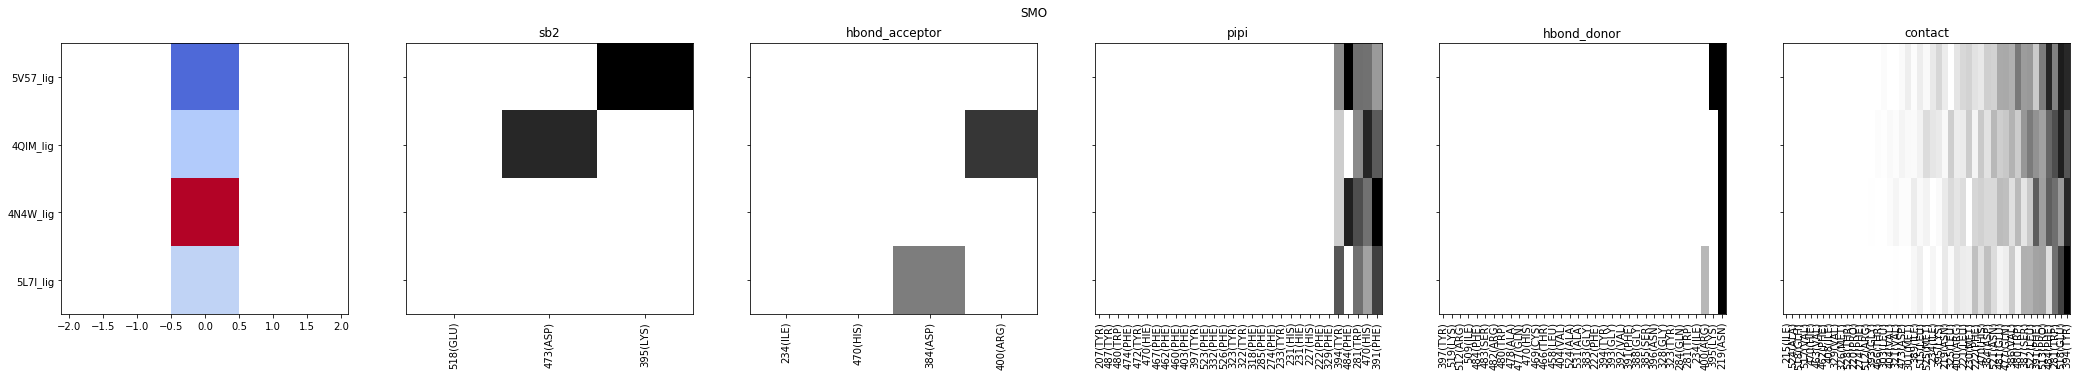

glide


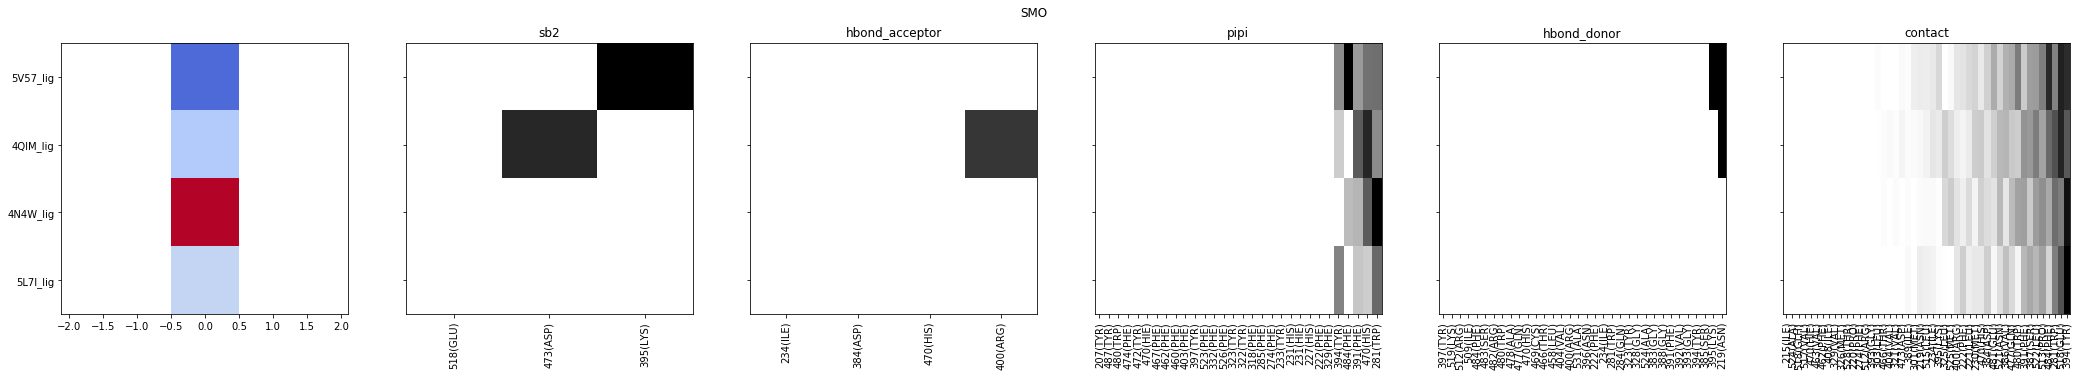

DAT
crystal


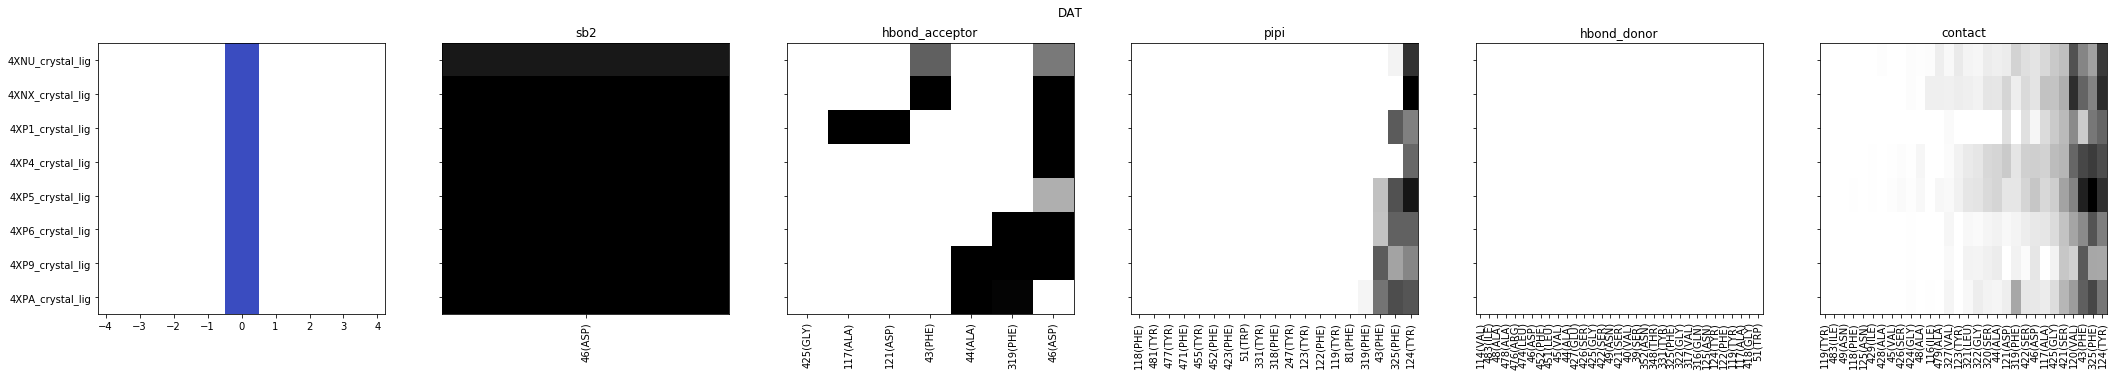

best


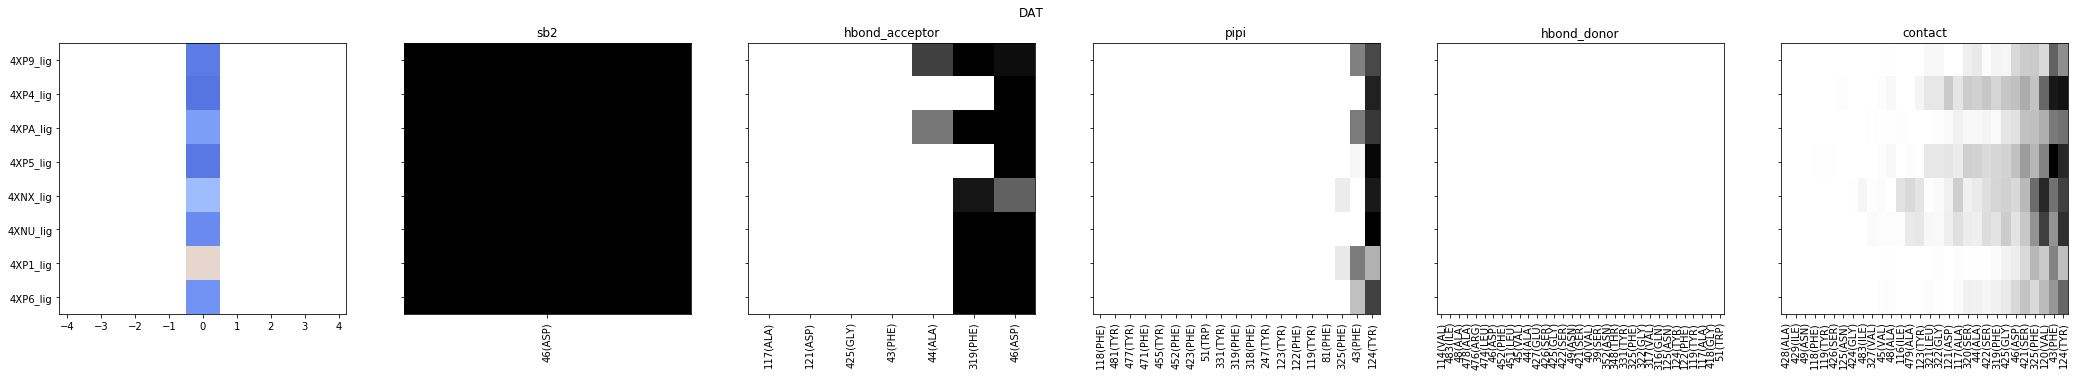

combind


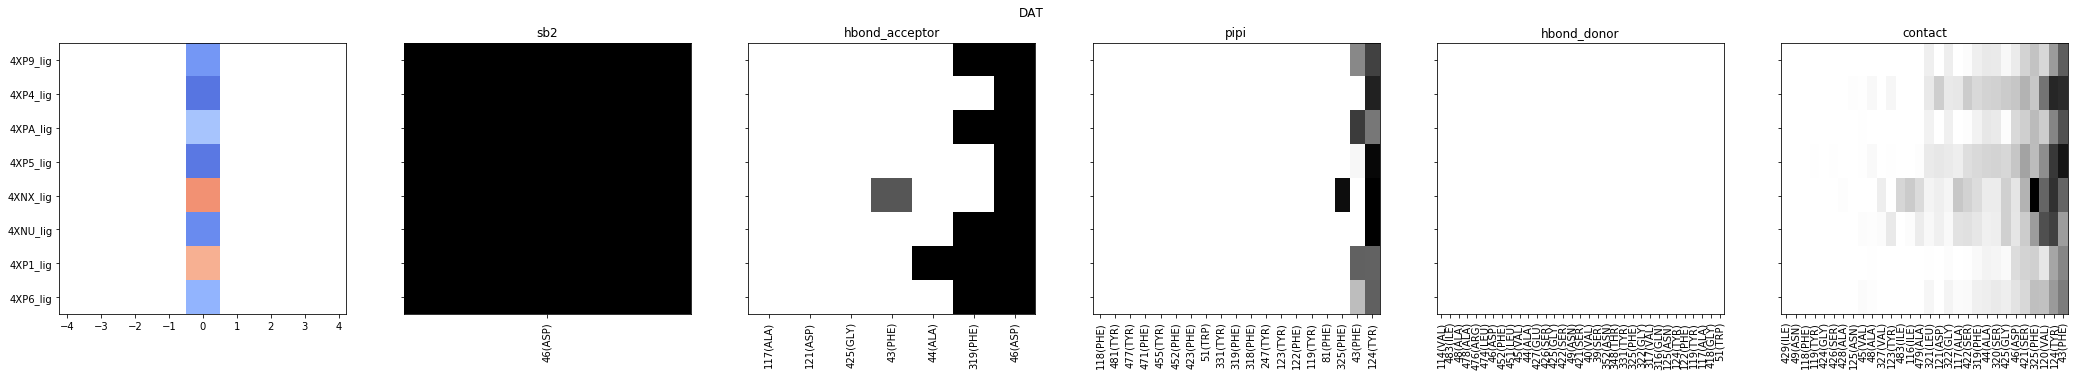

glide


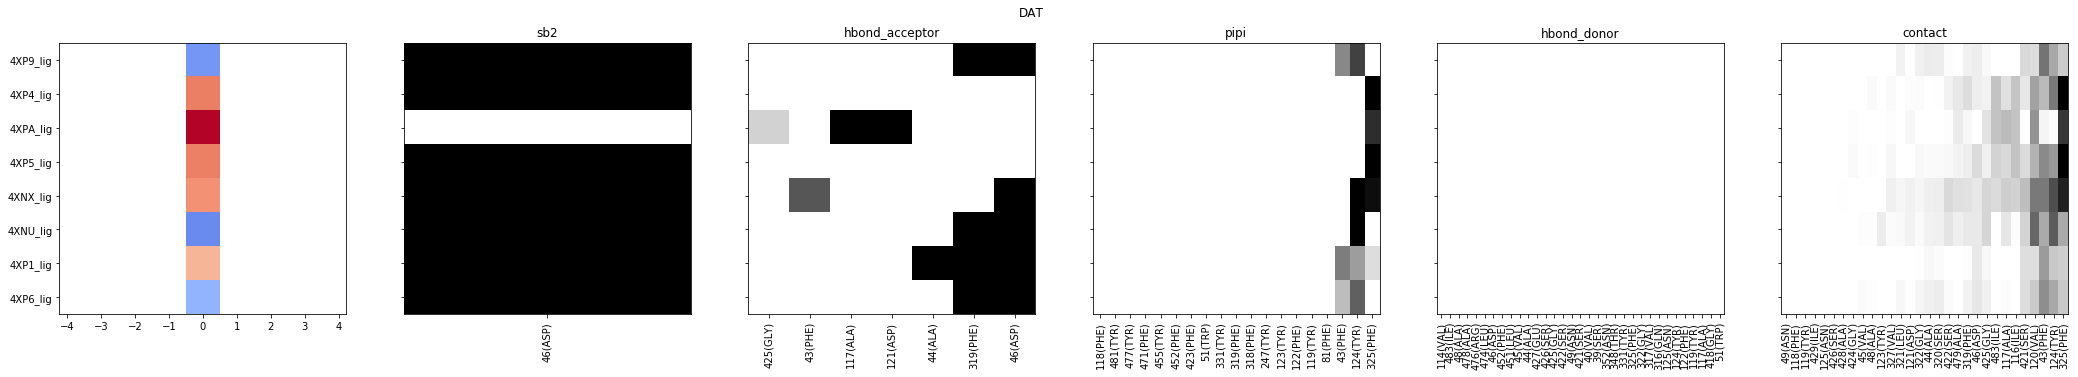

MEK1
crystal


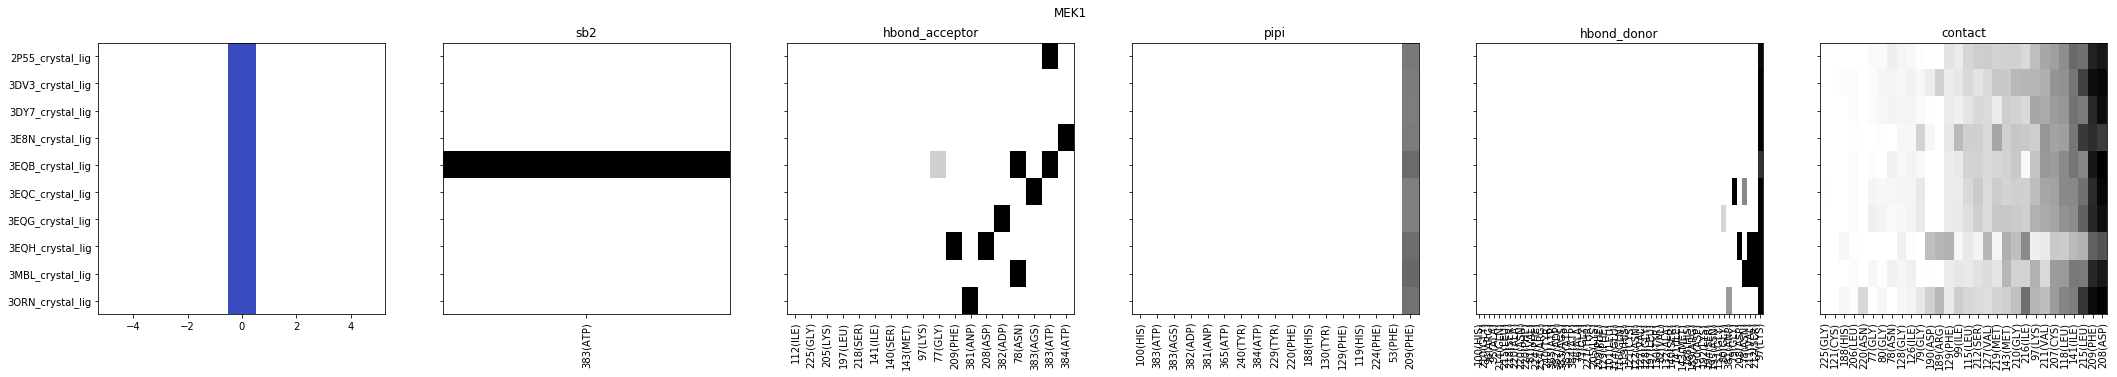

best


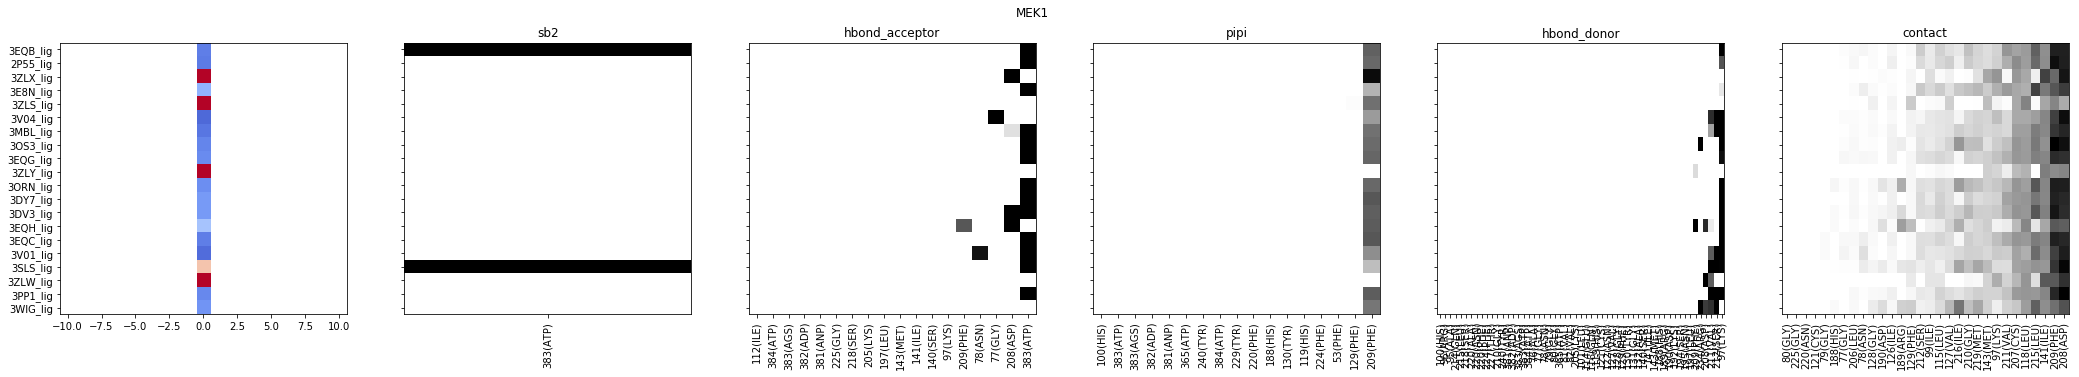

combind


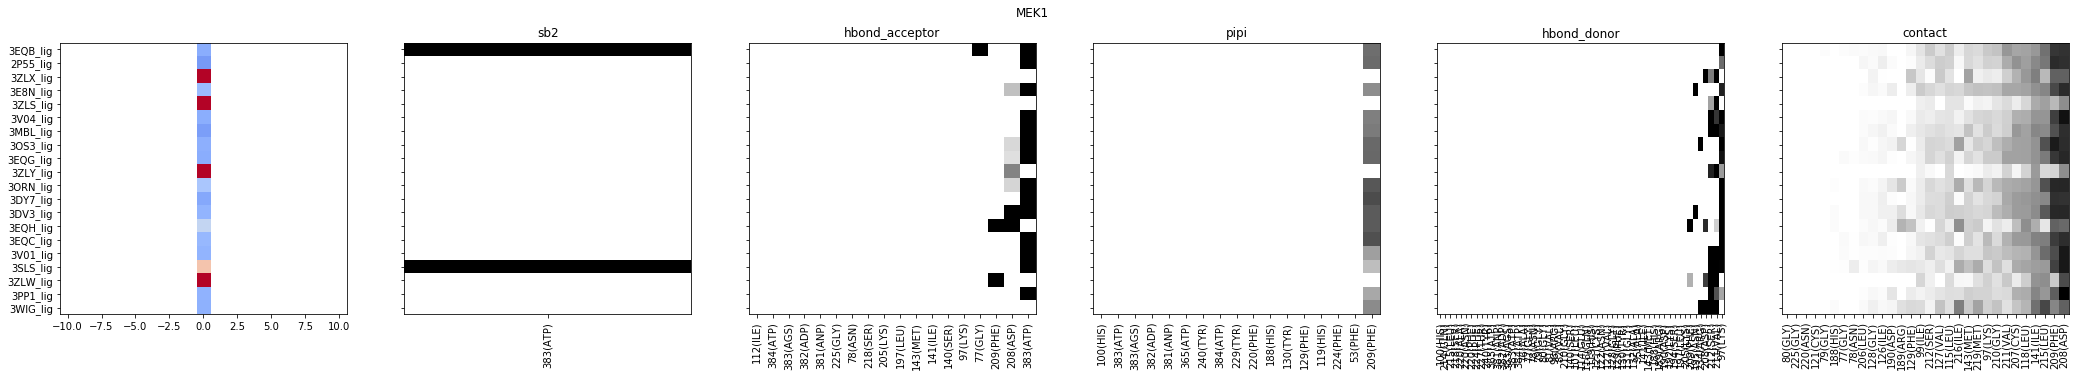

glide


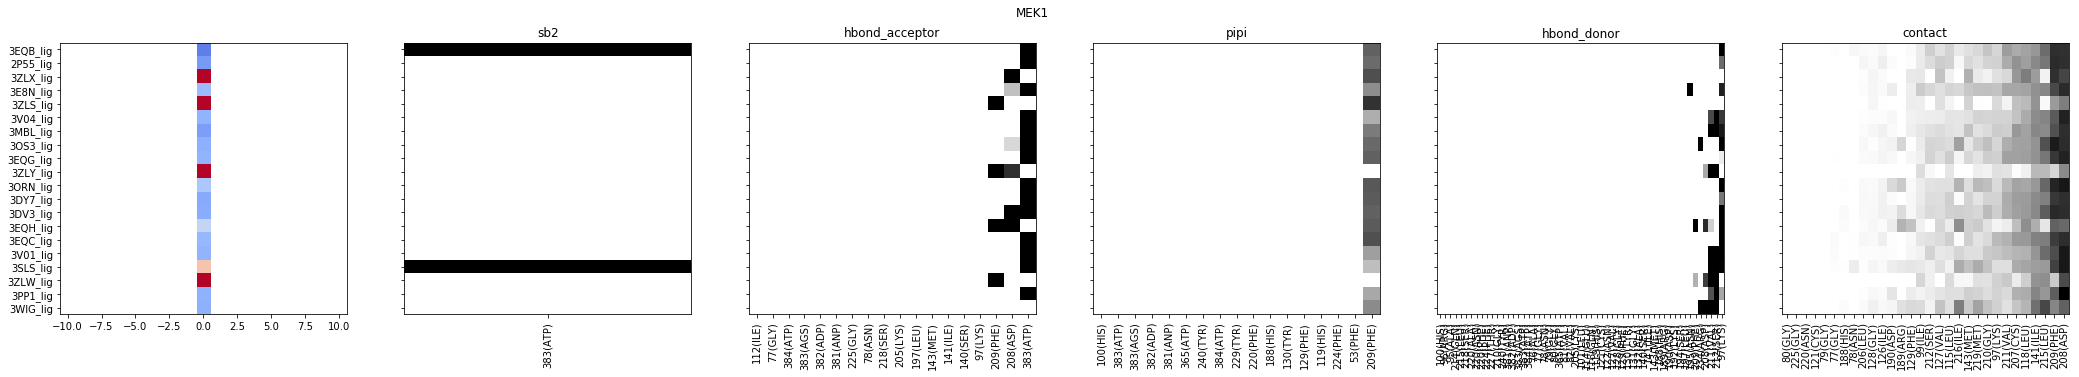

JAK2
crystal


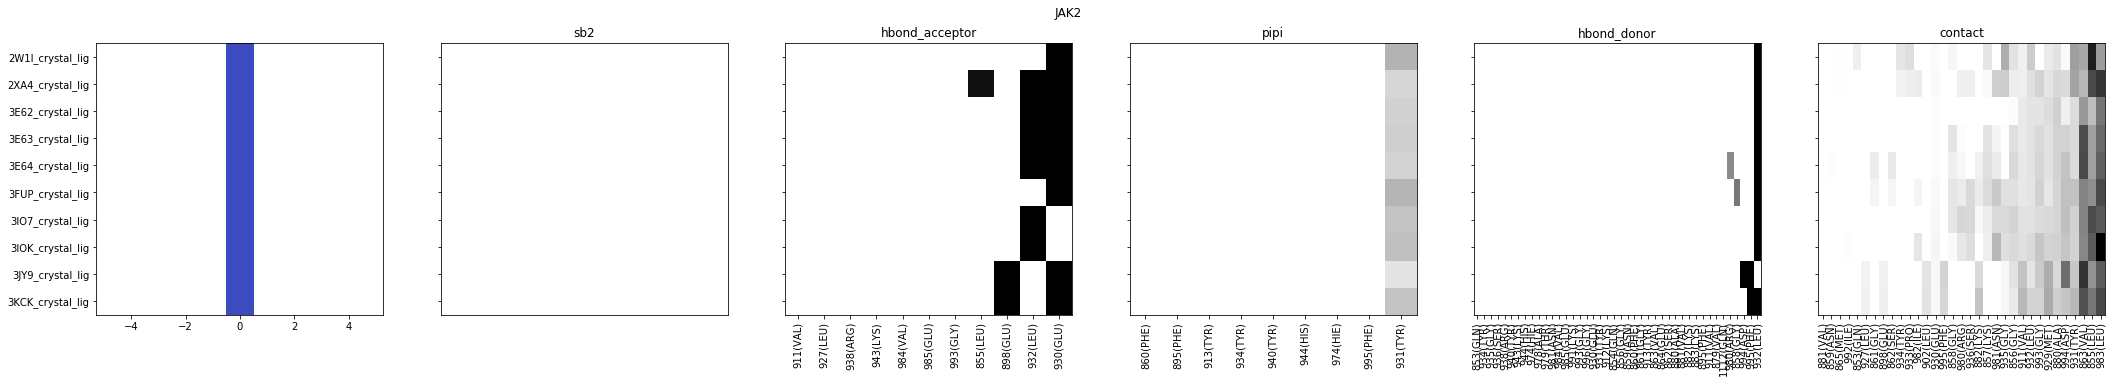

best


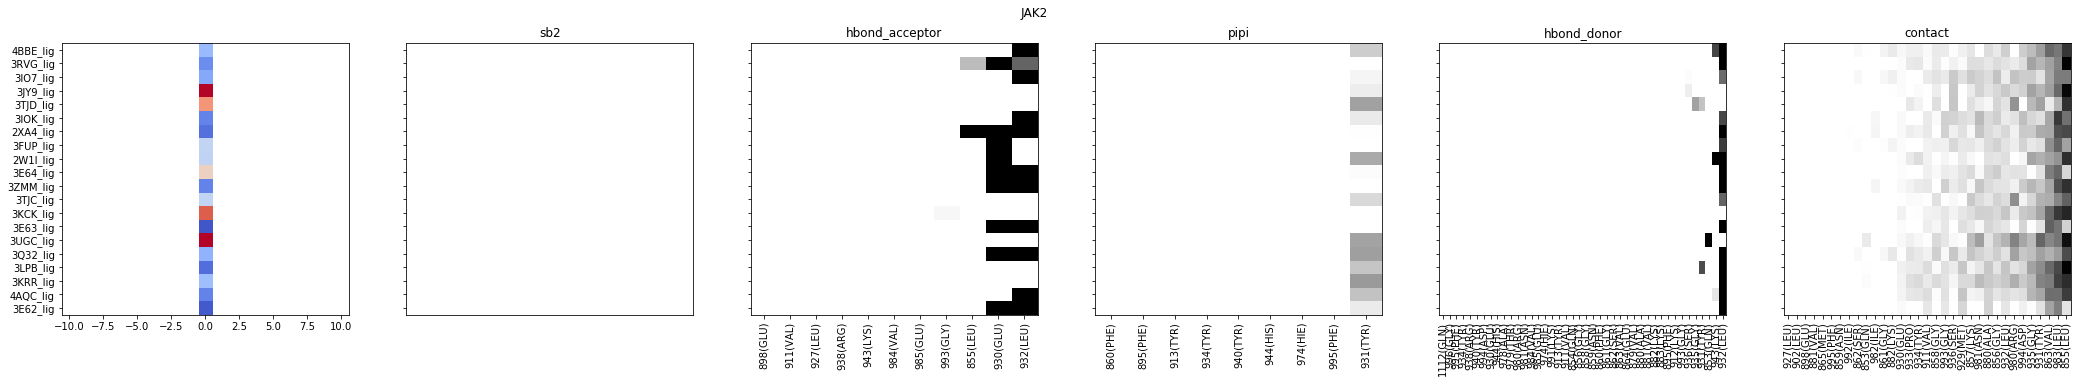

combind


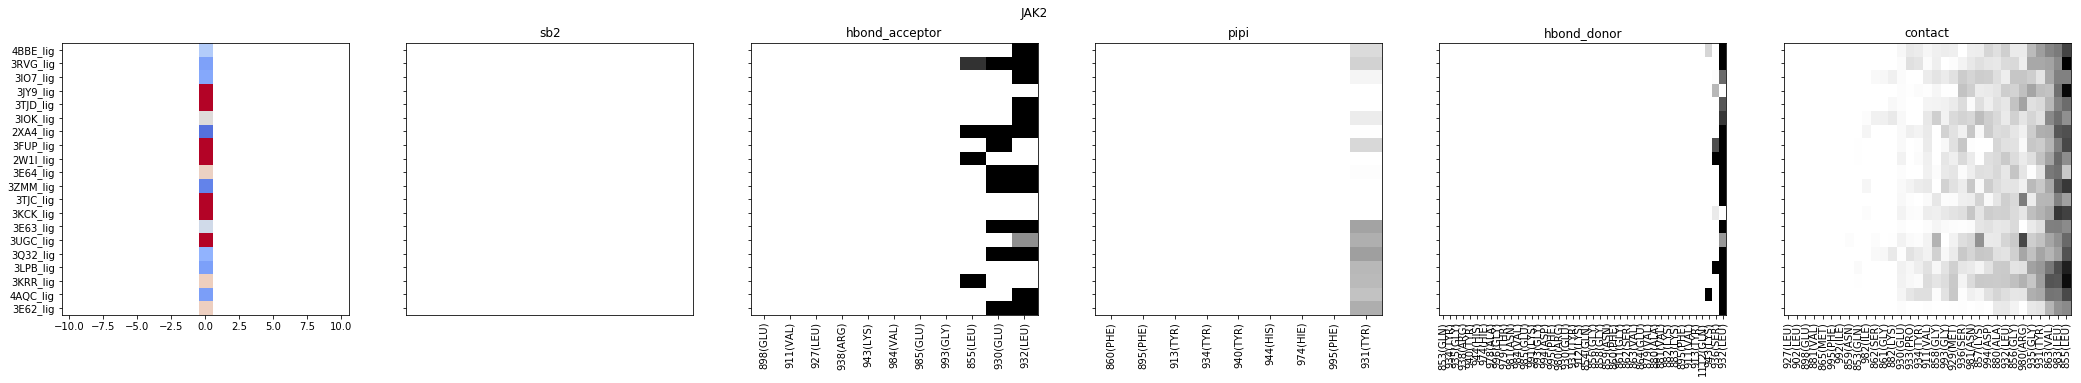

glide


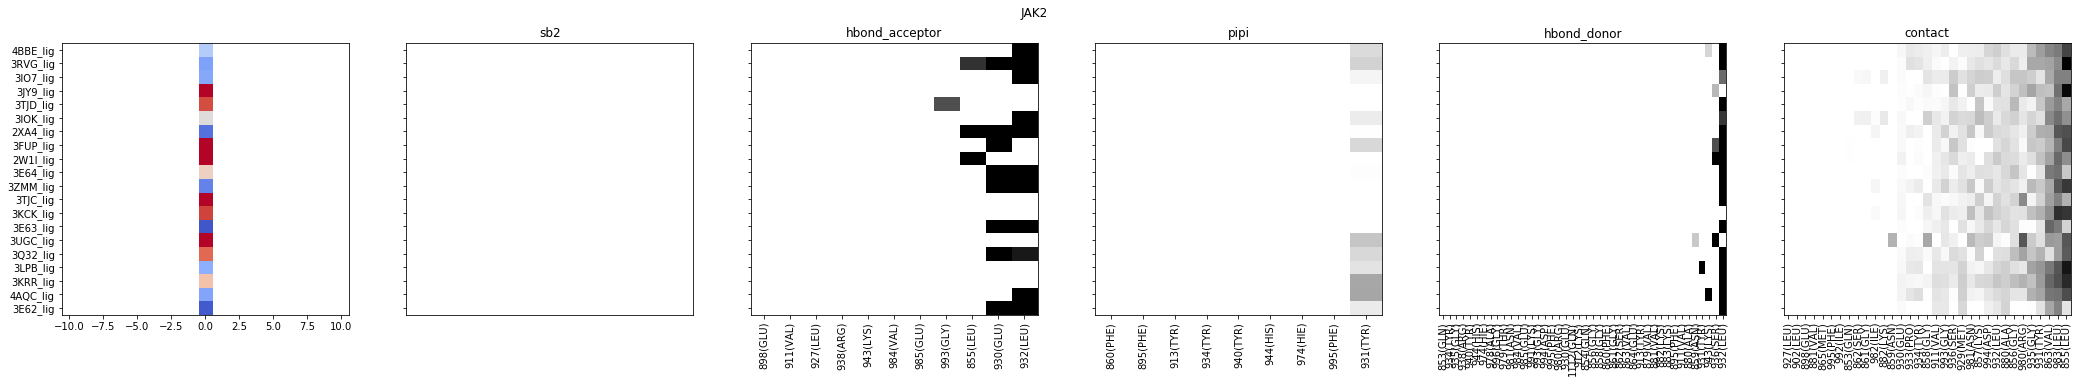

TRPV1
crystal


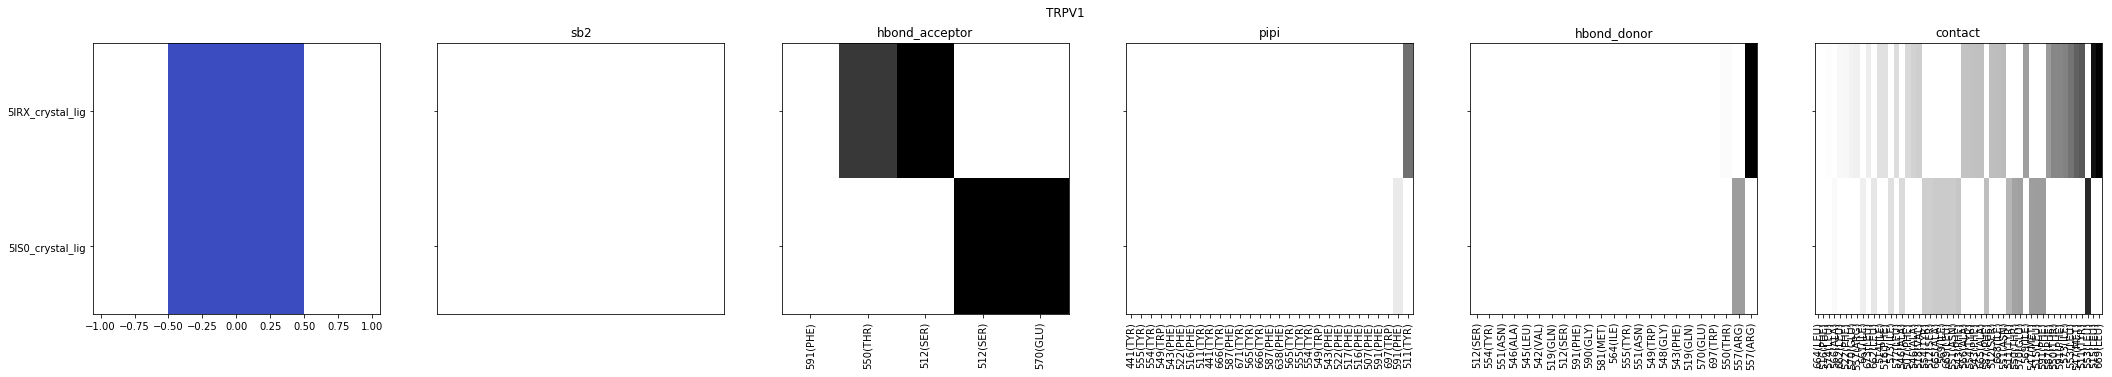

best


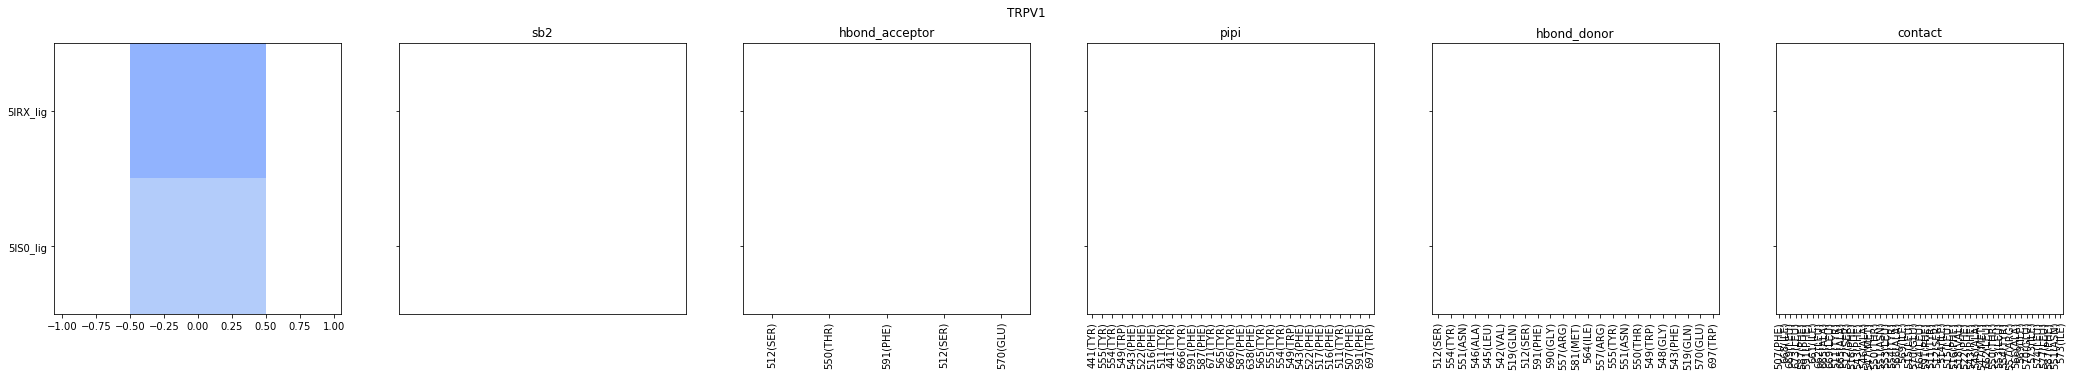

combind


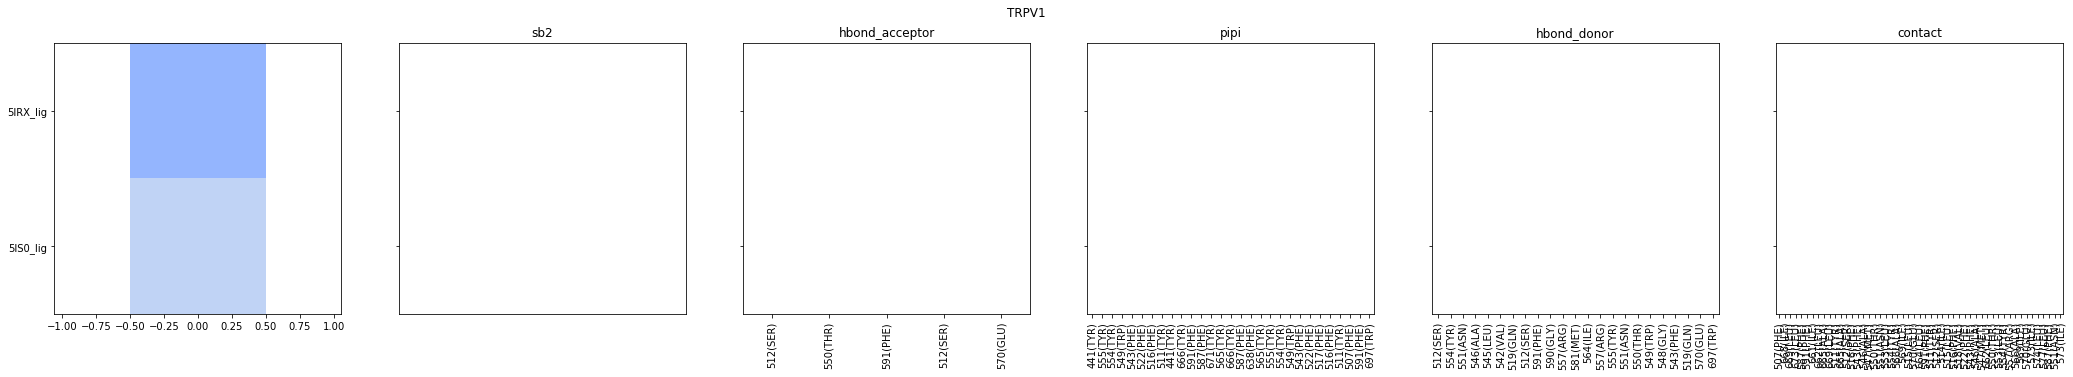

glide


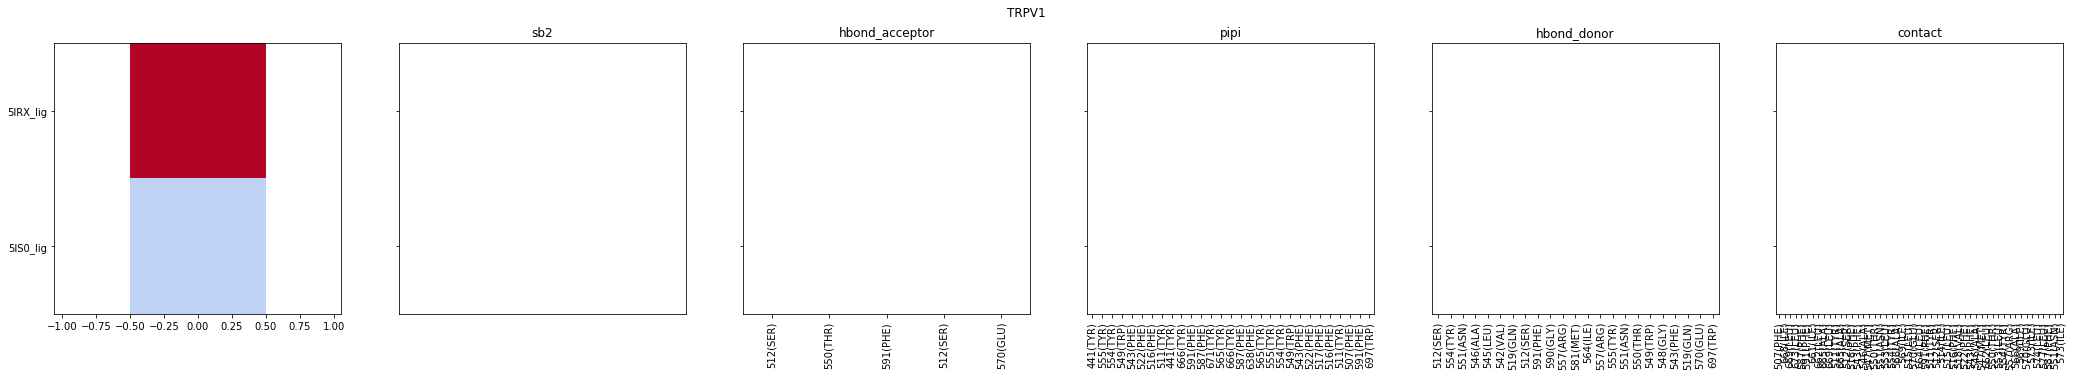

PYGM
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//PYGM/ifp/ifp4/2G9Q_struct.fp', 'fp not found')
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//PYGM/ifp/ifp4/2QRH_struct.fp', 'fp not found')
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//PYGM/ifp/ifp4/3G2I_struct.fp', 'fp not found')
crystal


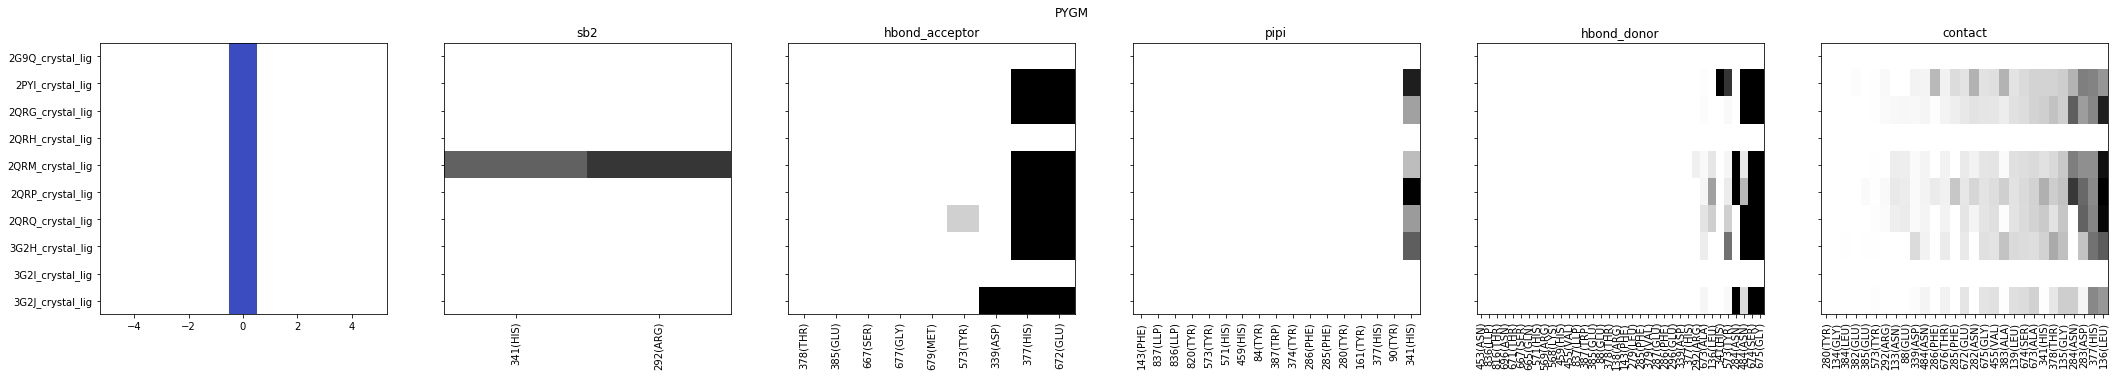

best


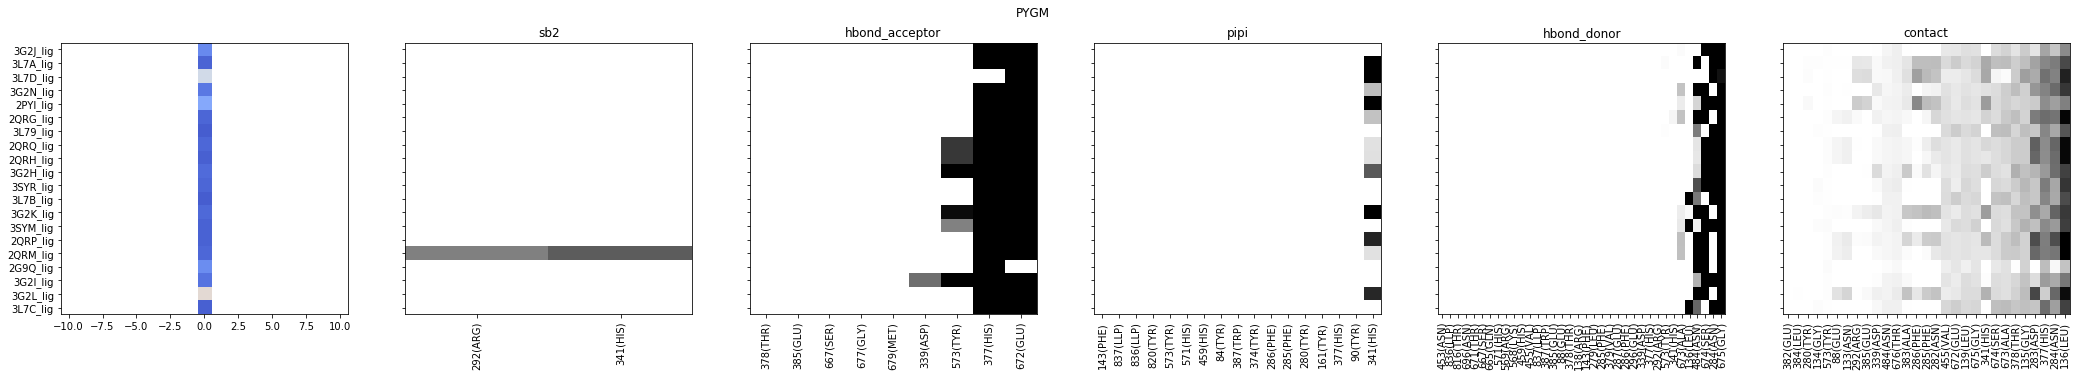

combind


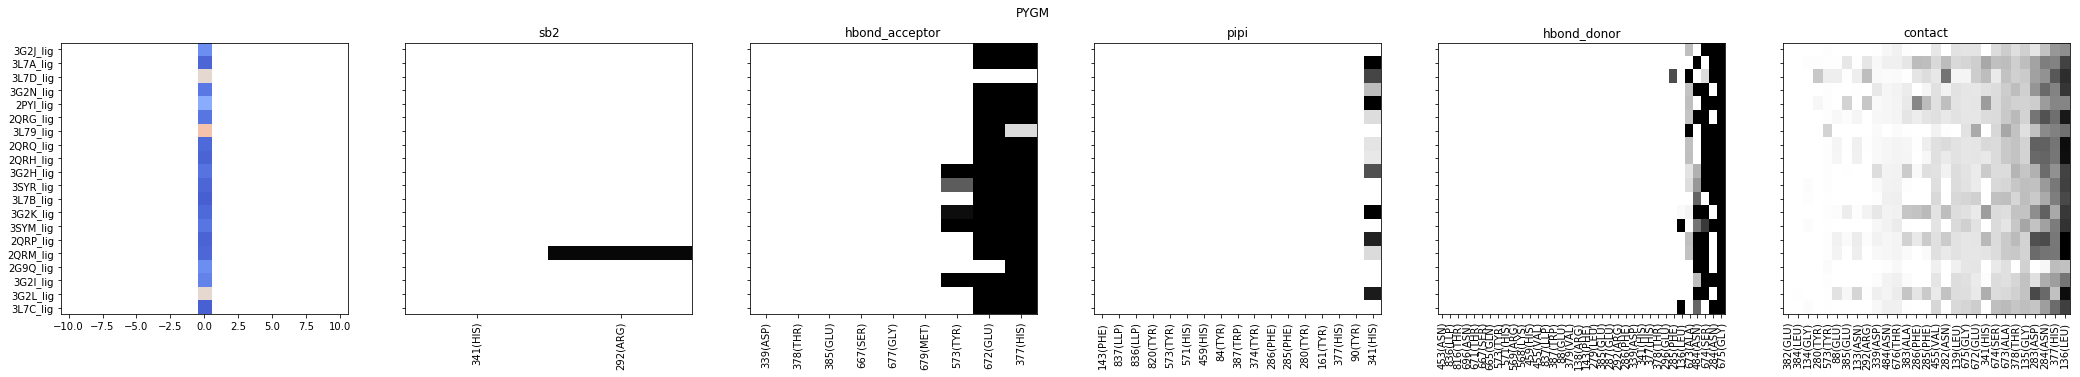

glide


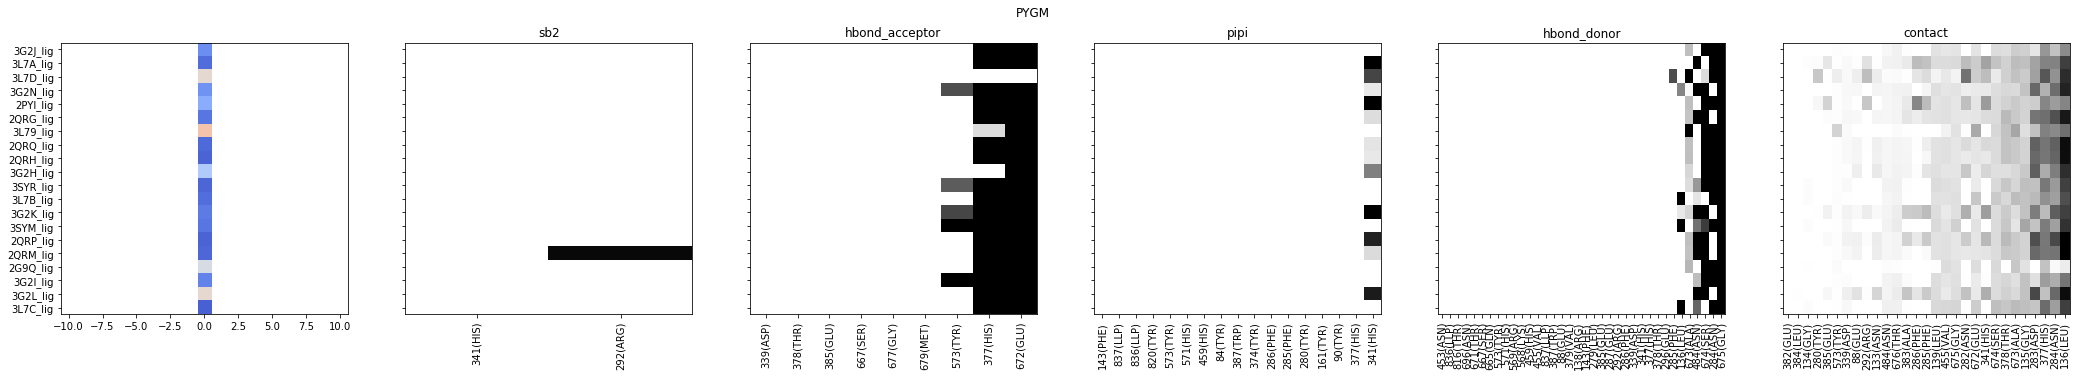

P00760
crystal


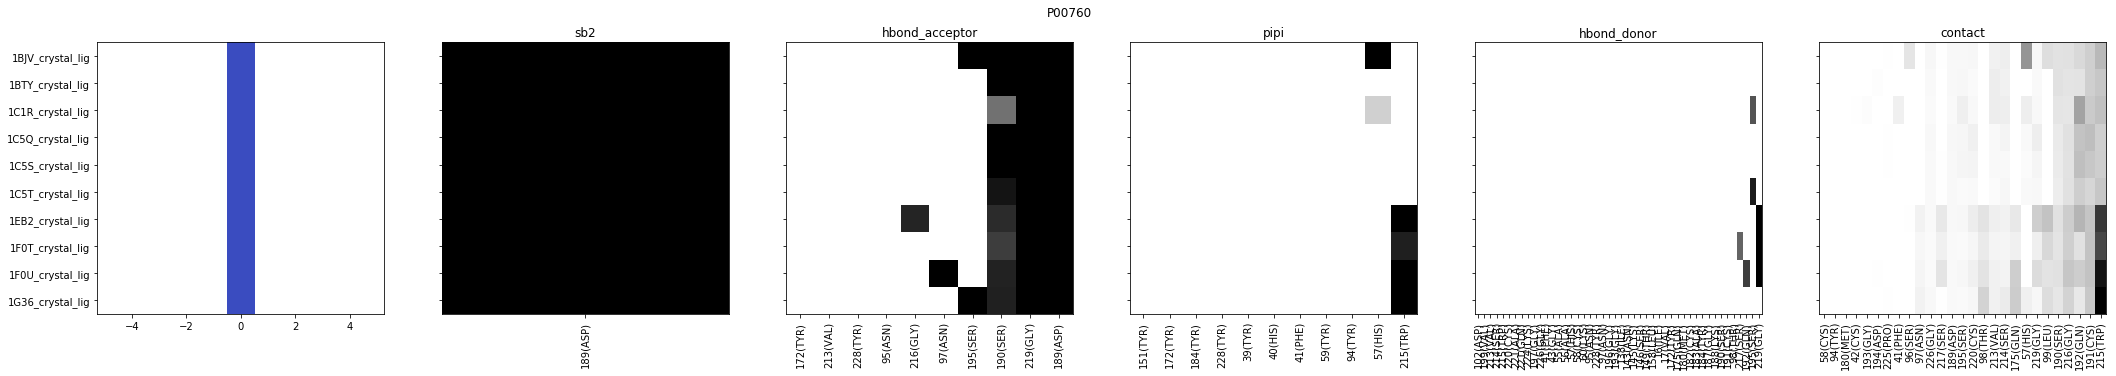

best


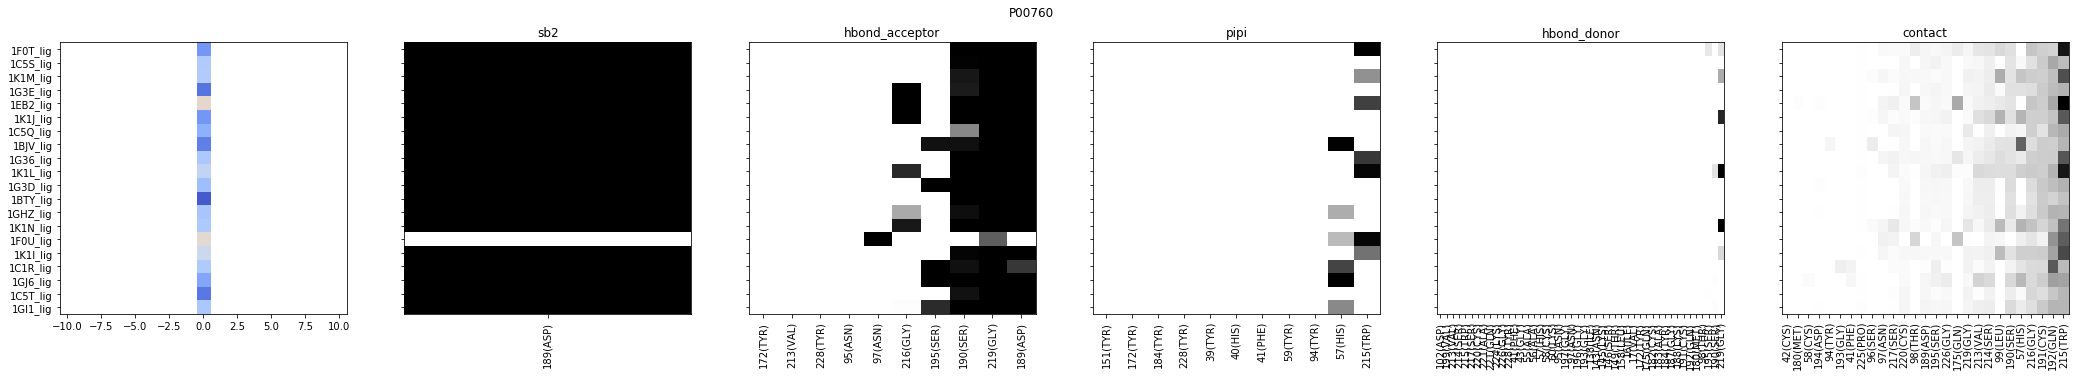

combind


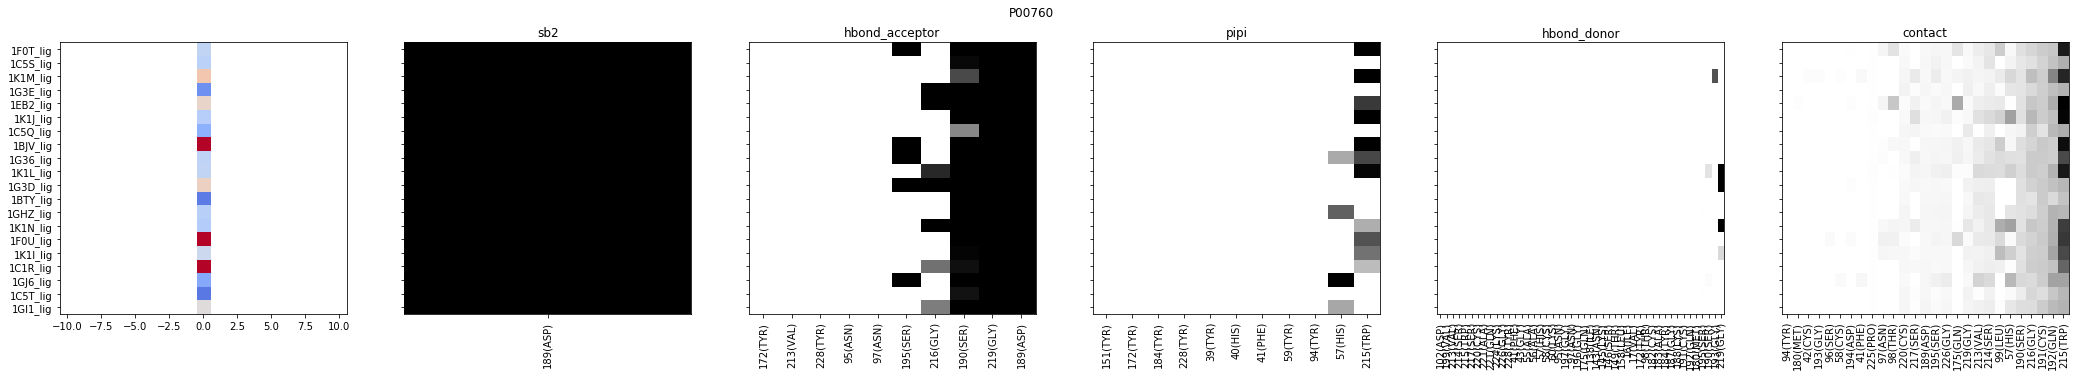

glide


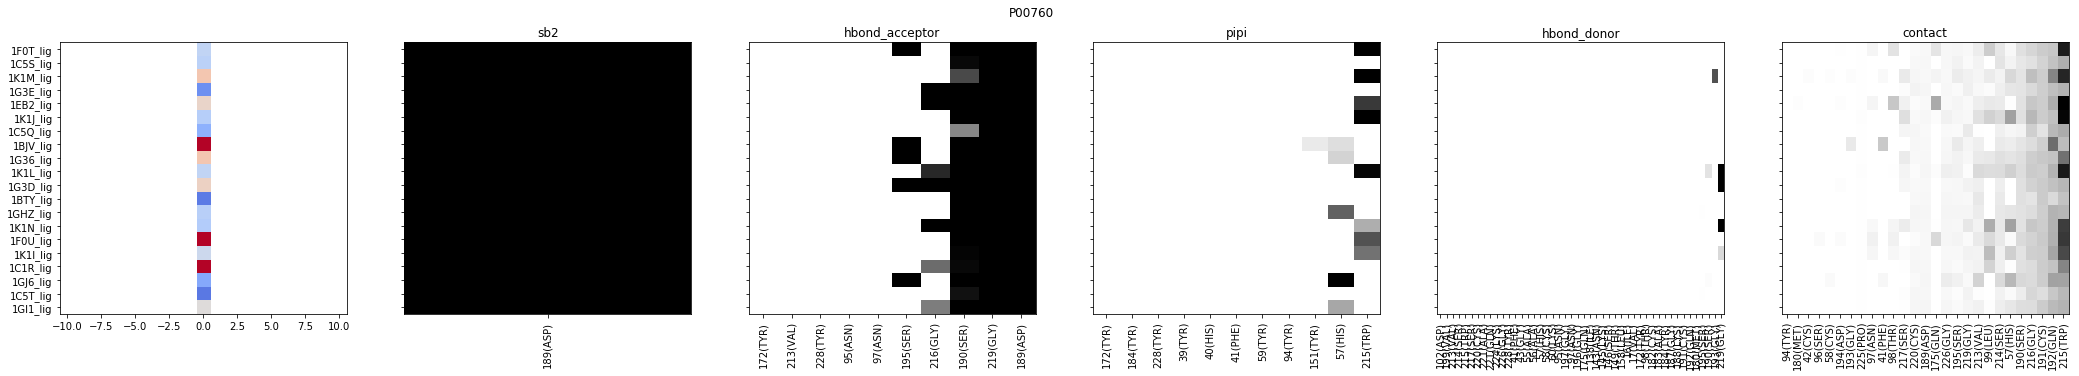

MAPK14
crystal


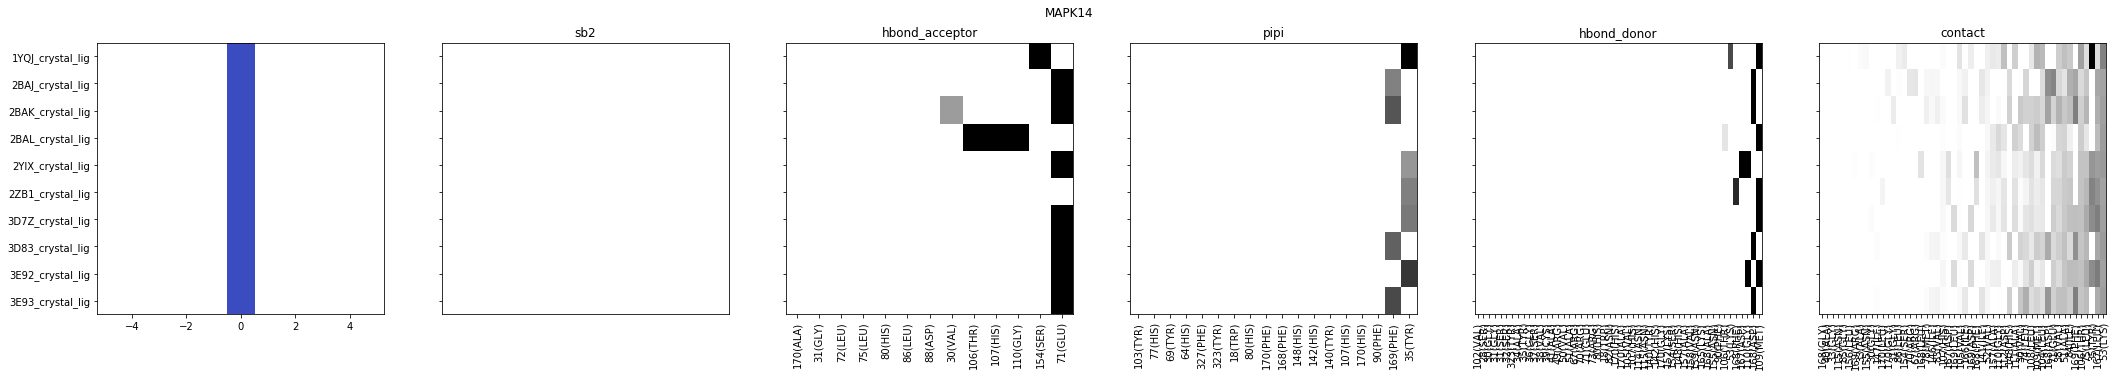

best


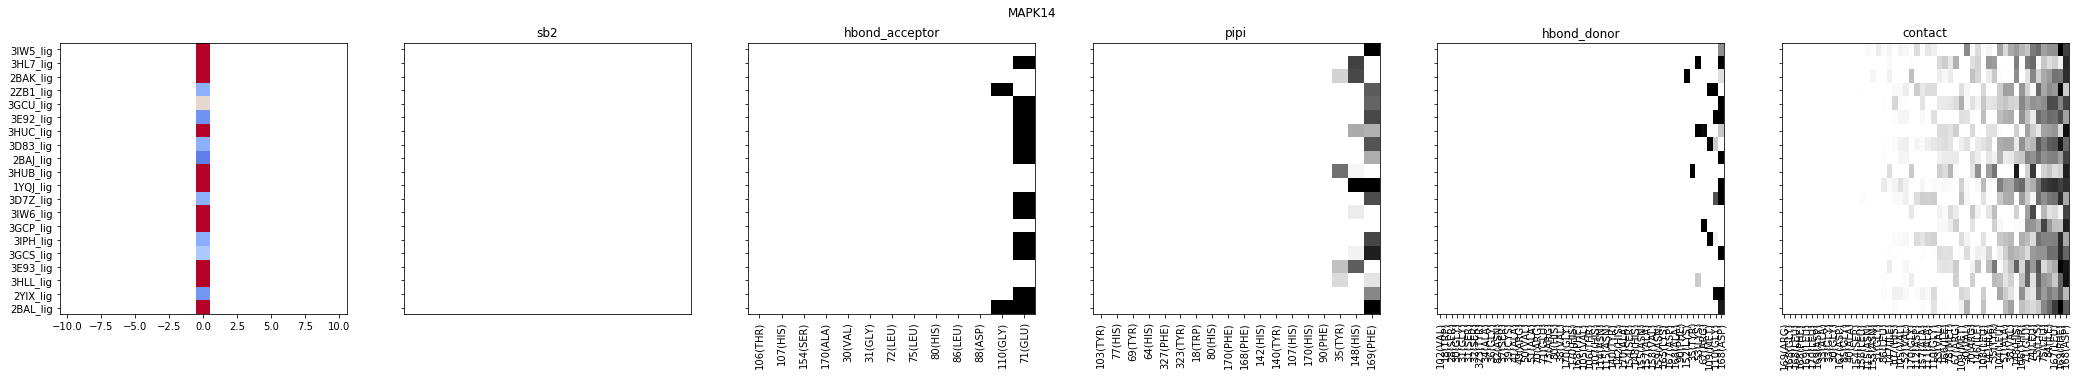

combind


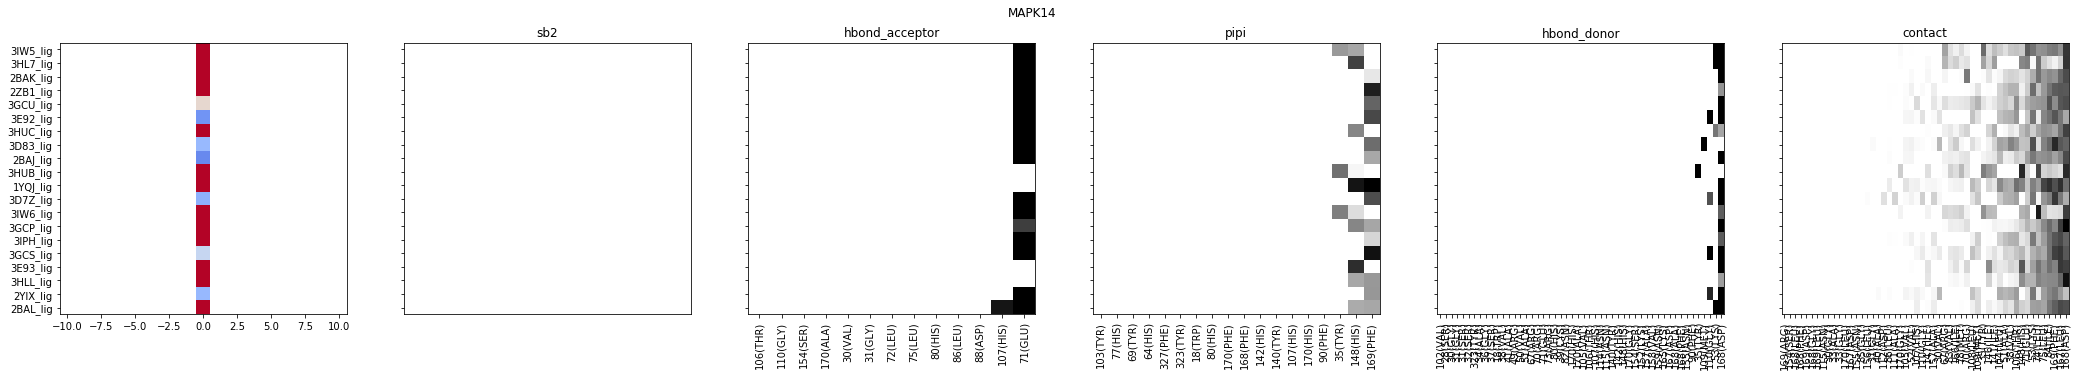

glide


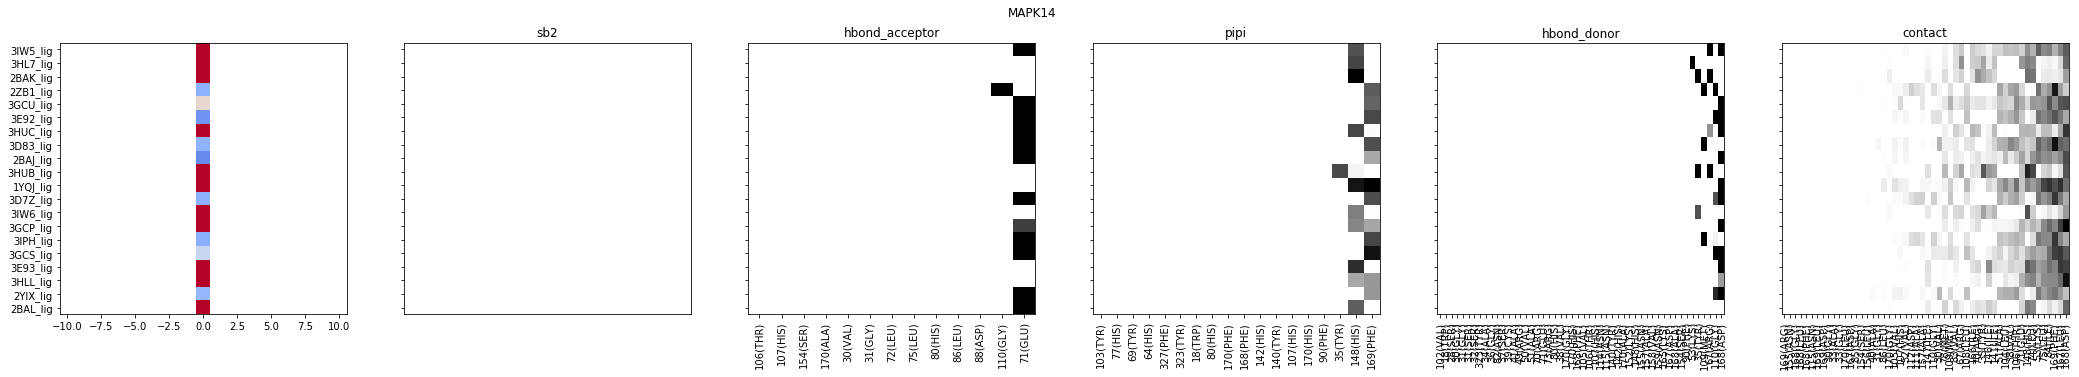

B2AR
crystal


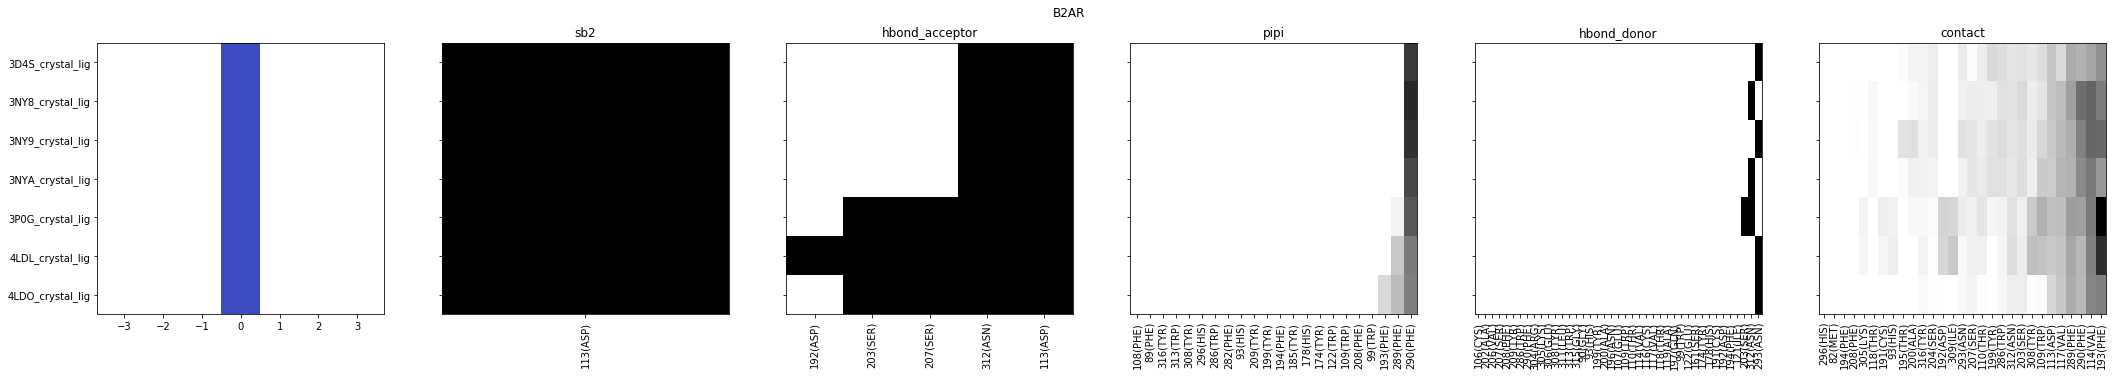

best


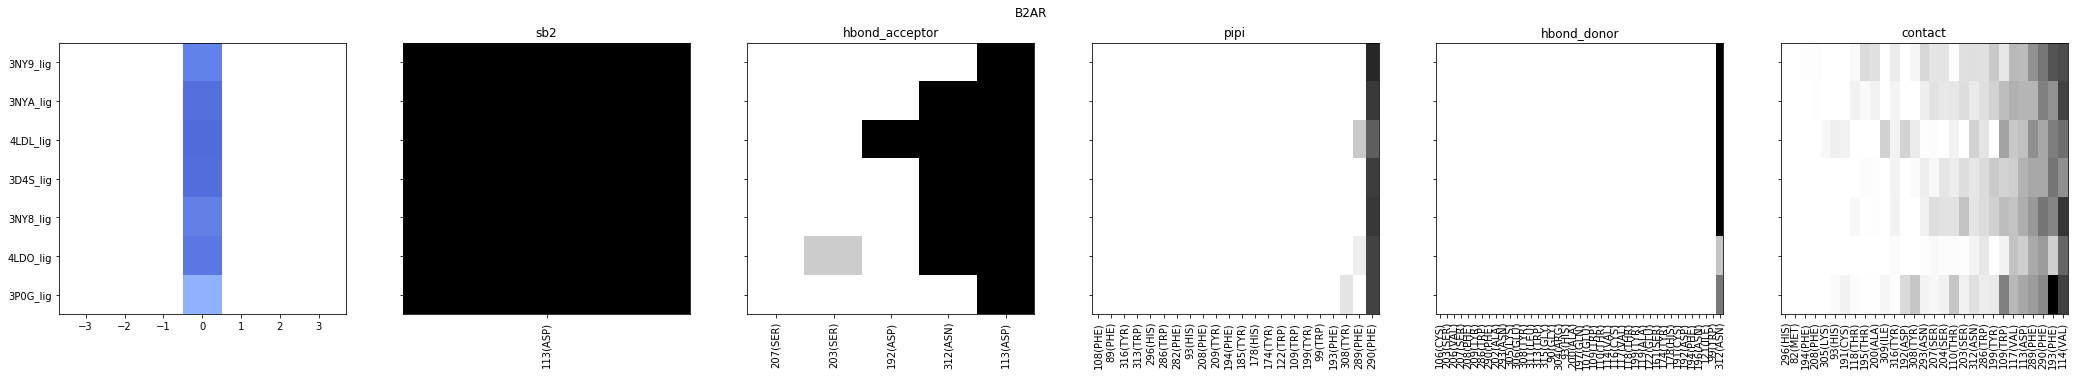

combind


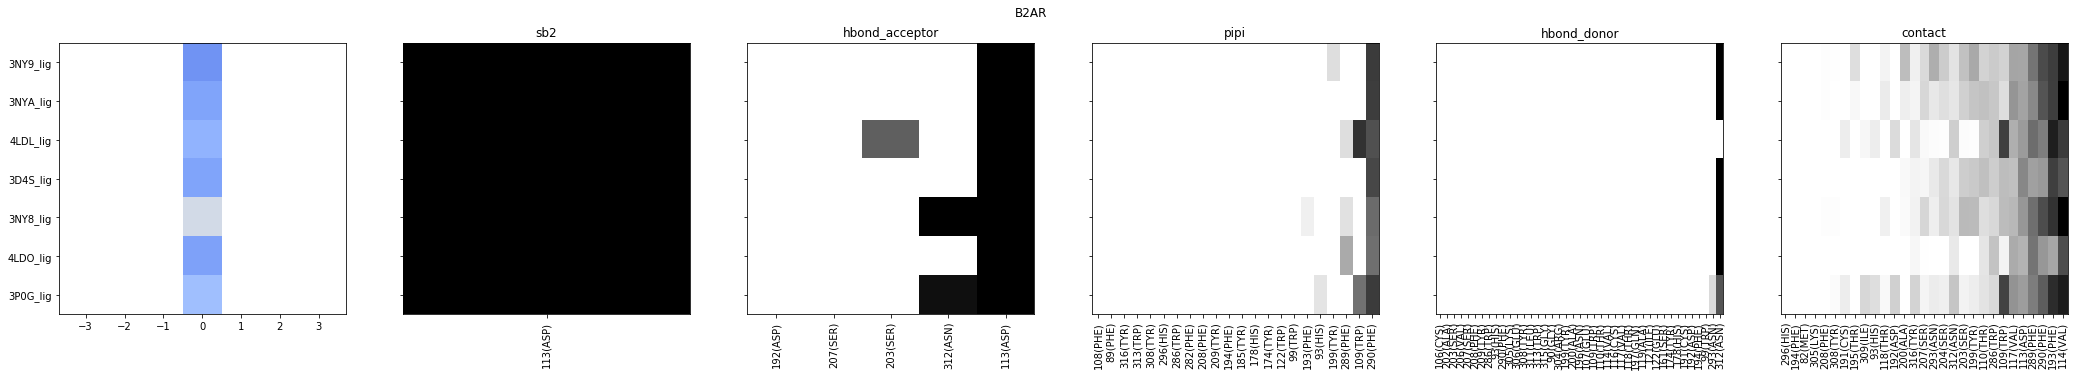

glide


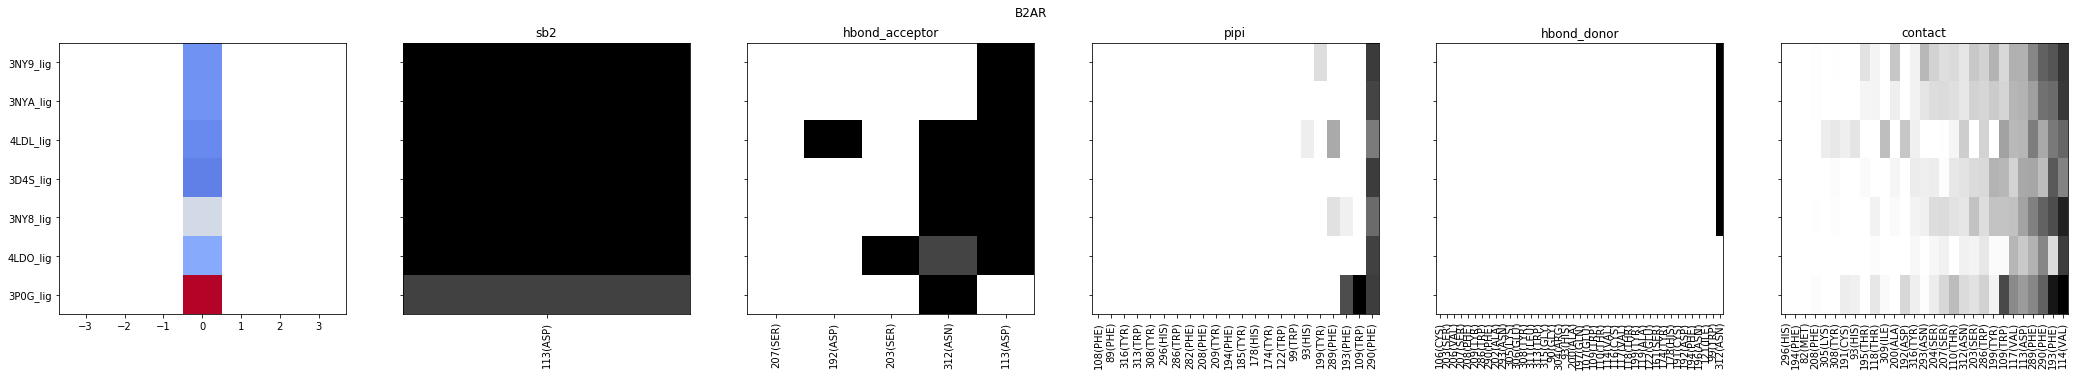

NR3C1
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//NR3C1/ifp/ifp4/4P6X_struct.fp', 'fp not found')
crystal


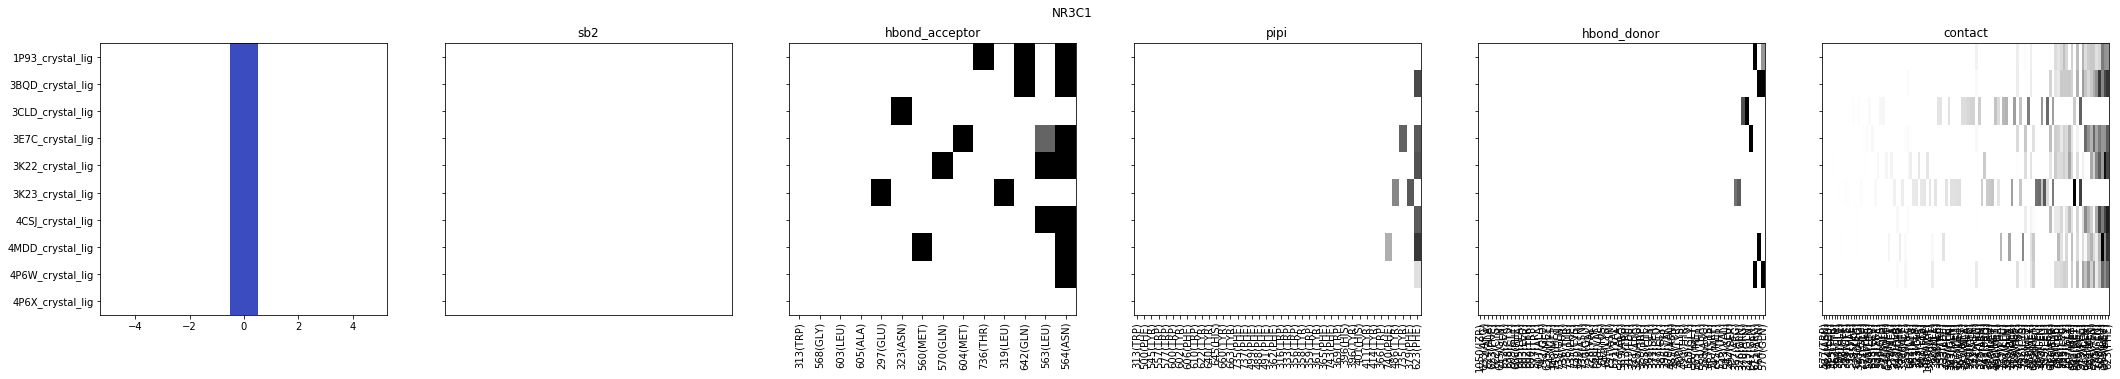

best


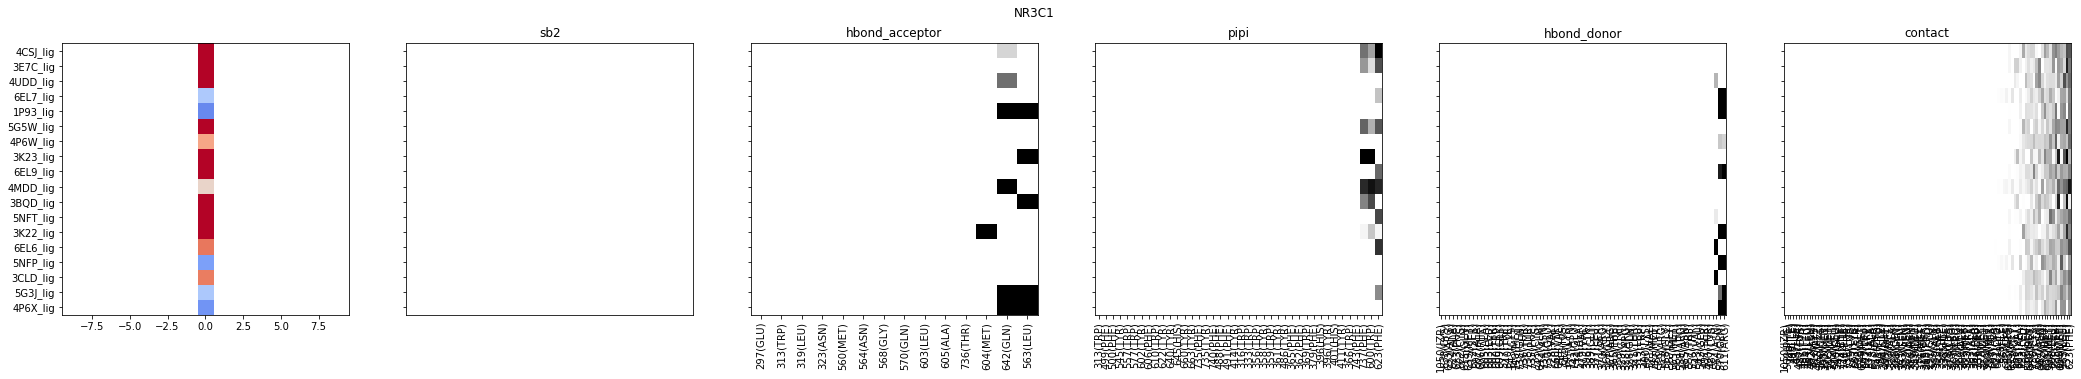

combind


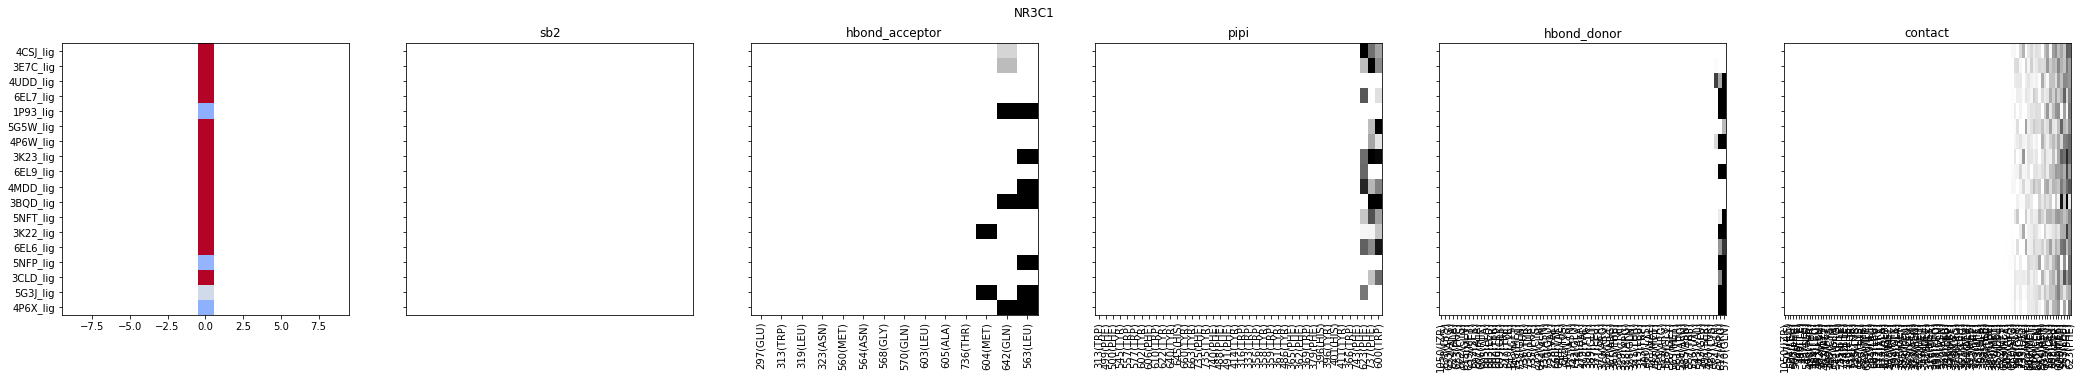

glide


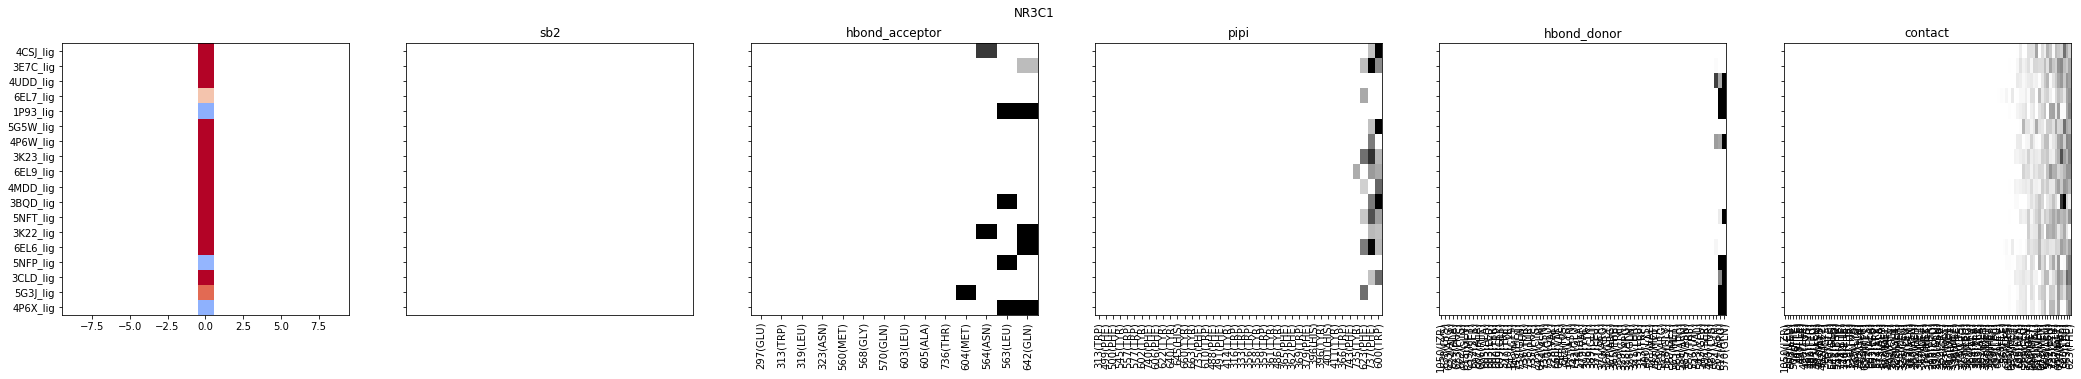

NR3C2
crystal


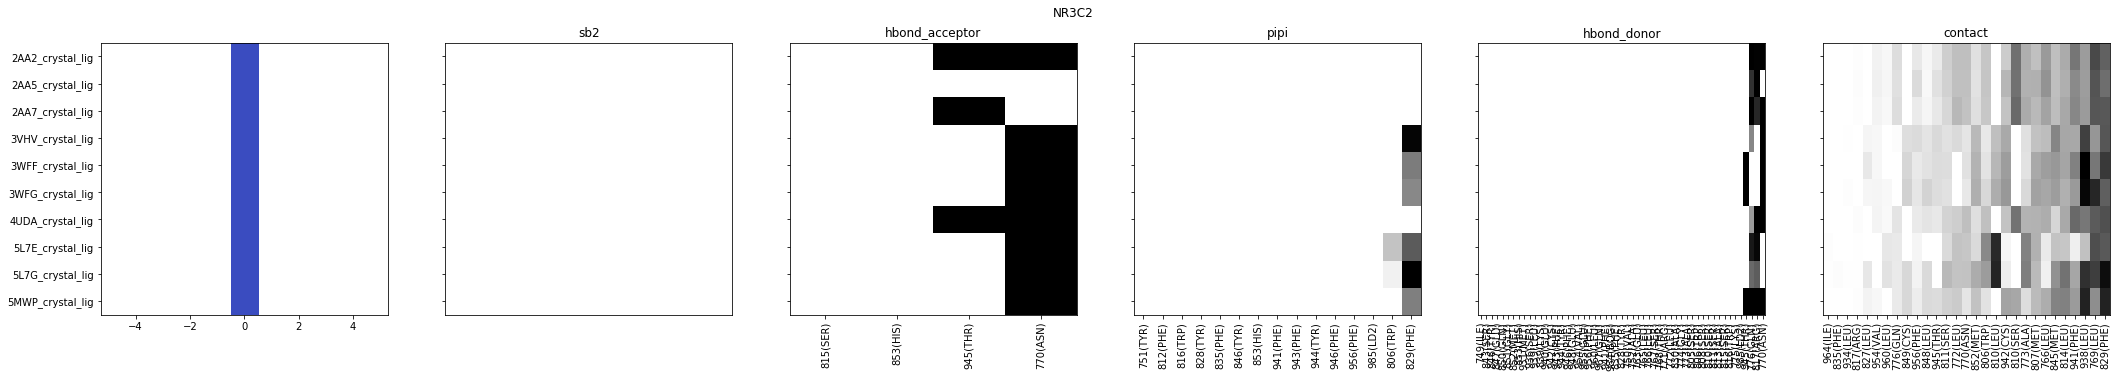

best


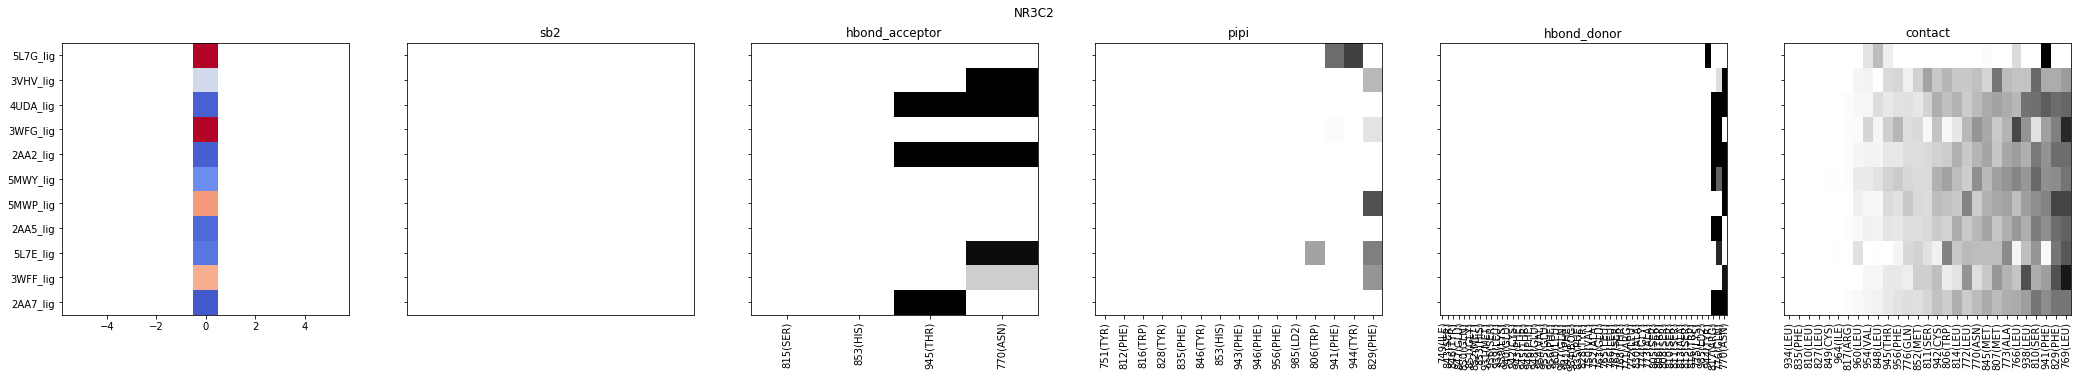

combind


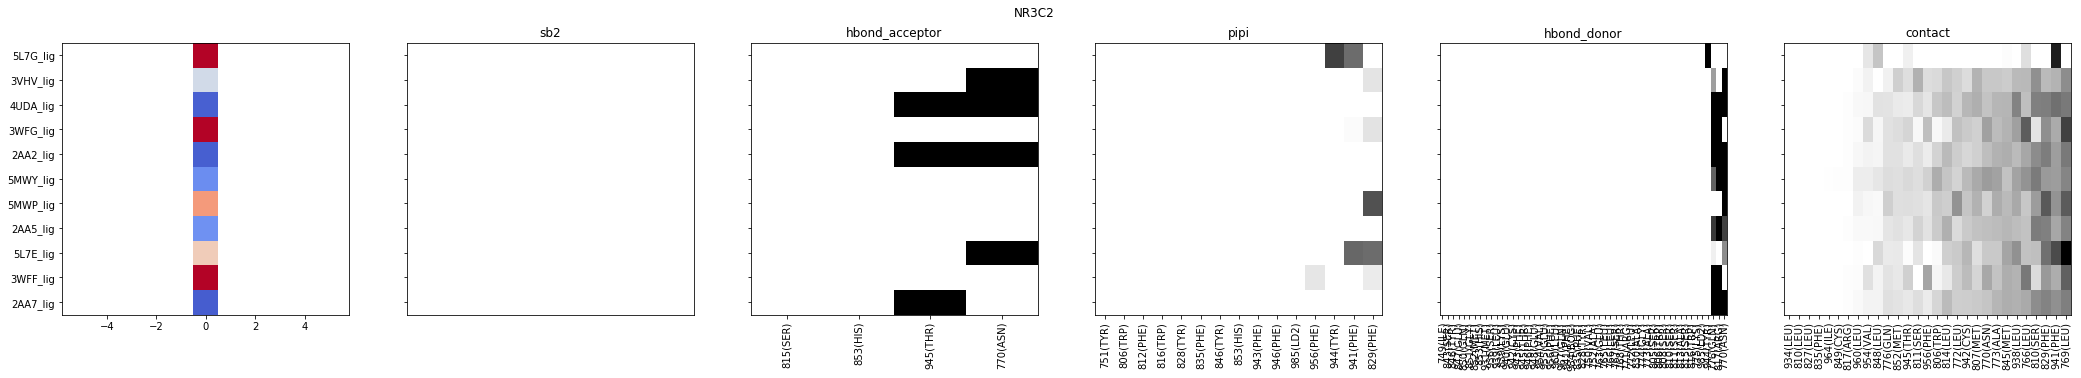

glide


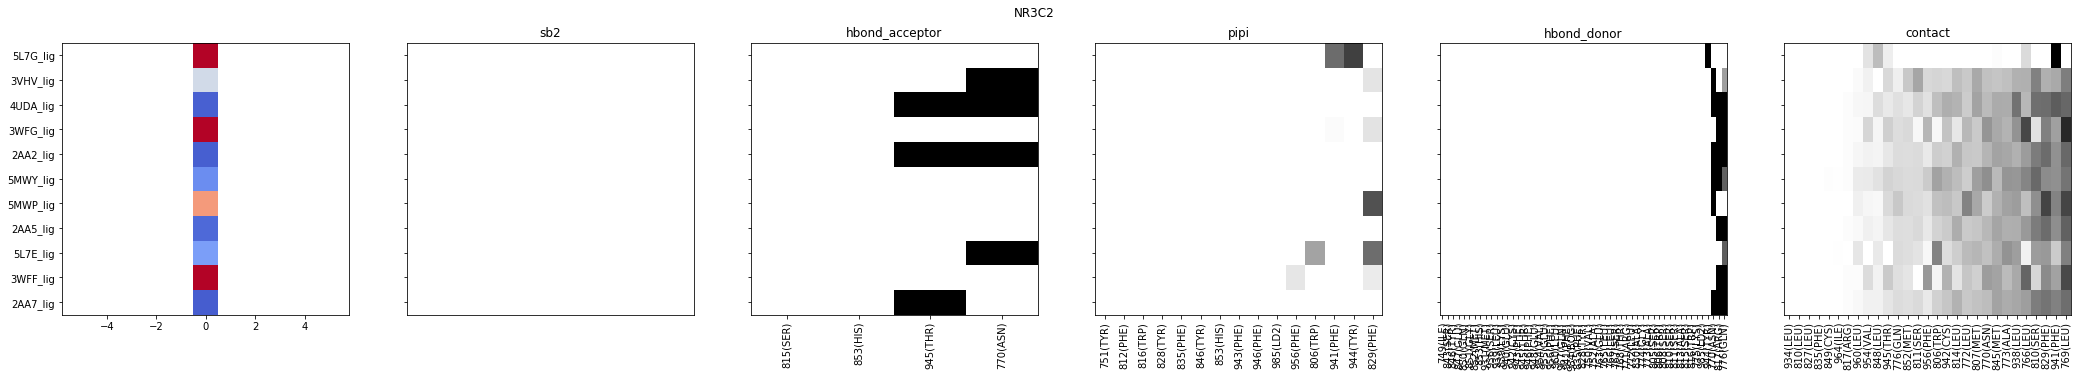

PLAU
crystal


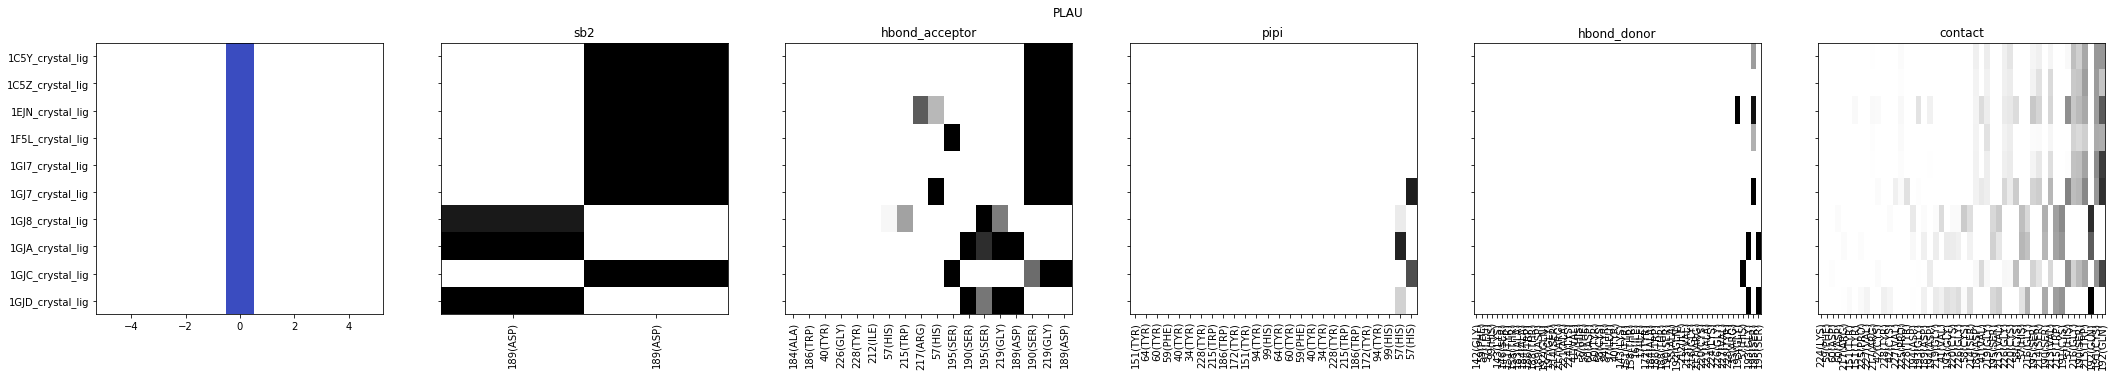

best


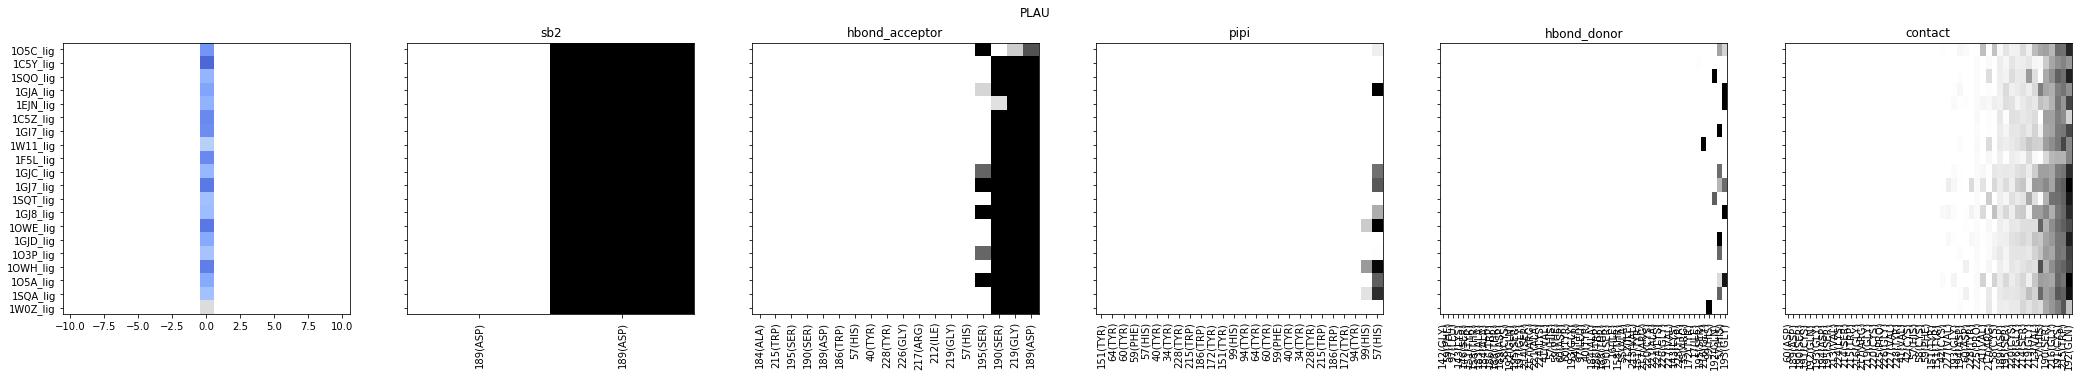

combind


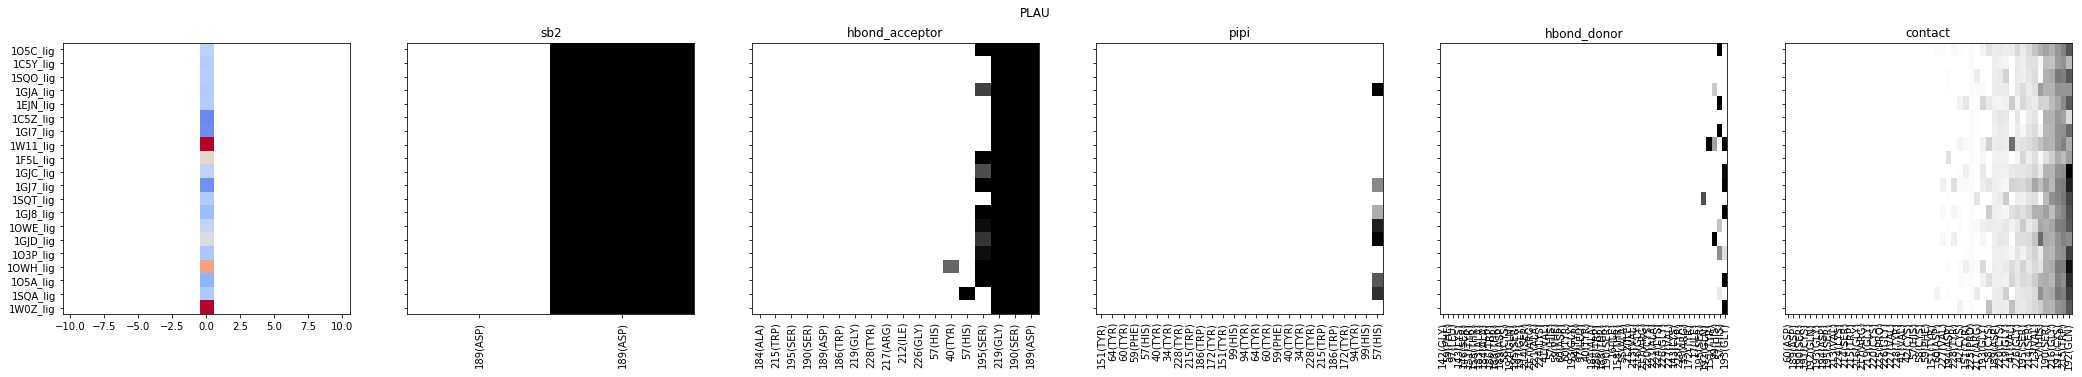

glide


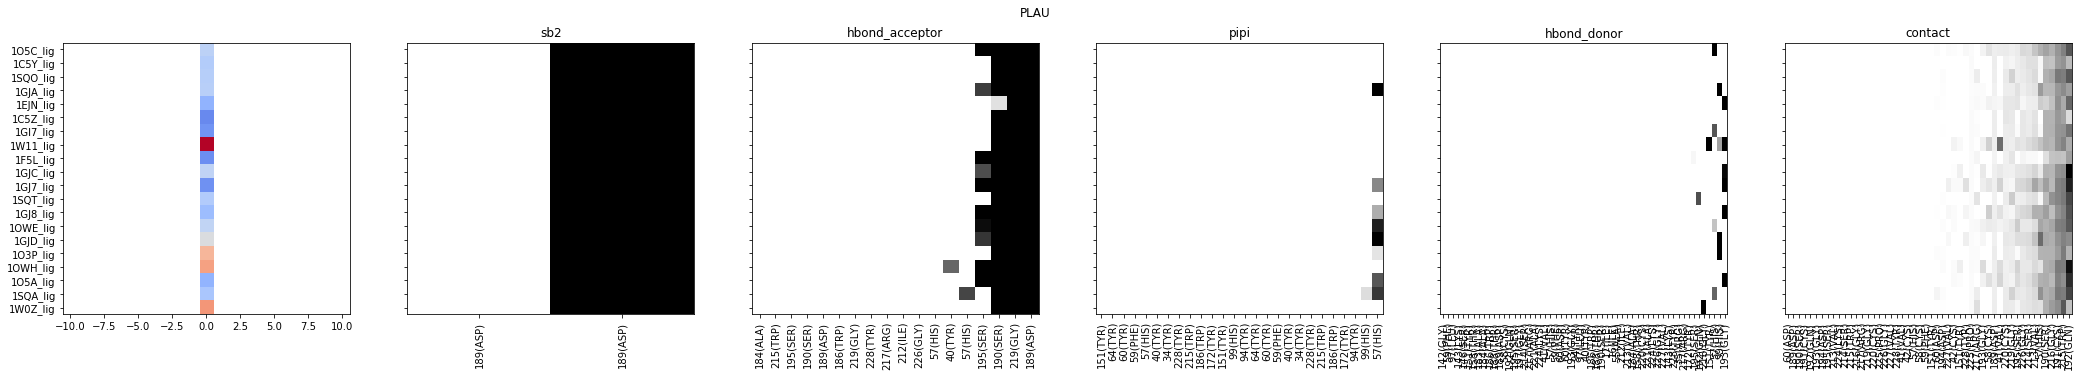

AR
crystal


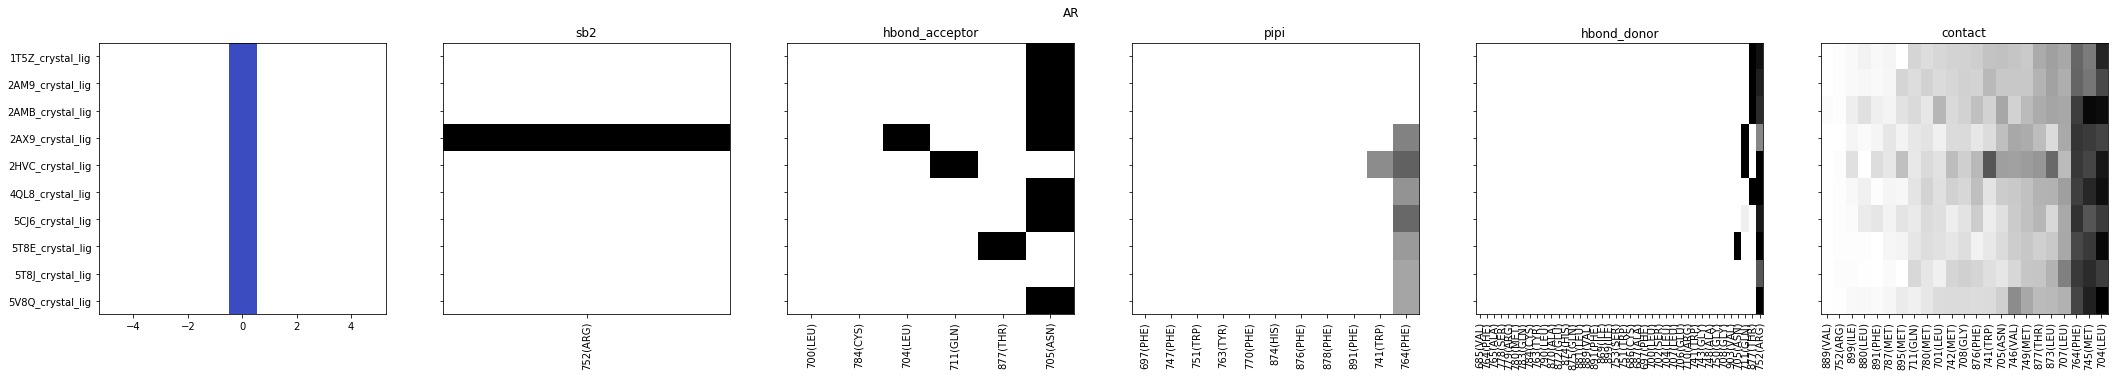

best


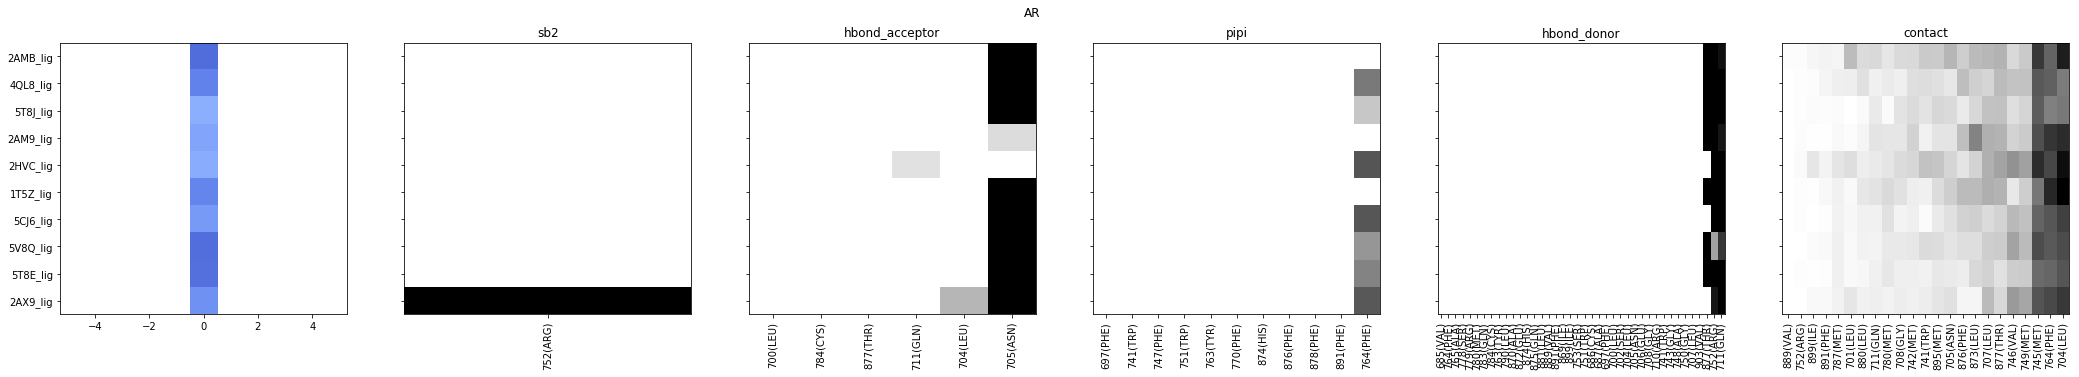

combind


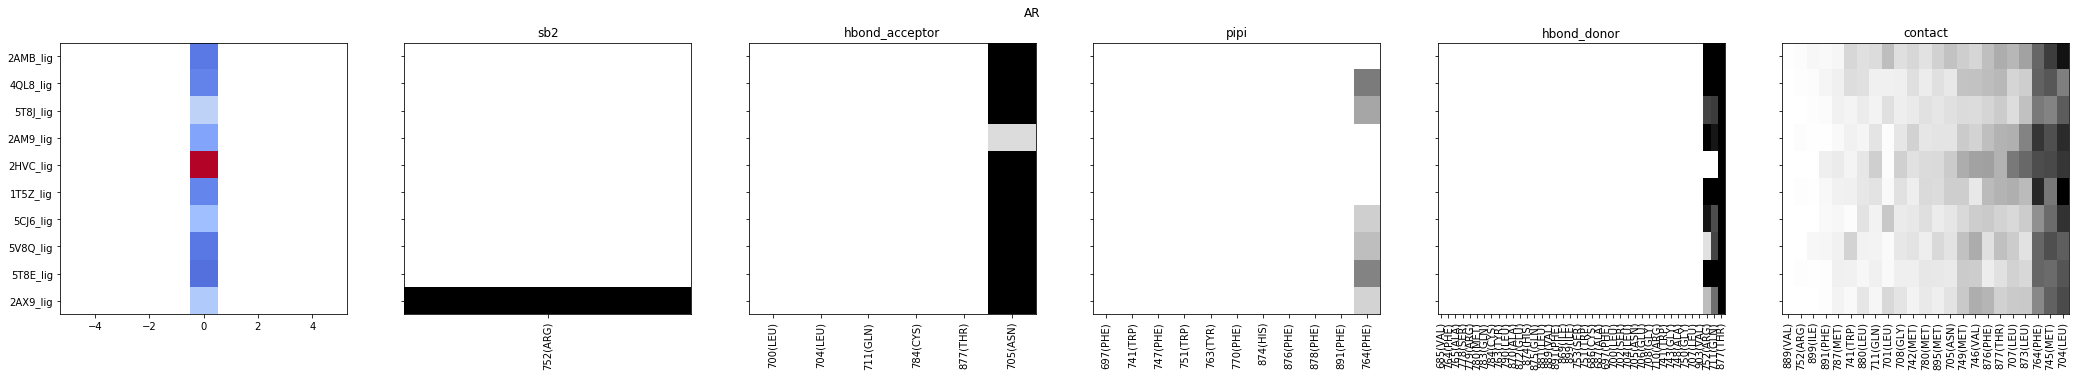

glide


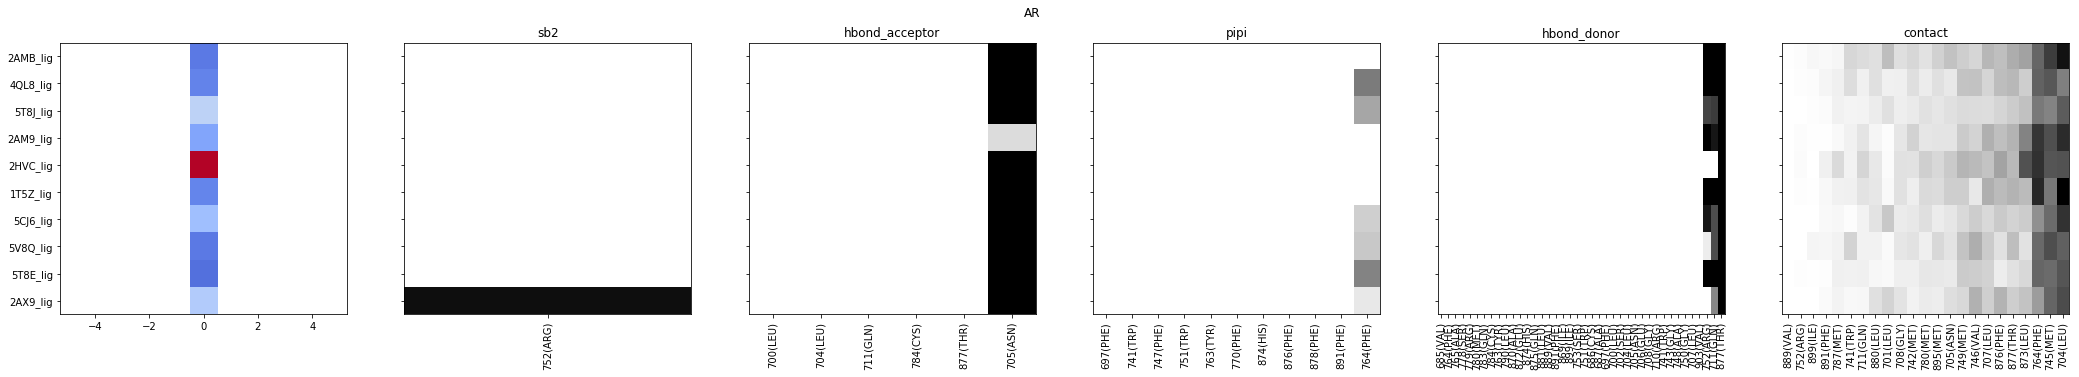

BRD4
crystal


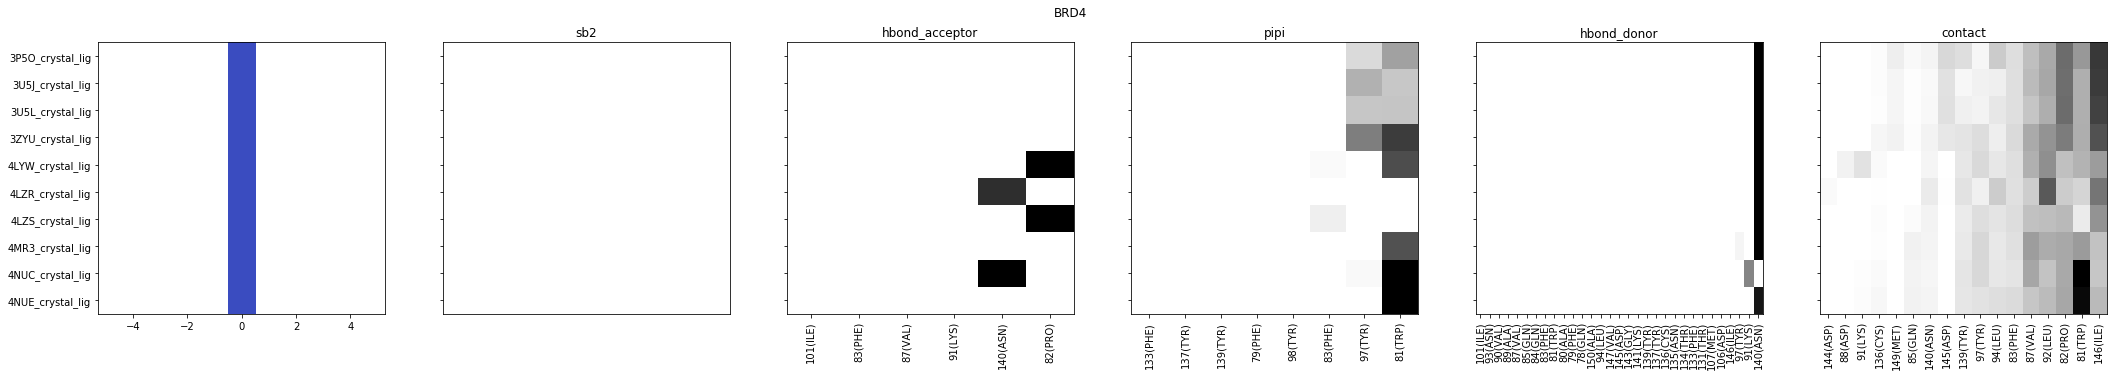

best


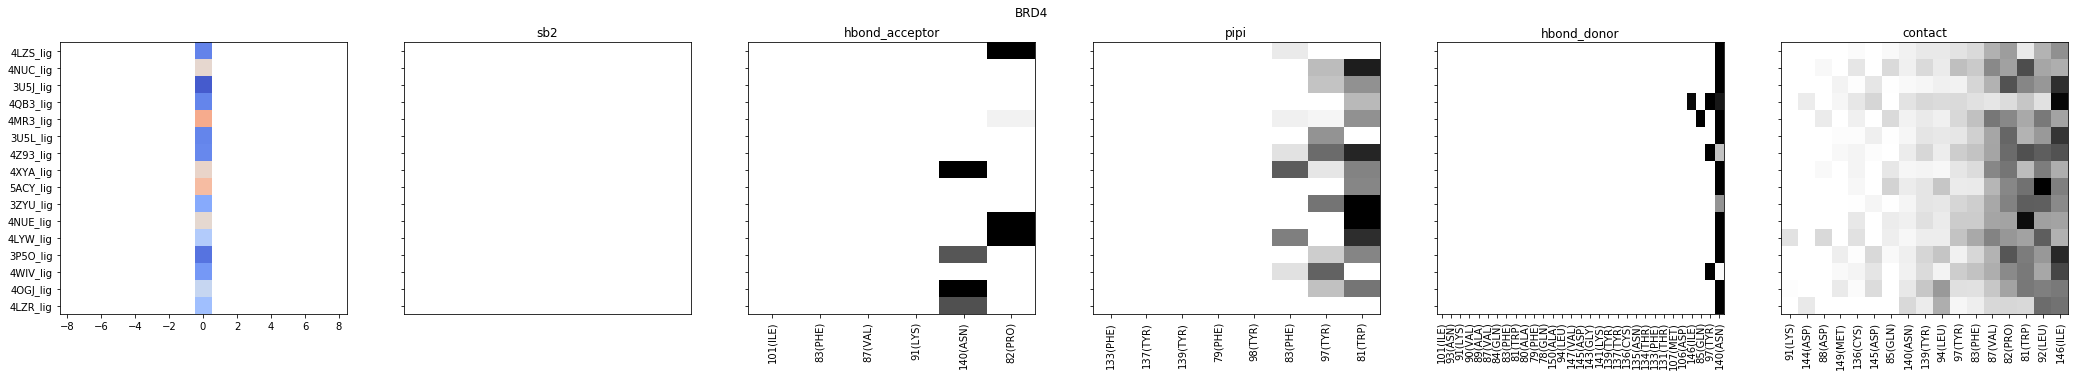

combind


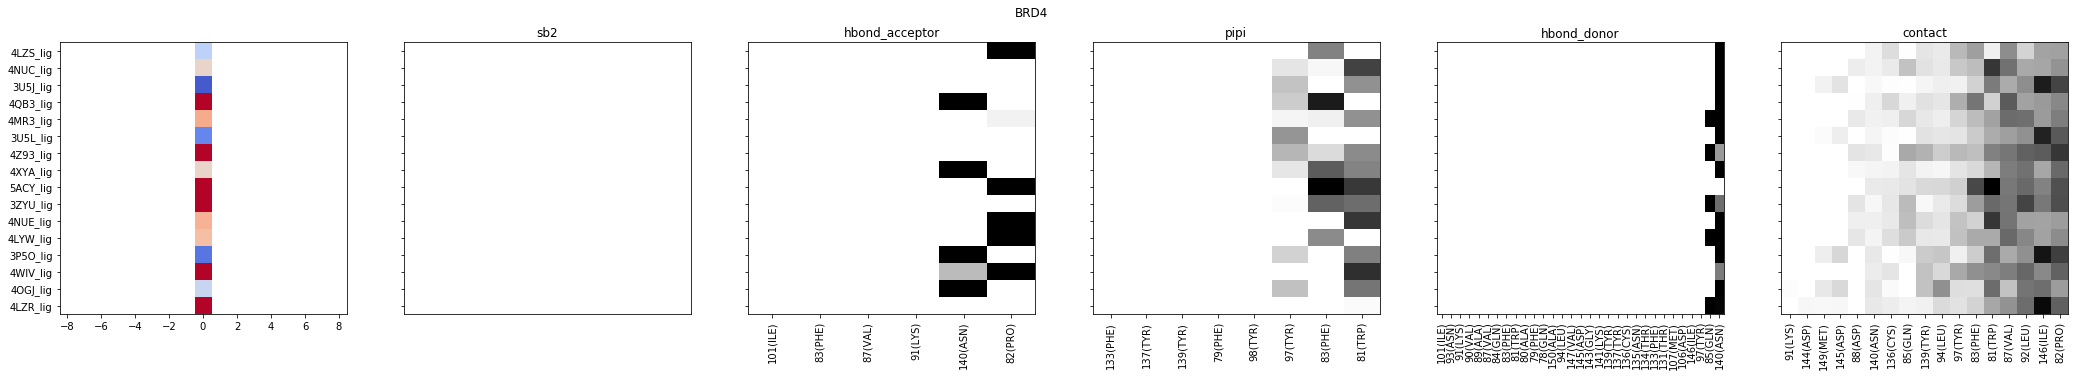

glide


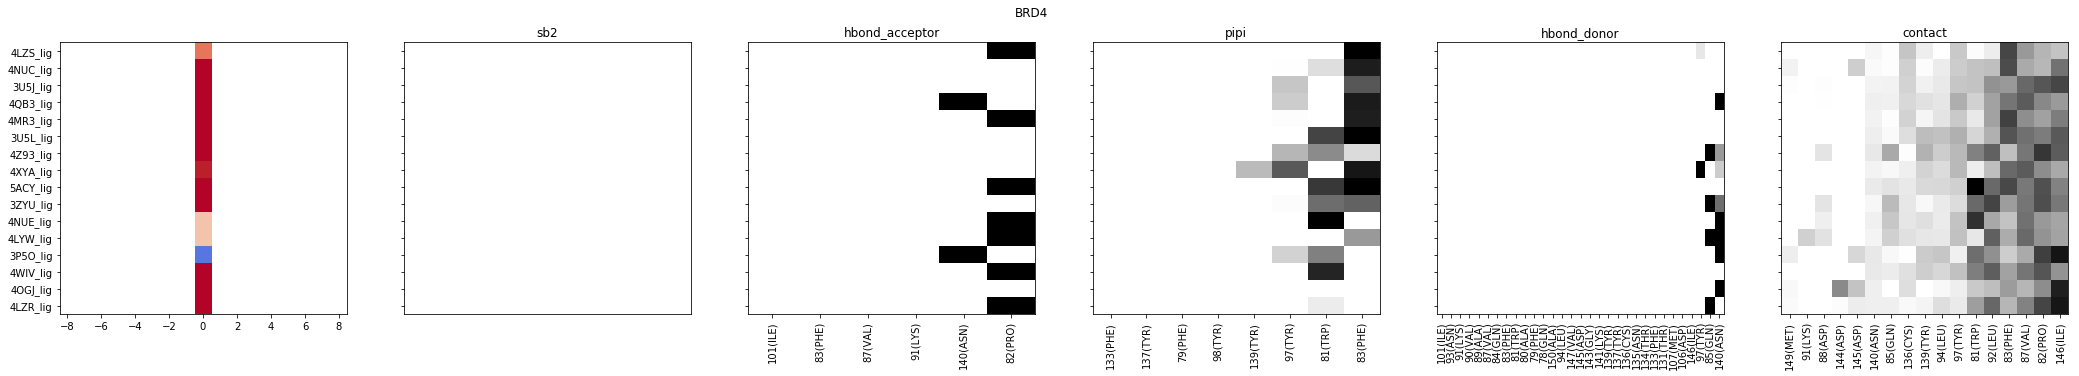

PTPN1
crystal


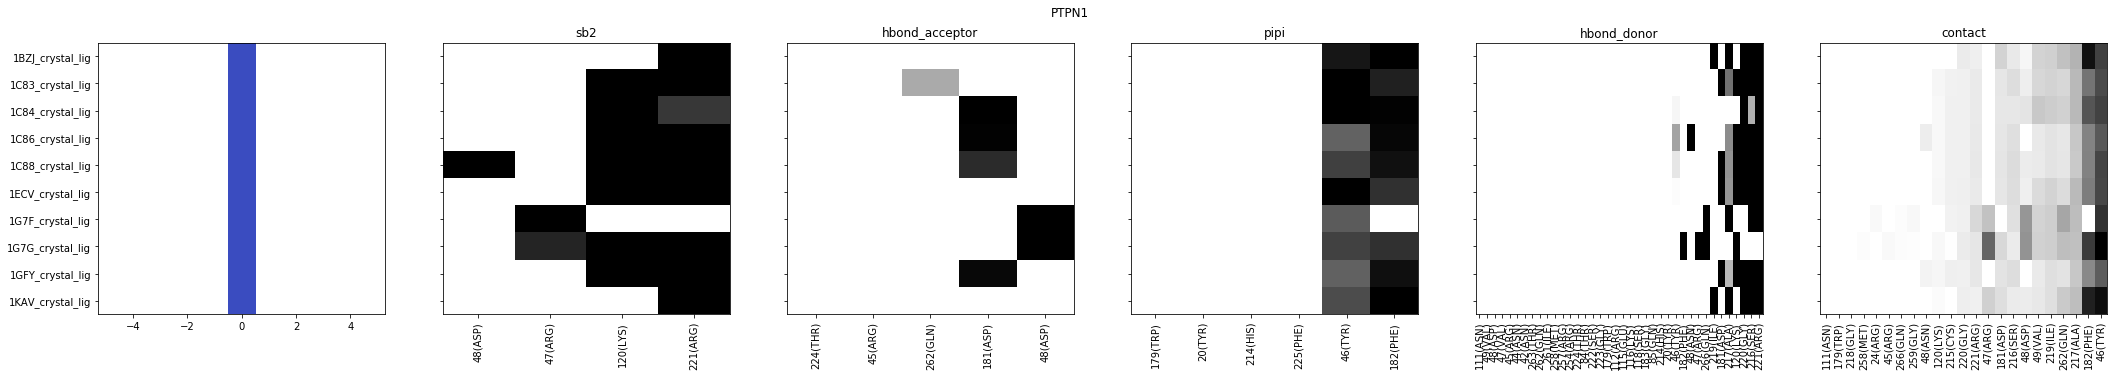

best


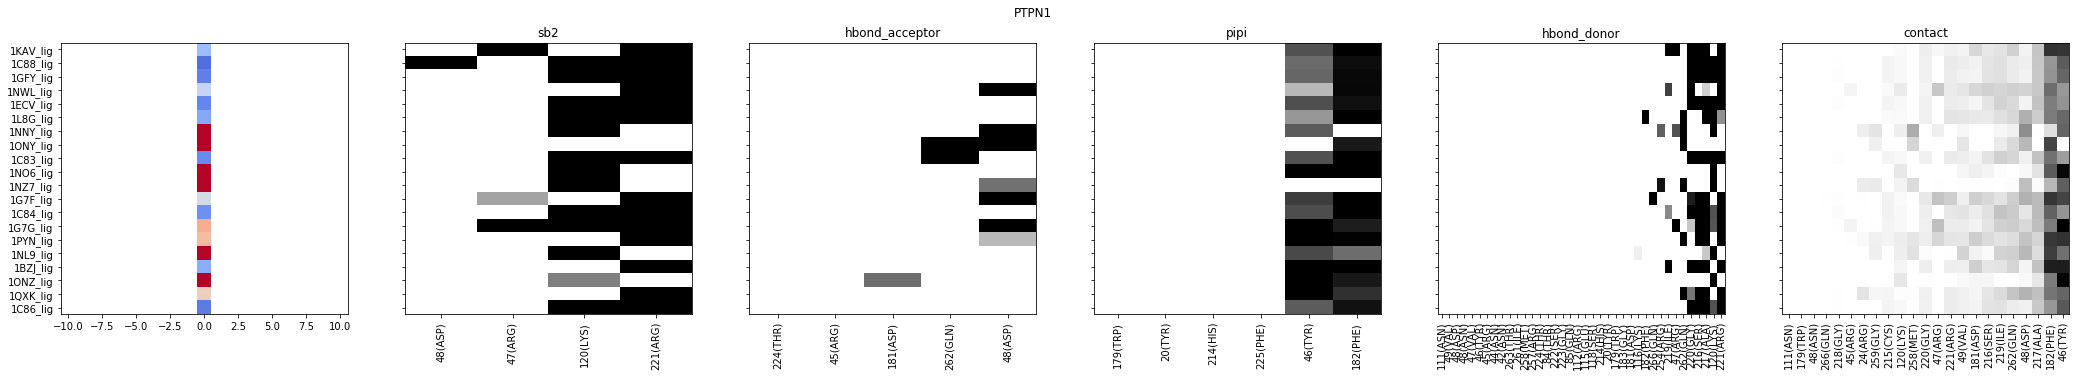

combind


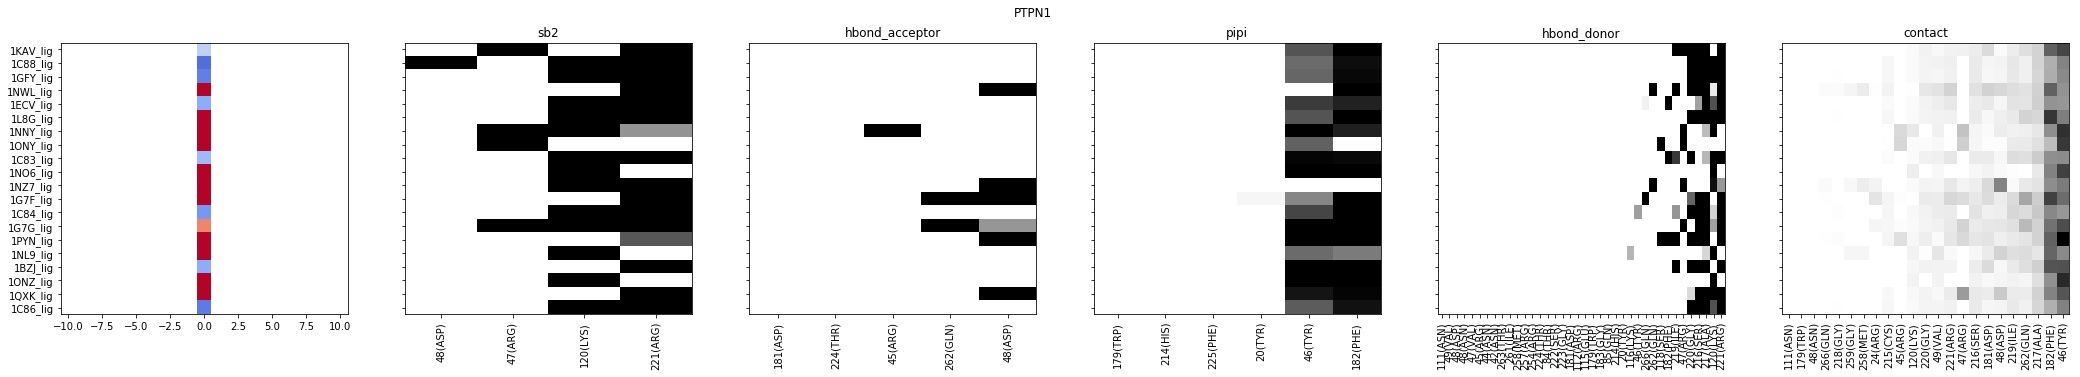

glide


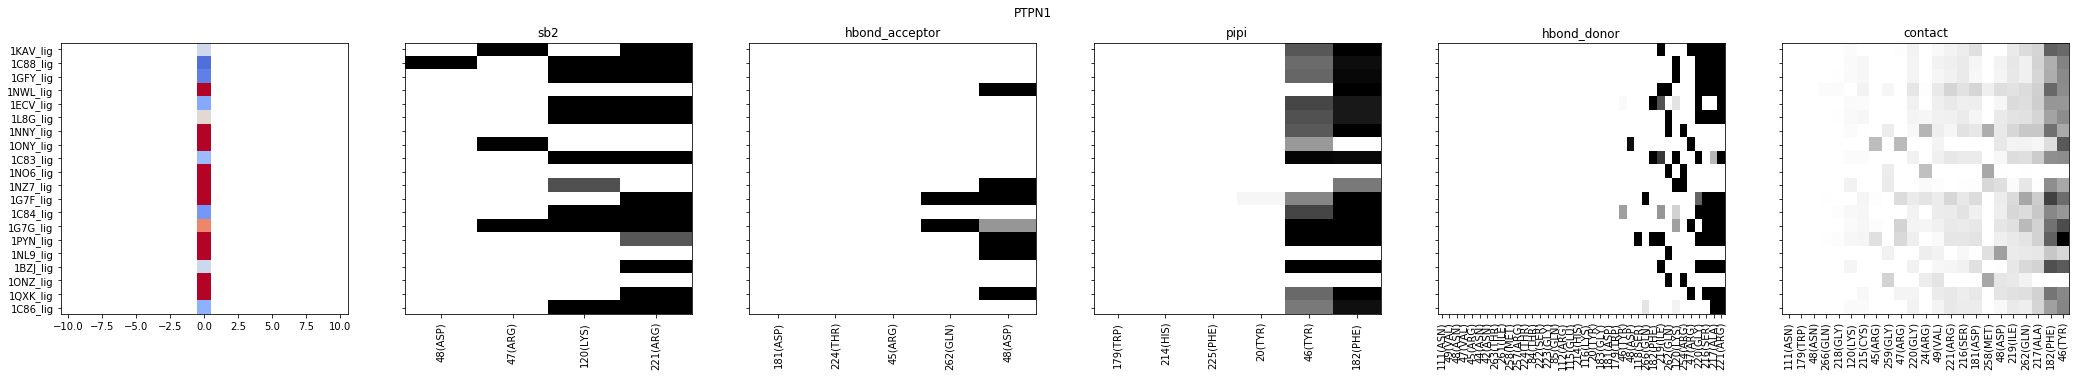

F11
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//F11/ifp/ifp4/4CR9_struct.fp', 'fp not found')
crystal


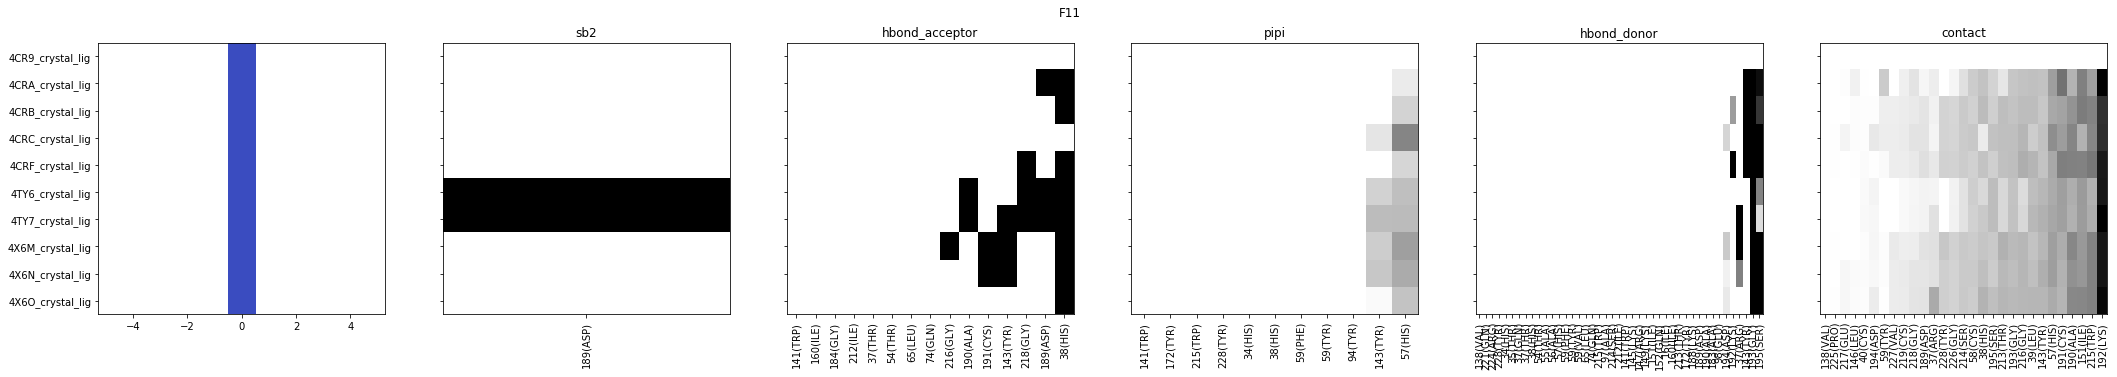

best


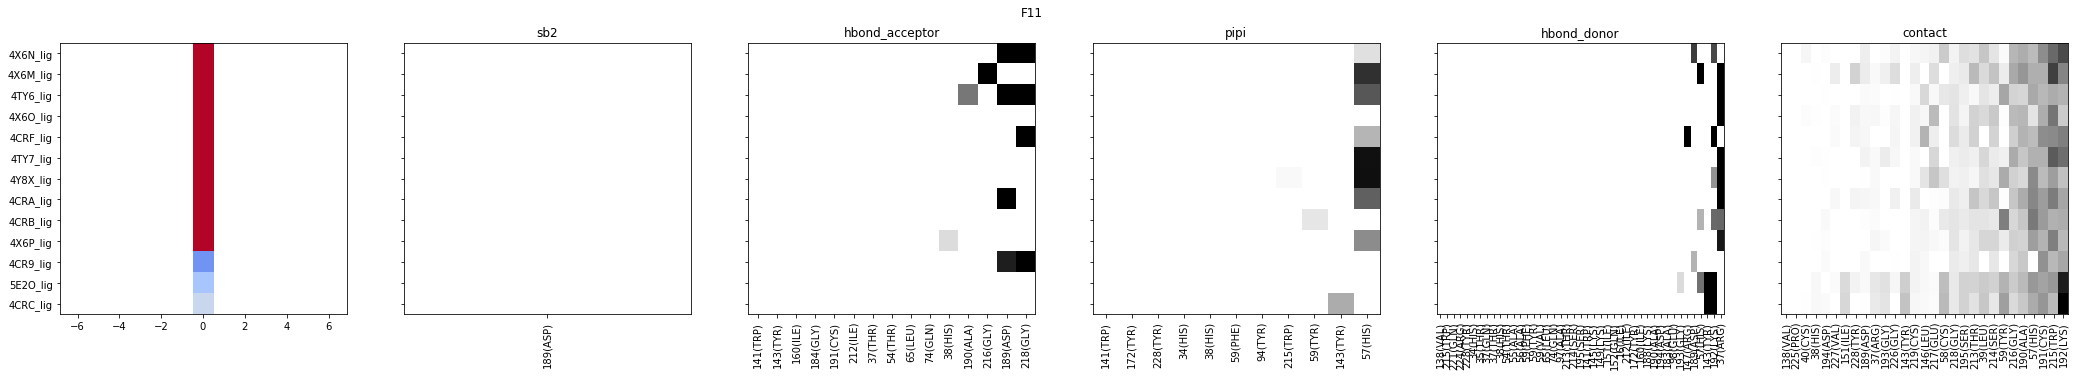

combind


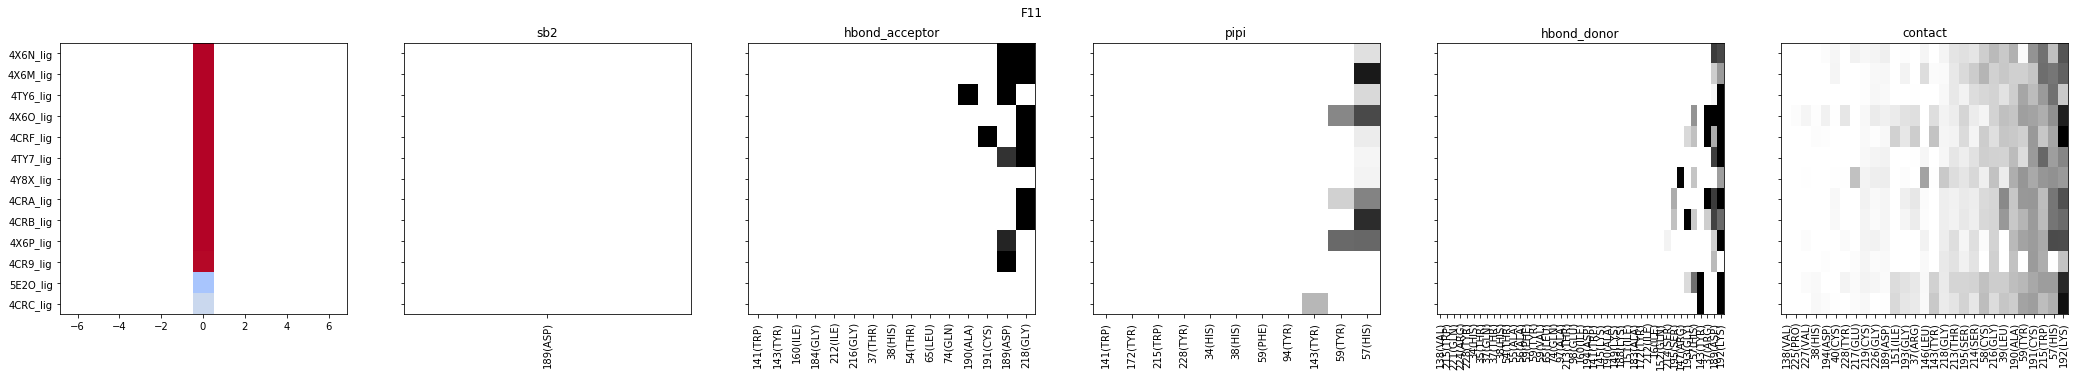

glide


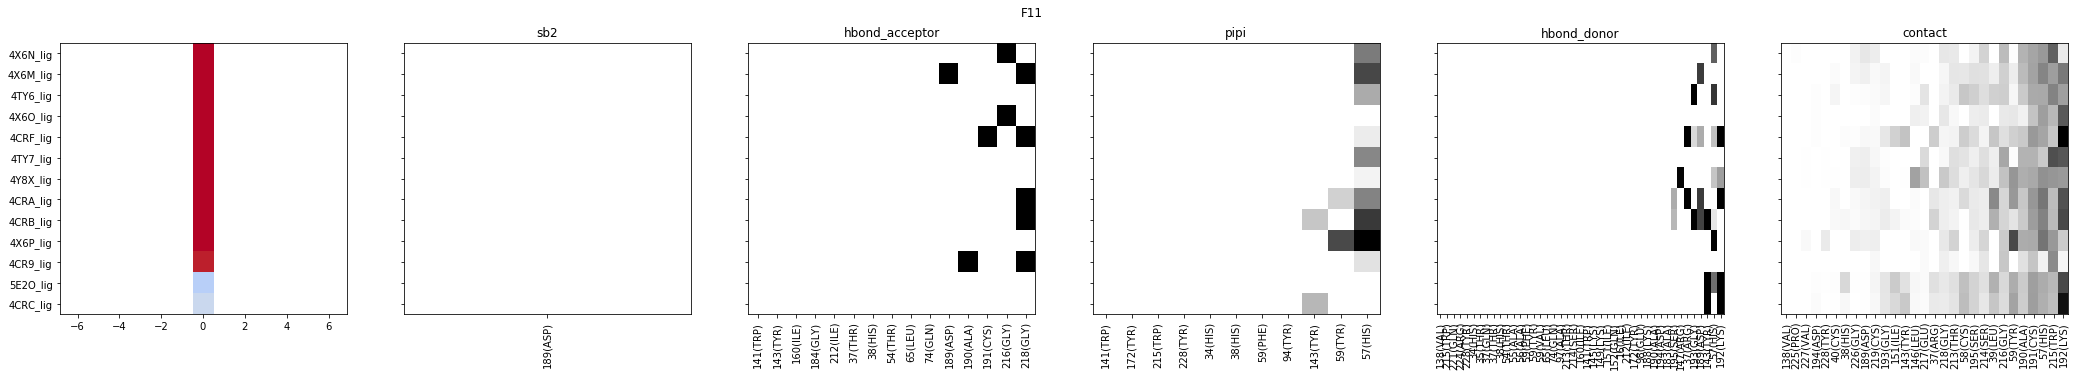

PDE10A
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//PDE10A/ifp/ifp4/4HF4_struct.fp', 'fp not found')
crystal


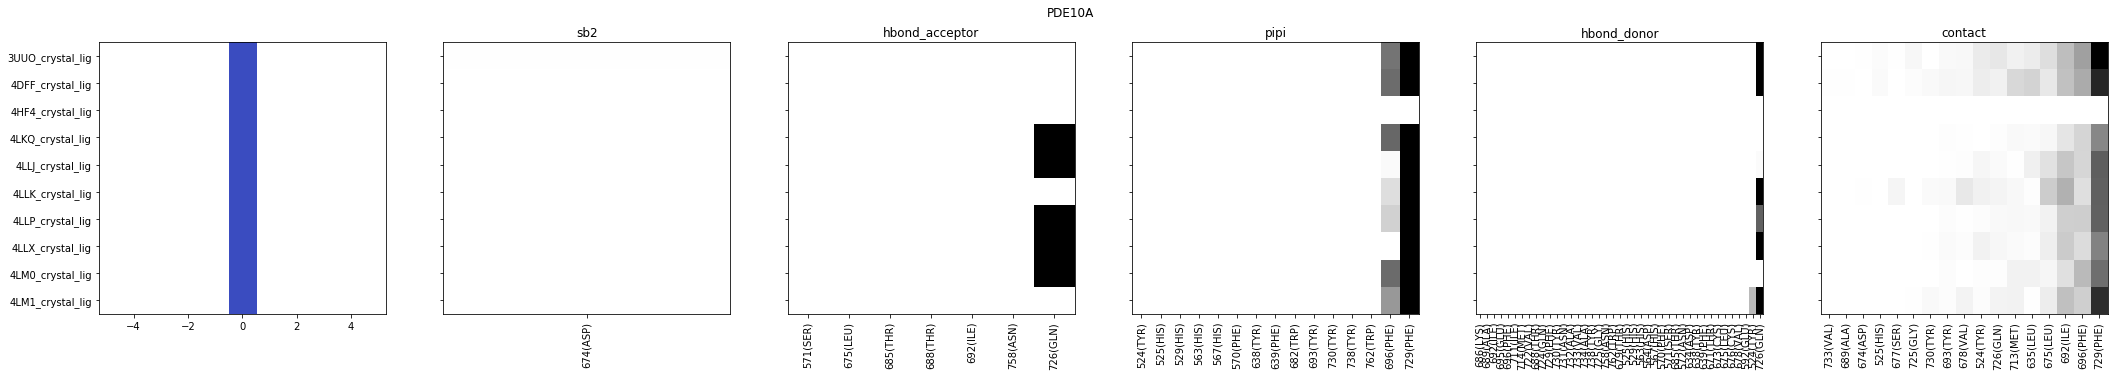

best


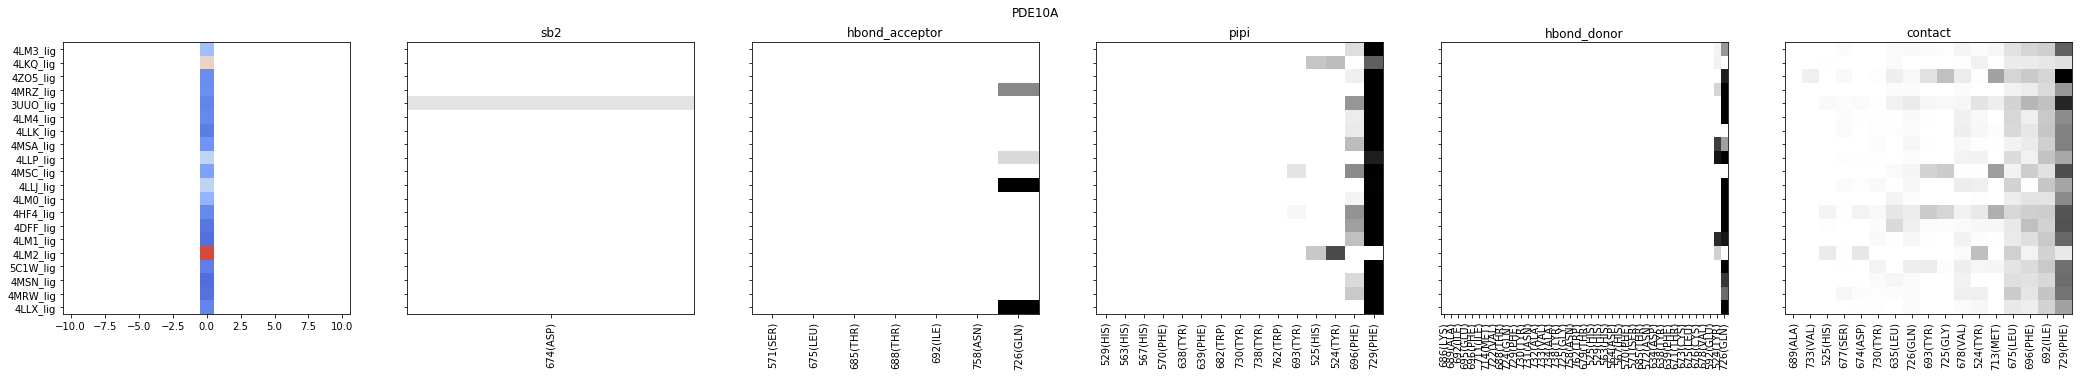

combind


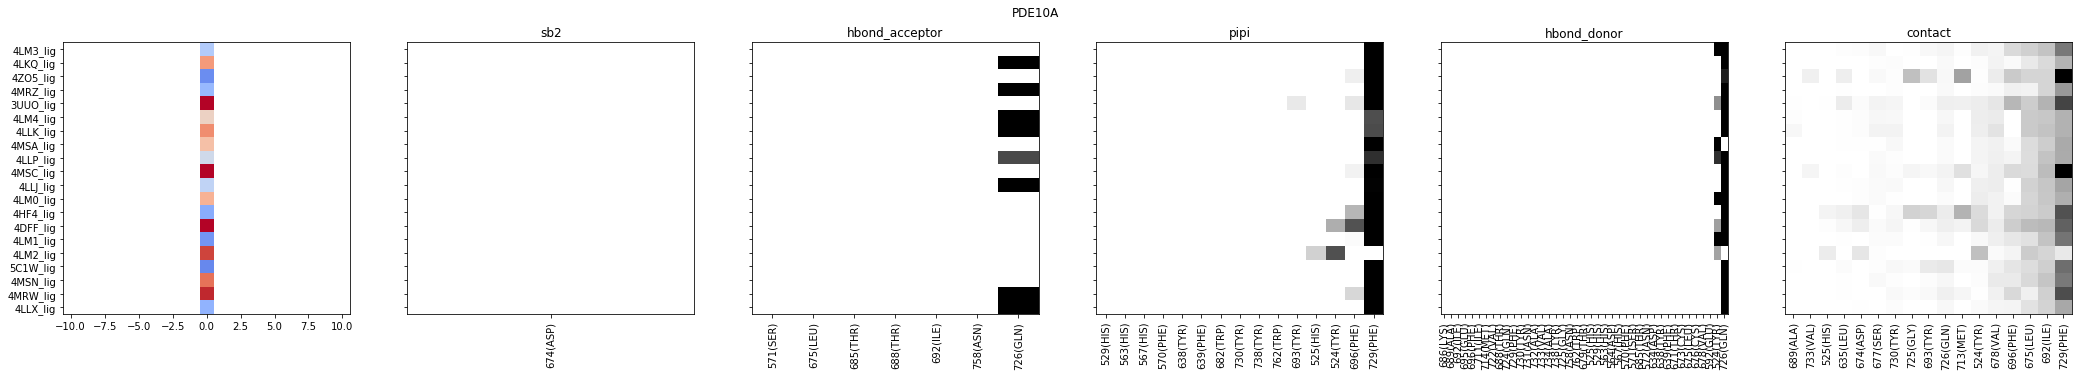

glide


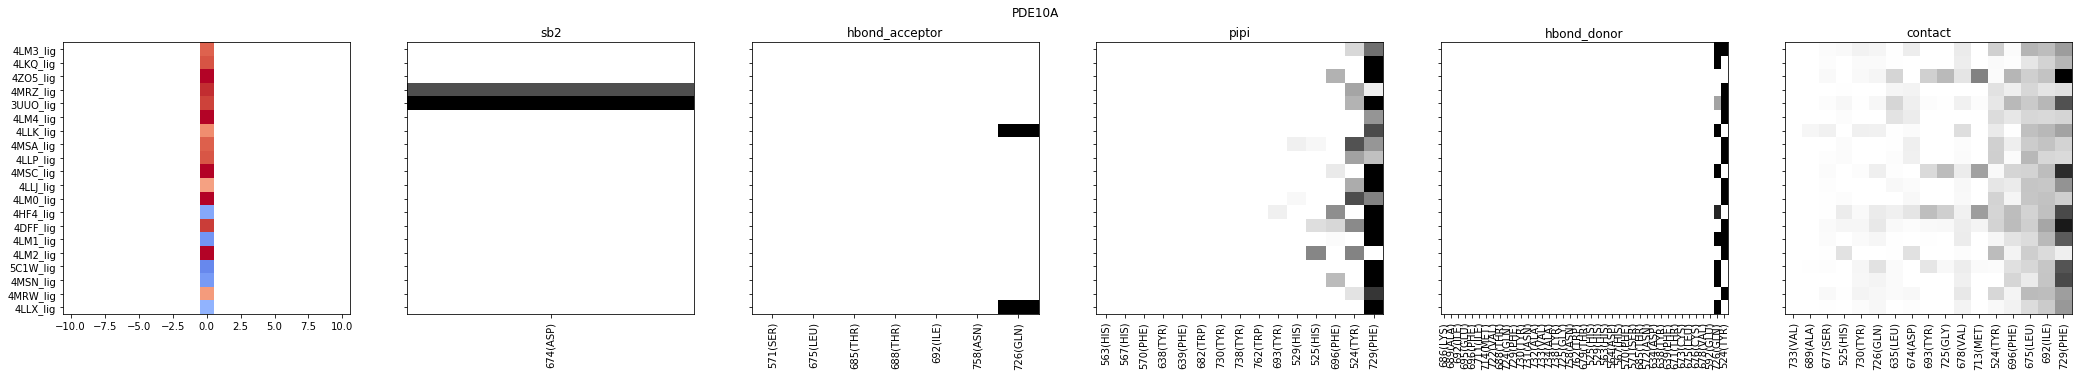

A2AR
crystal


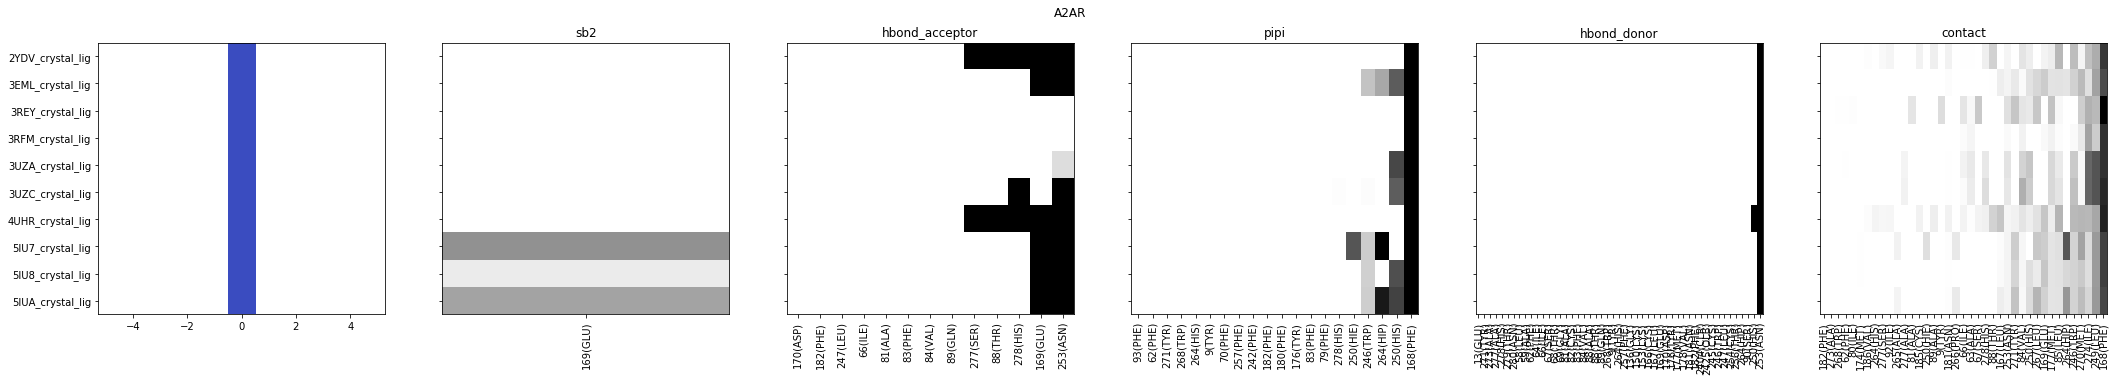

best


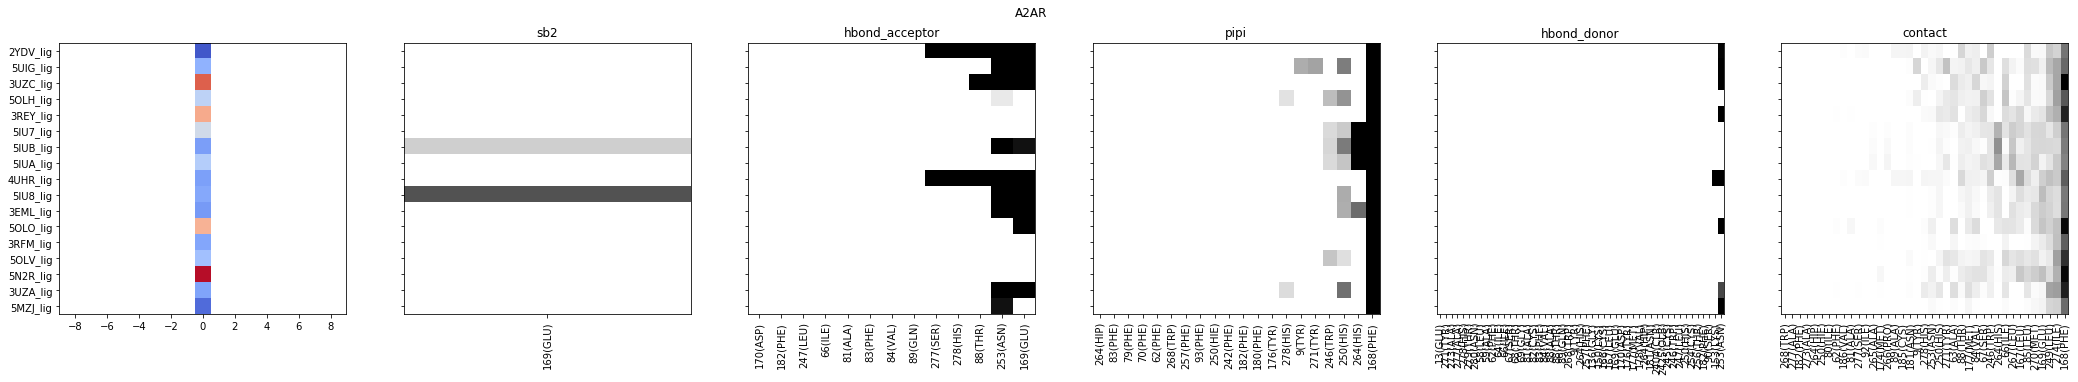

combind


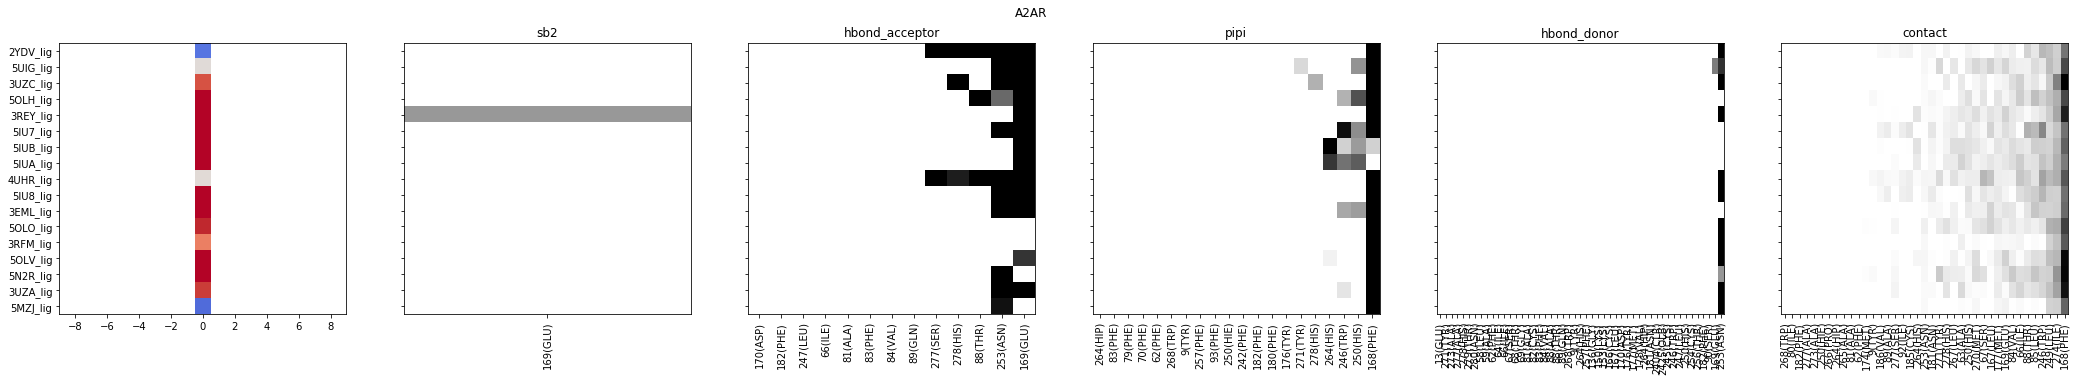

glide


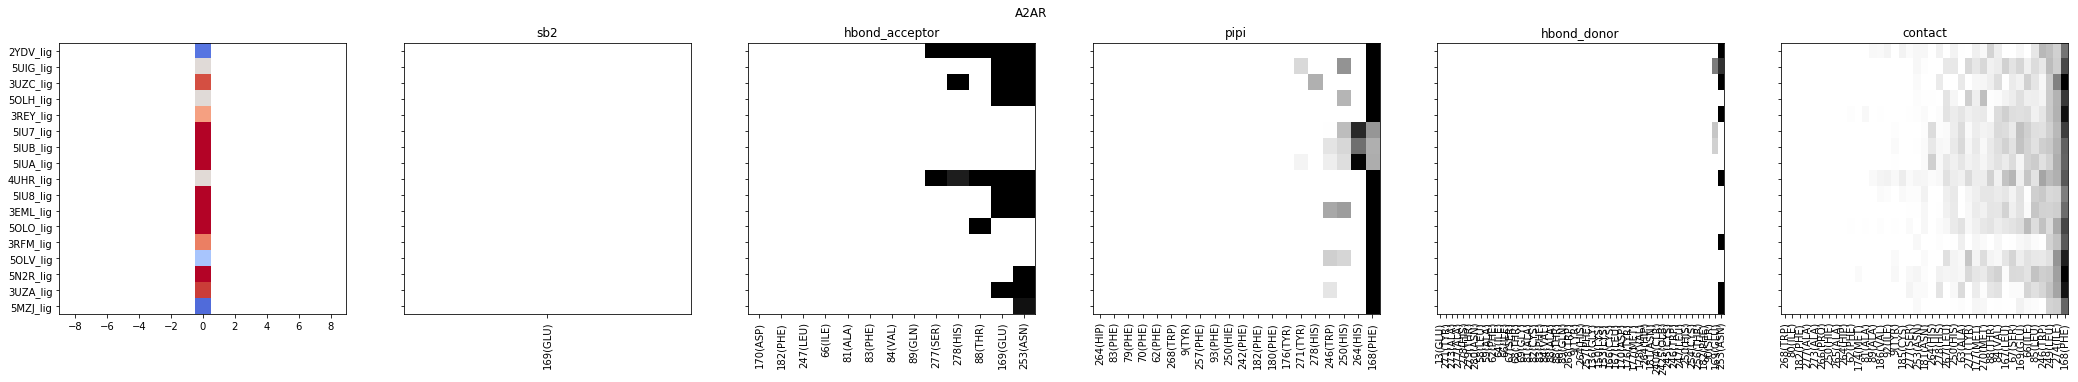

BACE1
crystal


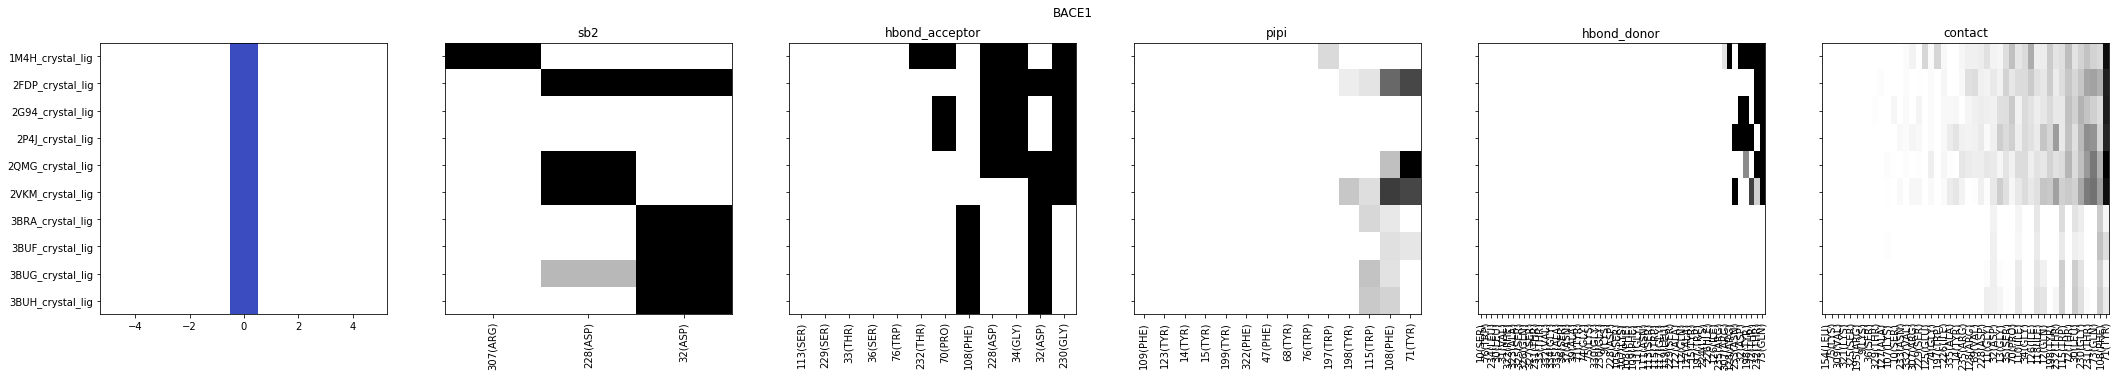

best


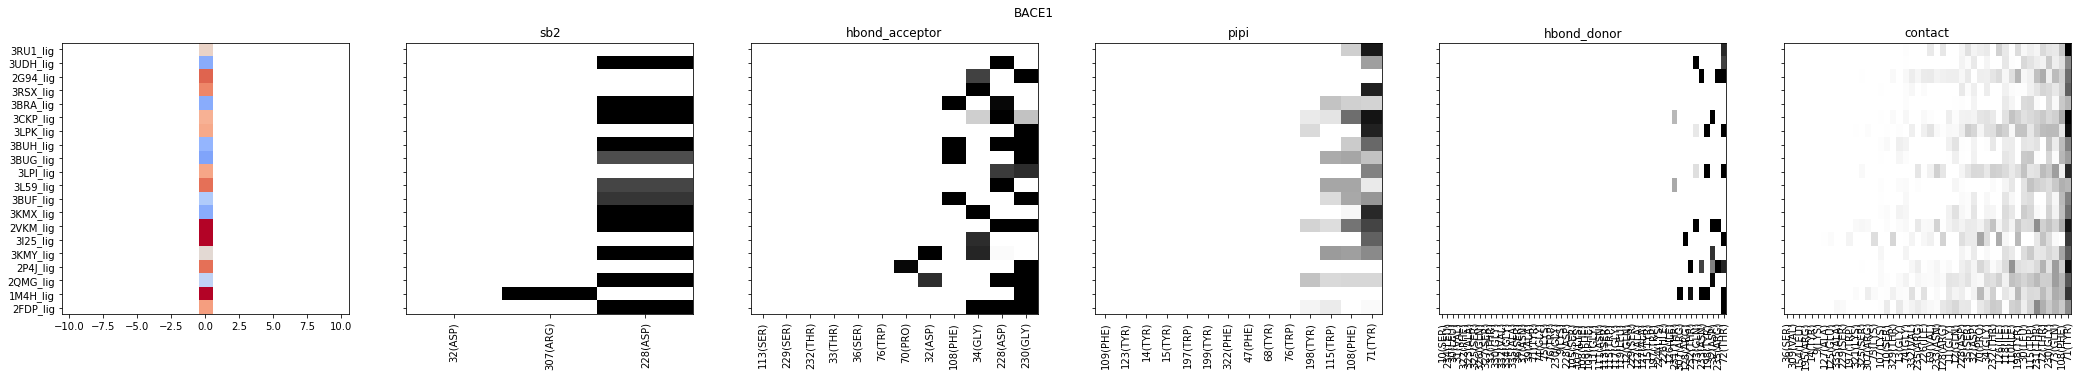

combind


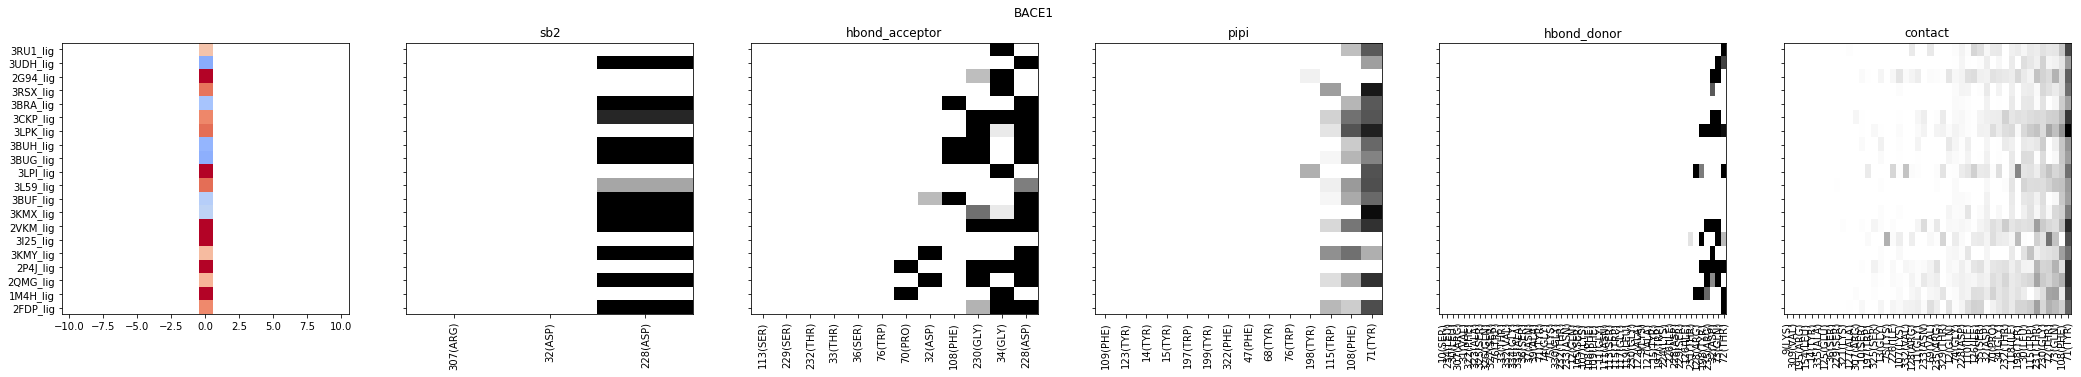

glide


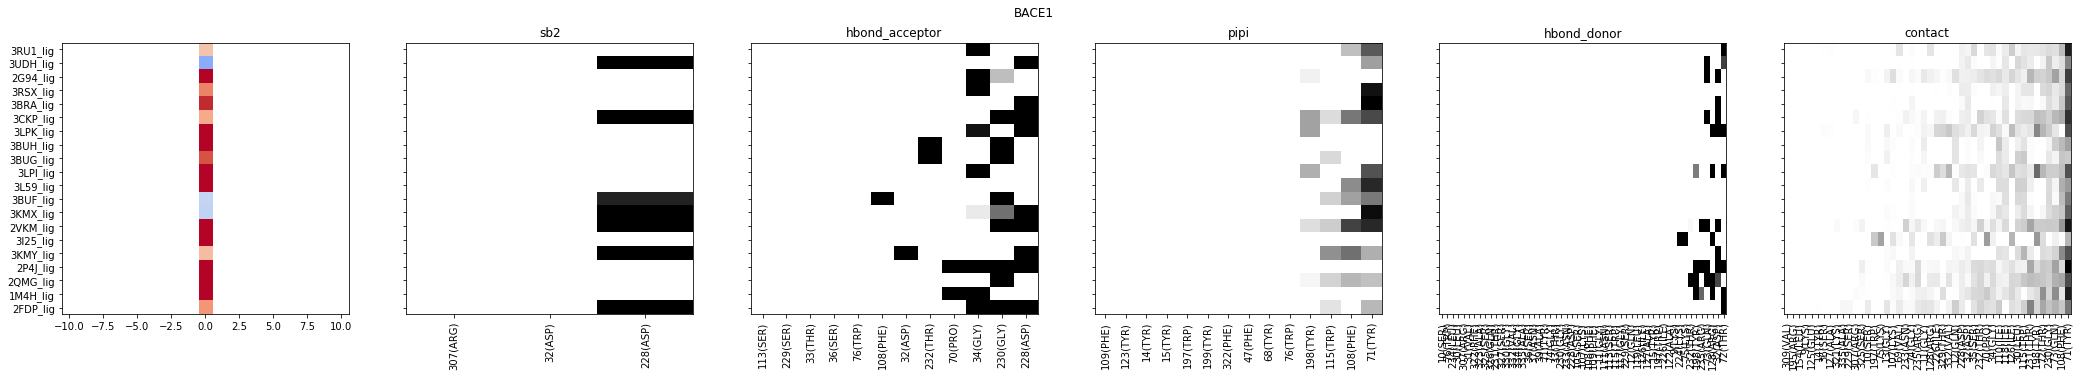

F2
crystal


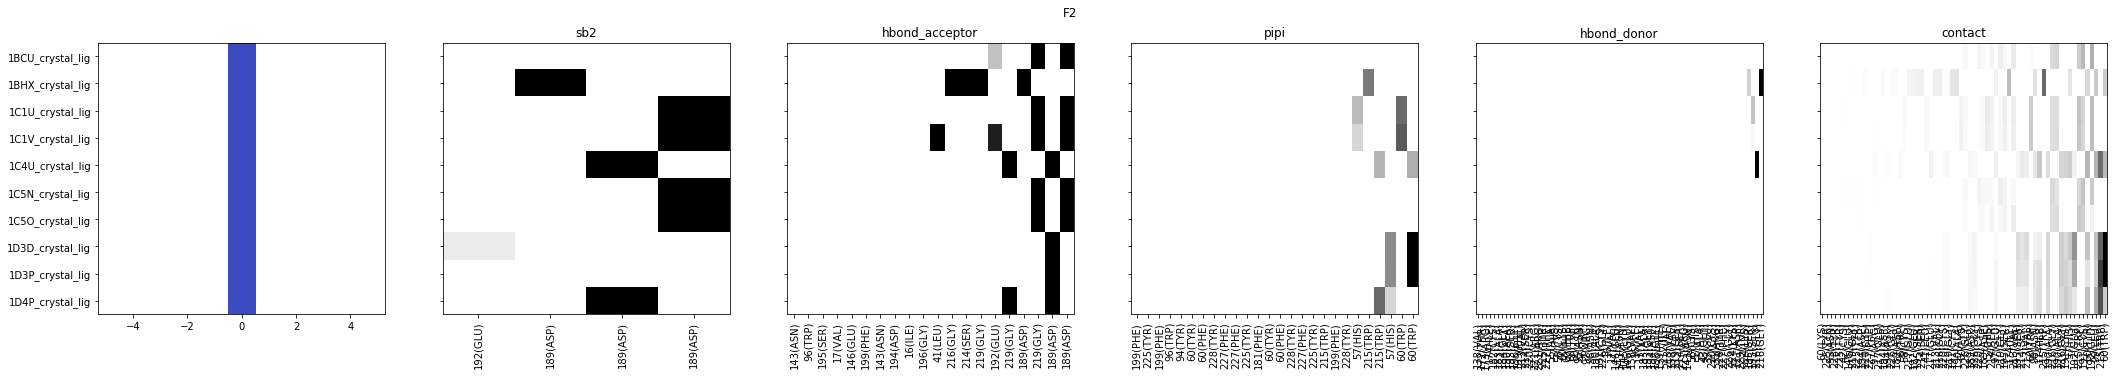

best


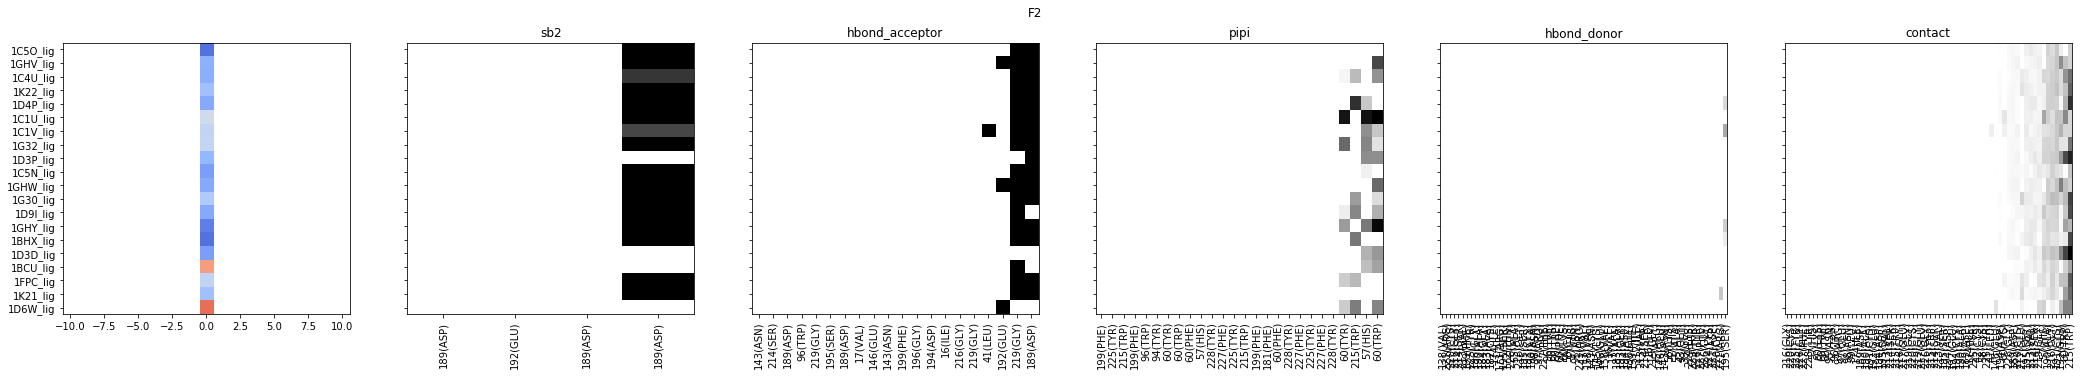

combind


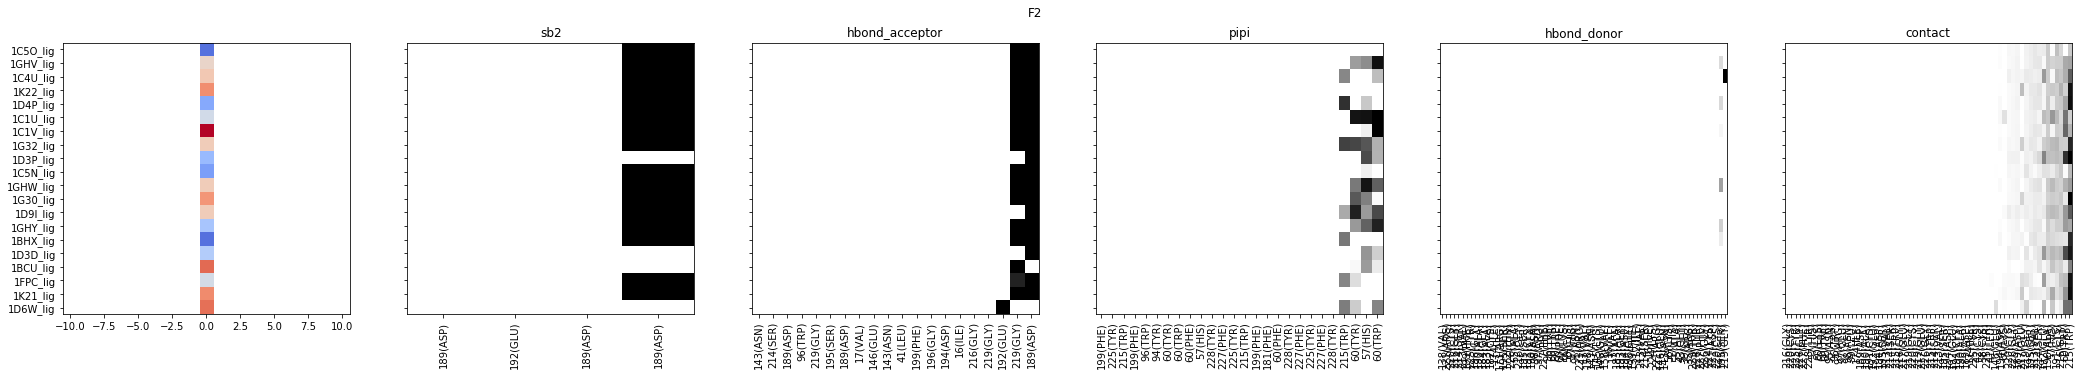

glide


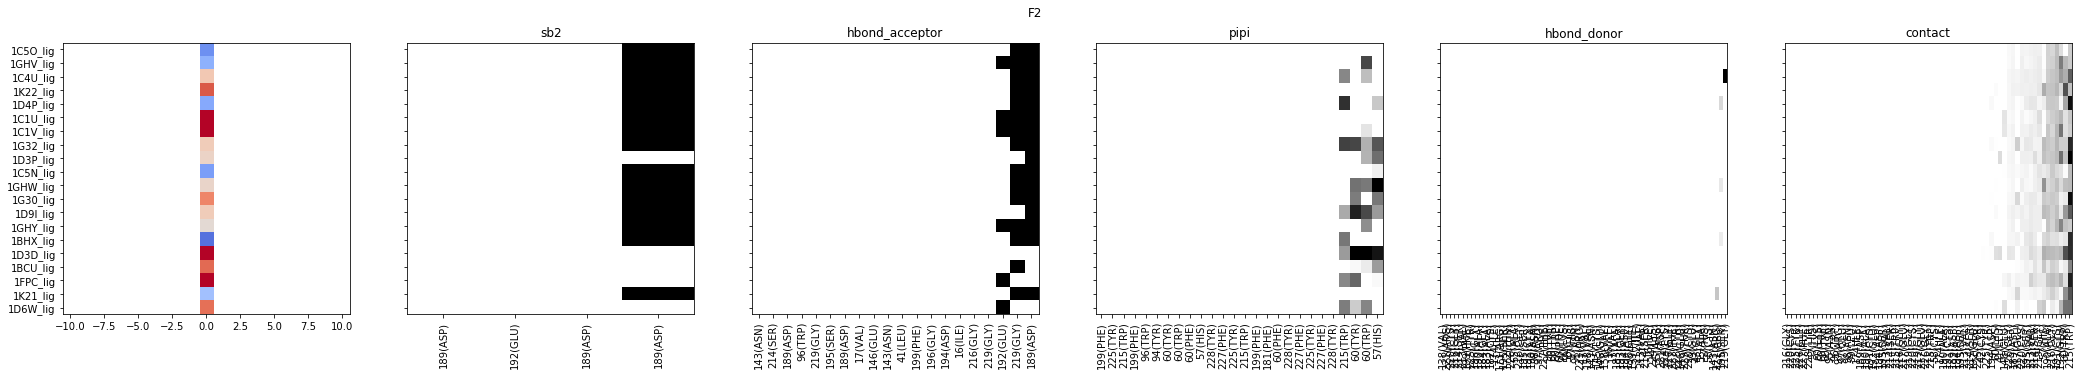

CHK1
crystal


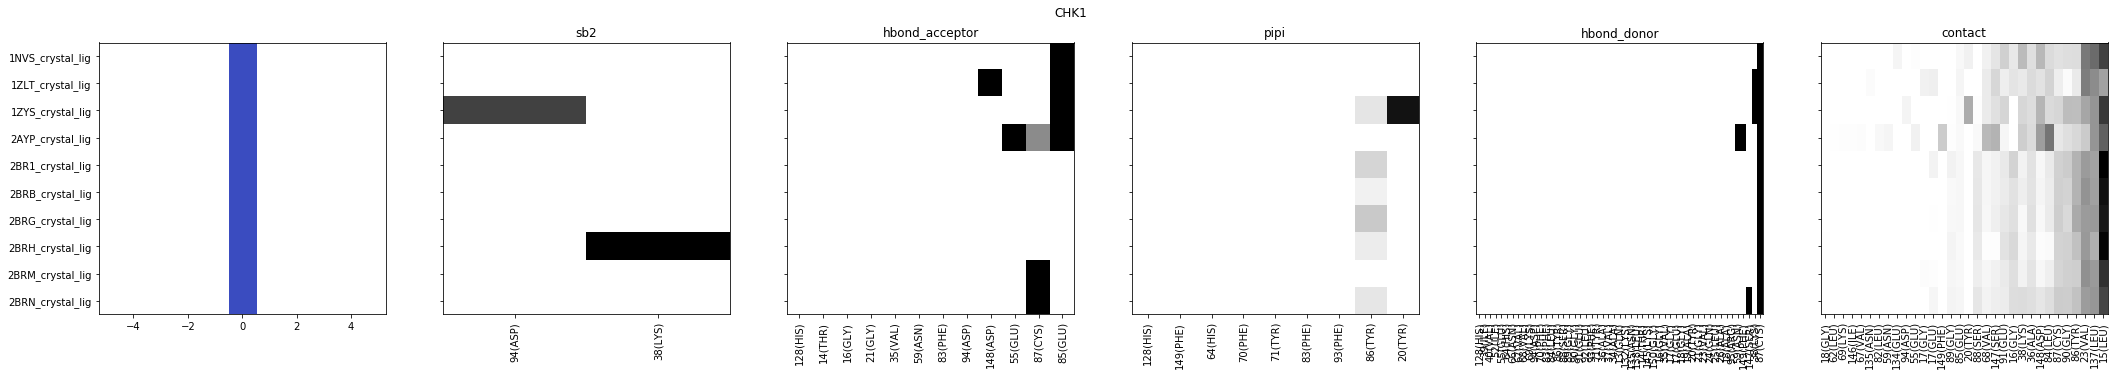

best


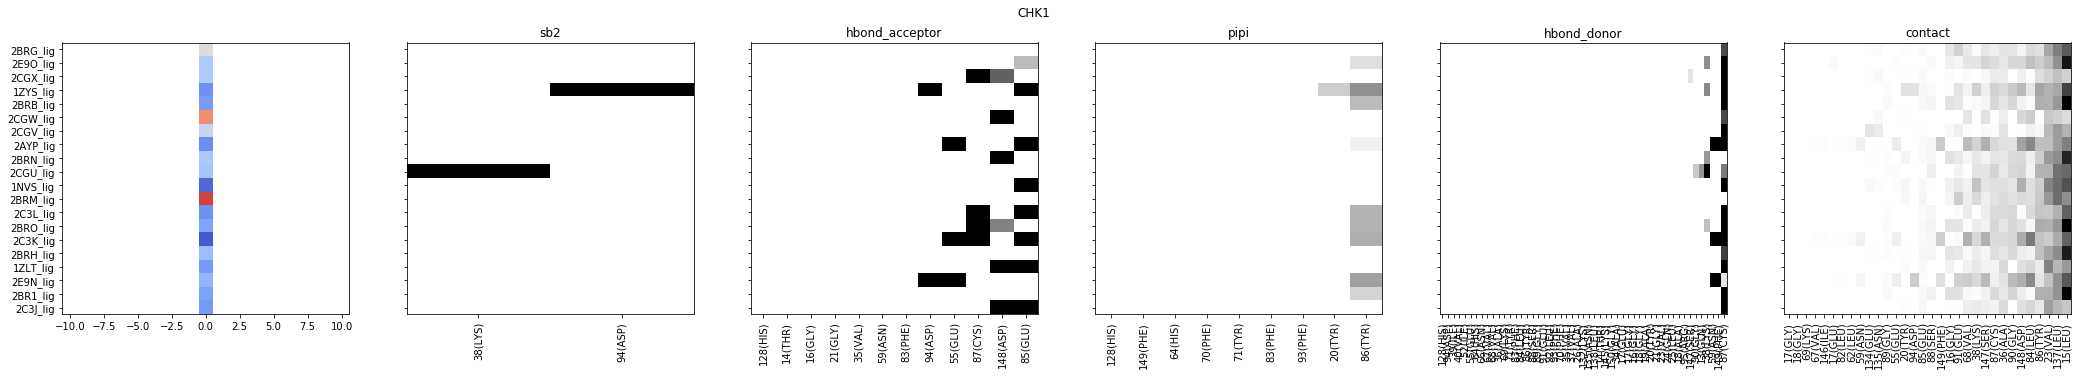

combind


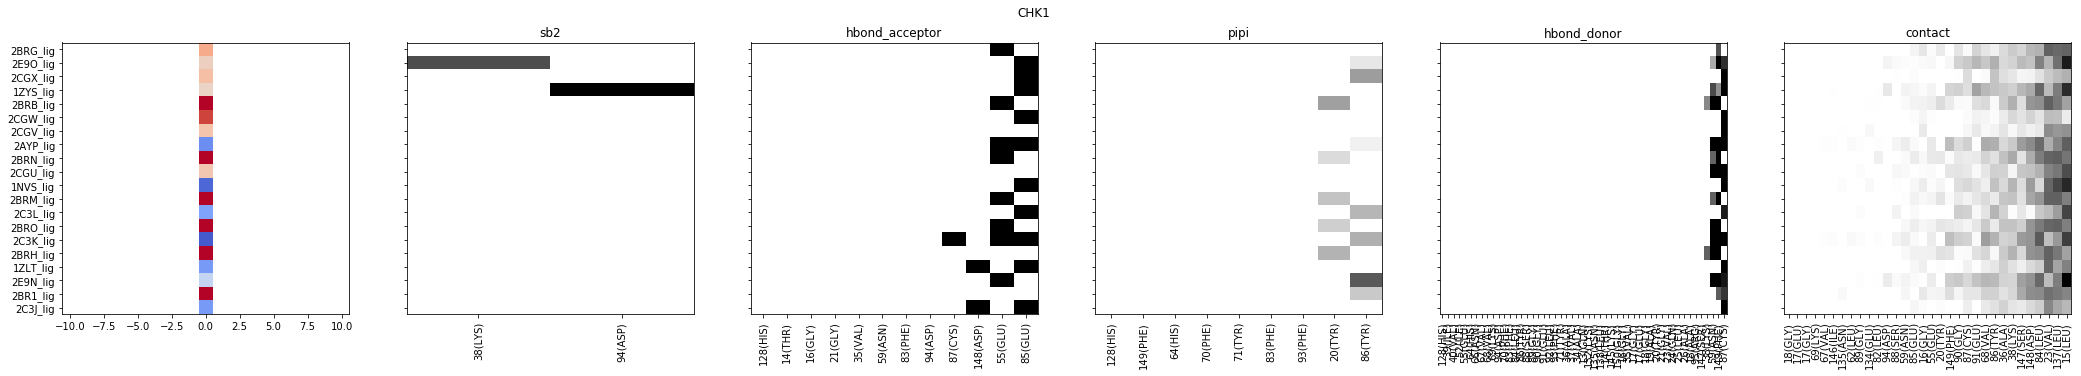

glide


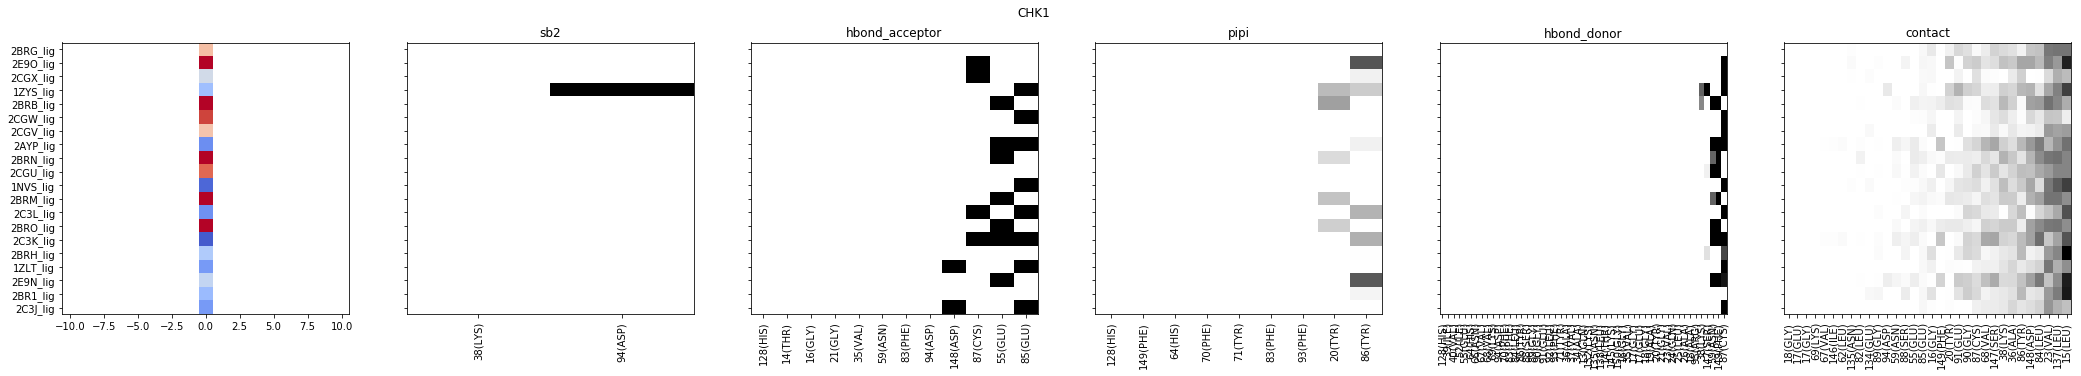

CDK2
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//CDK2/ifp/ifp4/1FIN_struct.fp', 'fp not found')
crystal


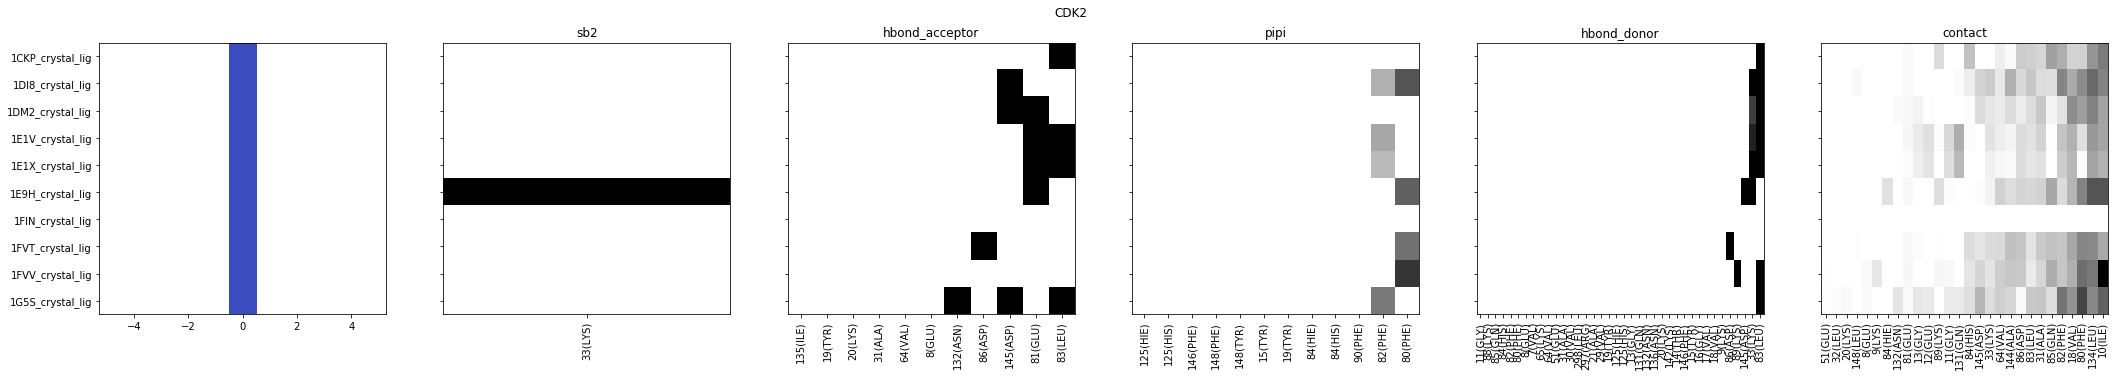

best


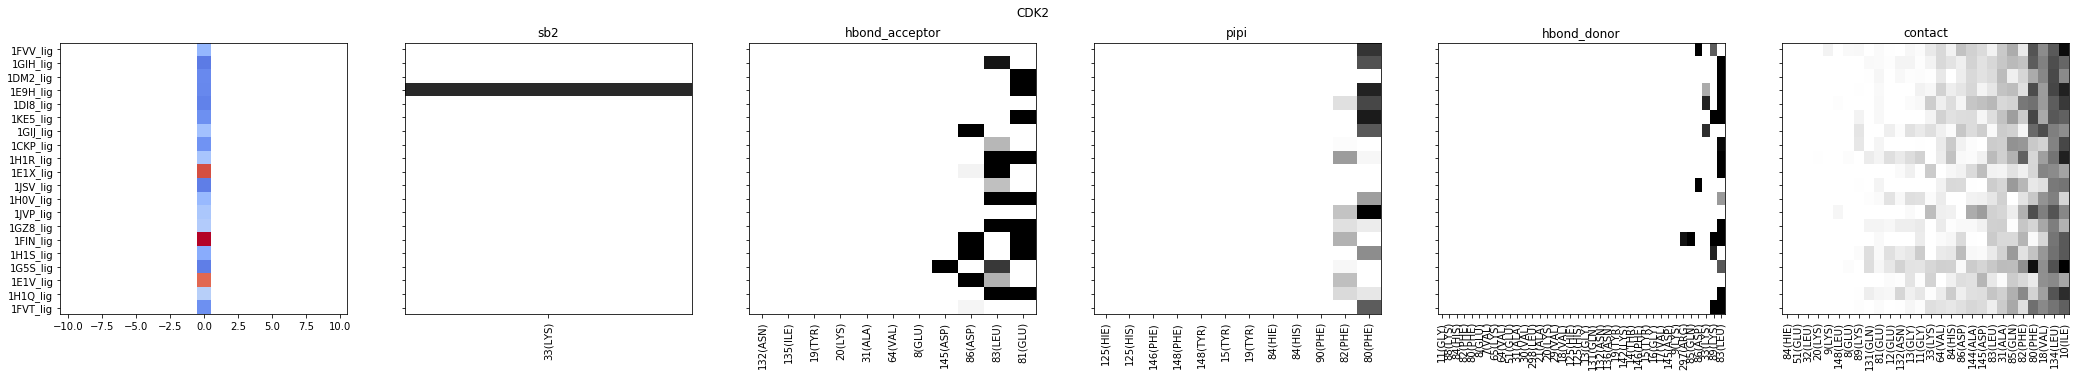

combind


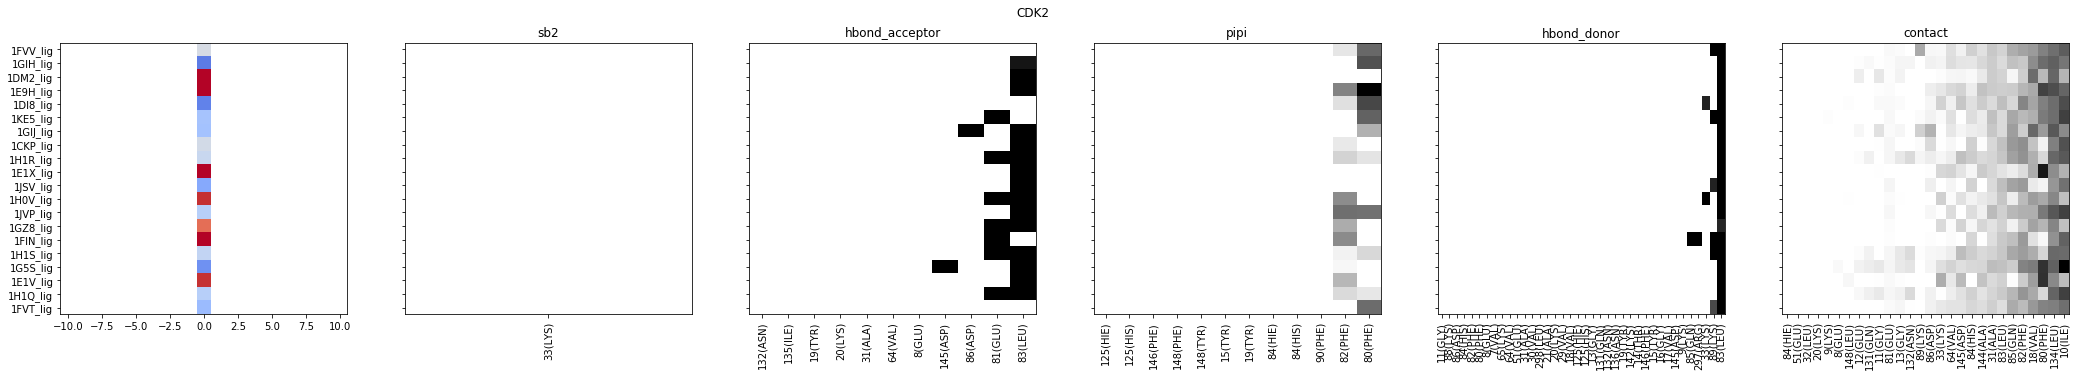

glide


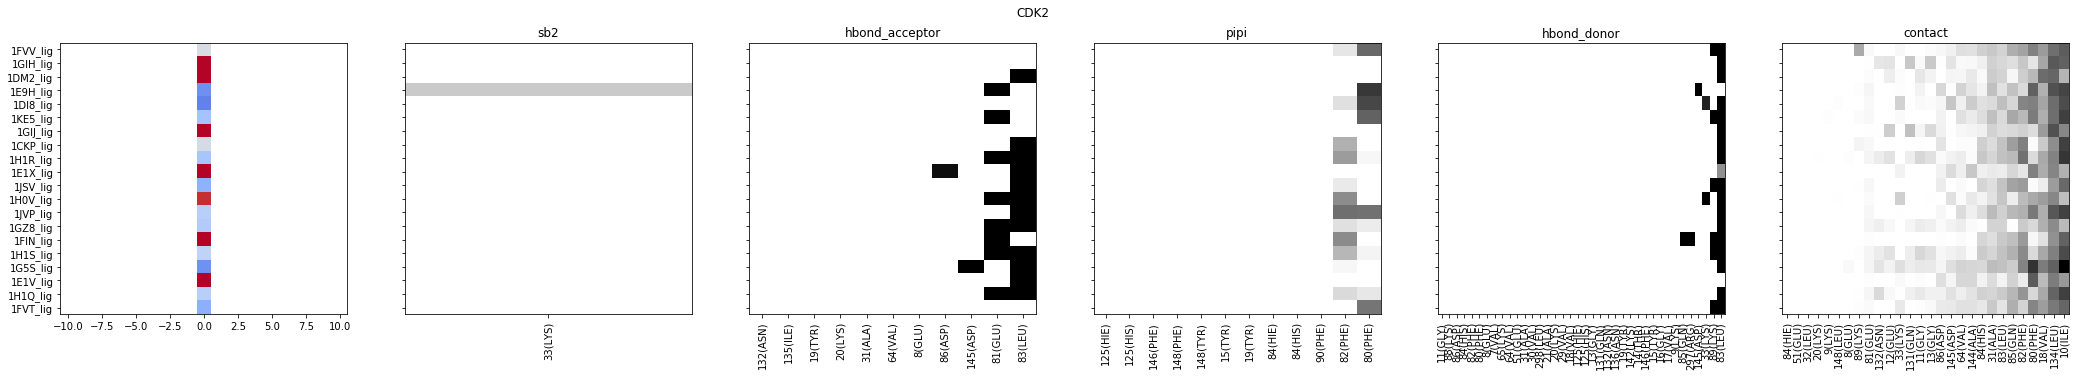

BRAF
crystal


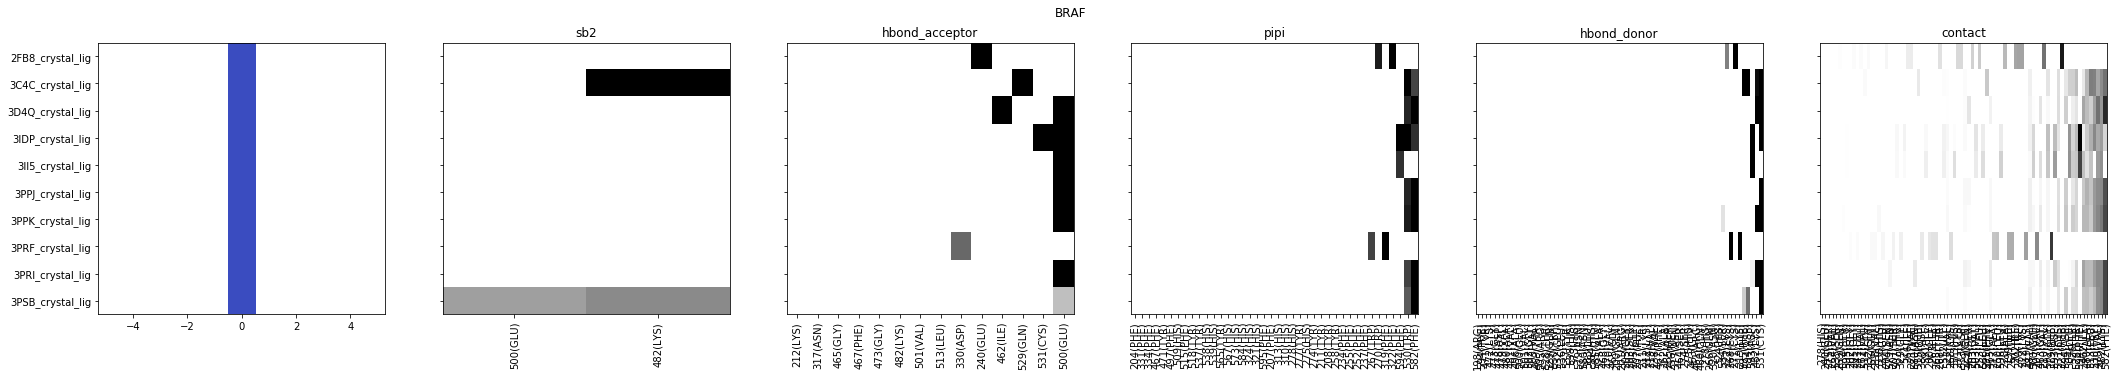

best


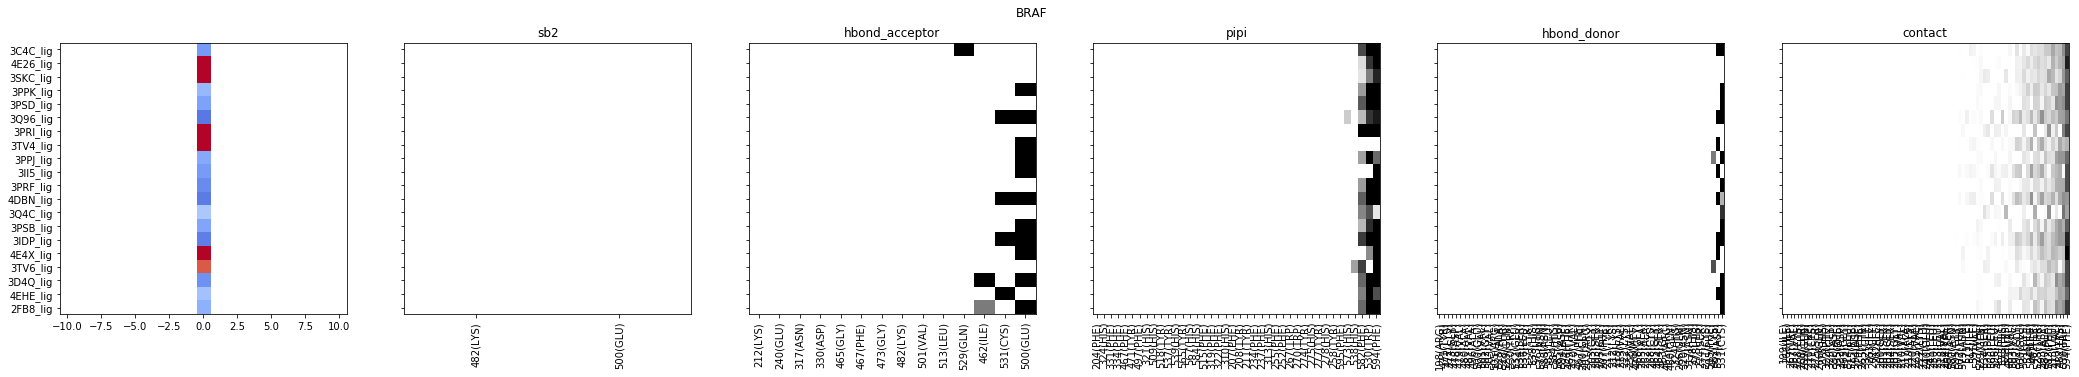

combind


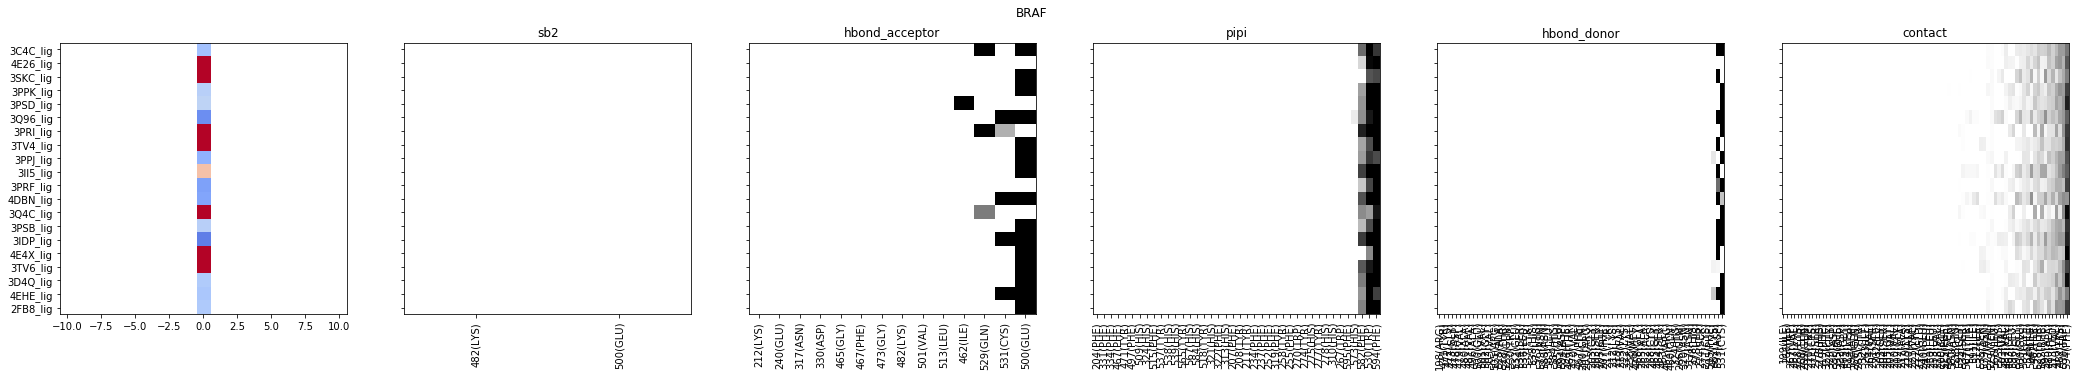

glide


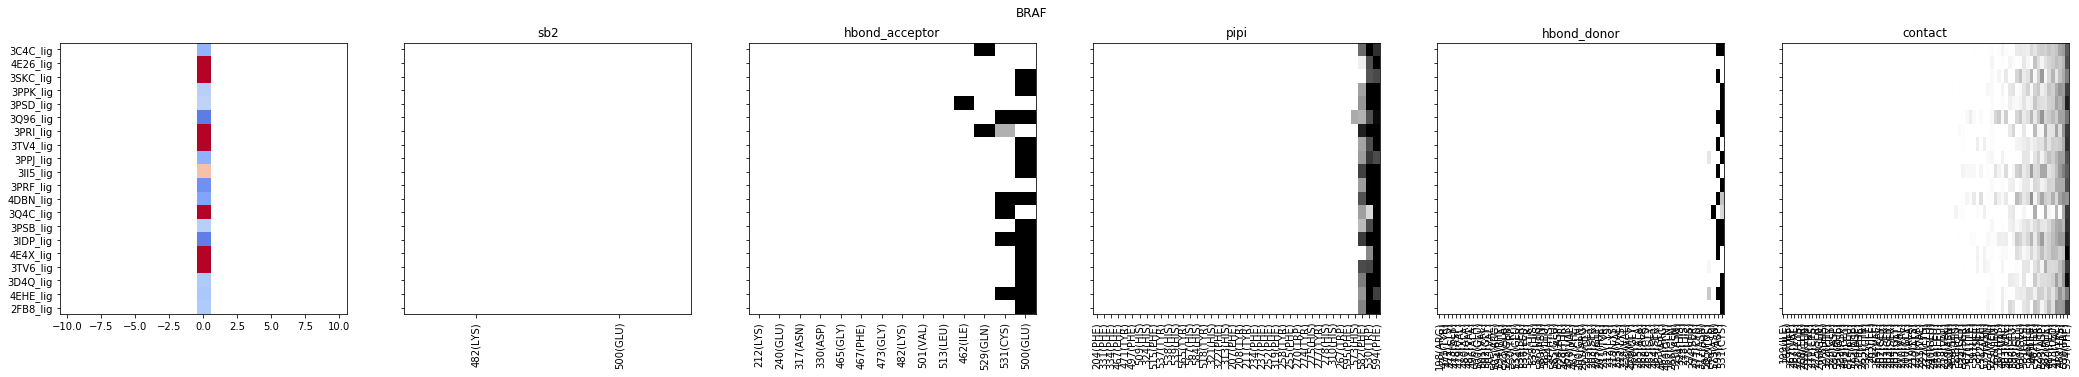

HSP90AA1
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//HSP90AA1/ifp/ifp4/2XDL_struct.fp', 'fp not found')
crystal


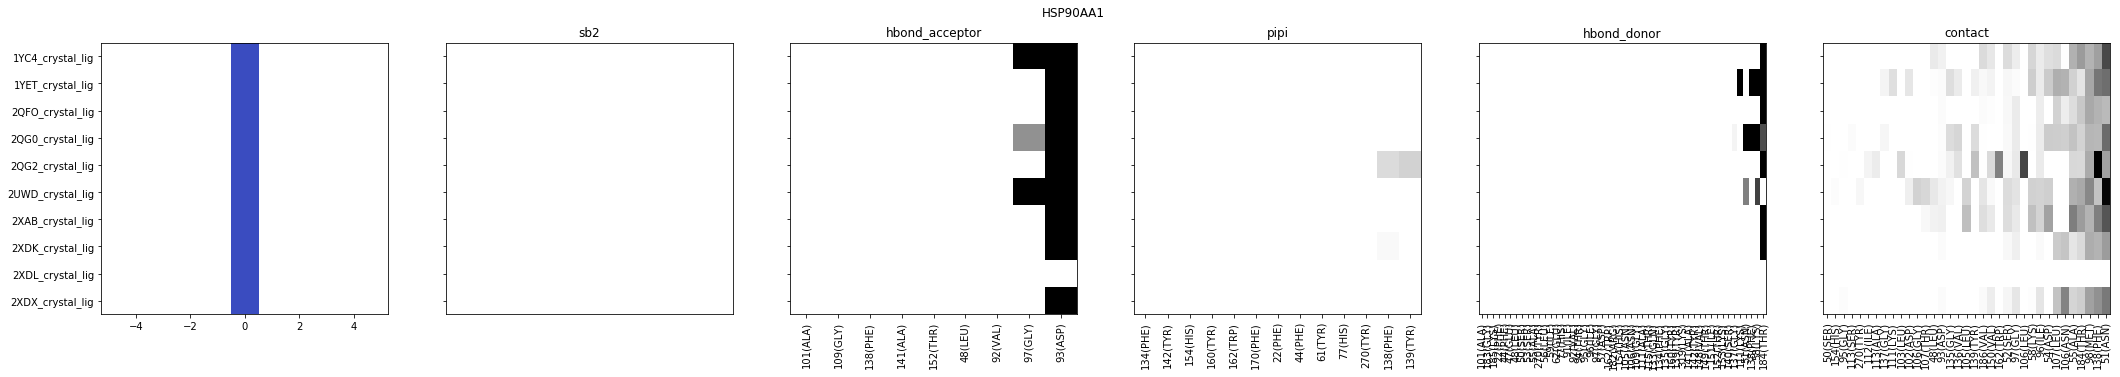

best


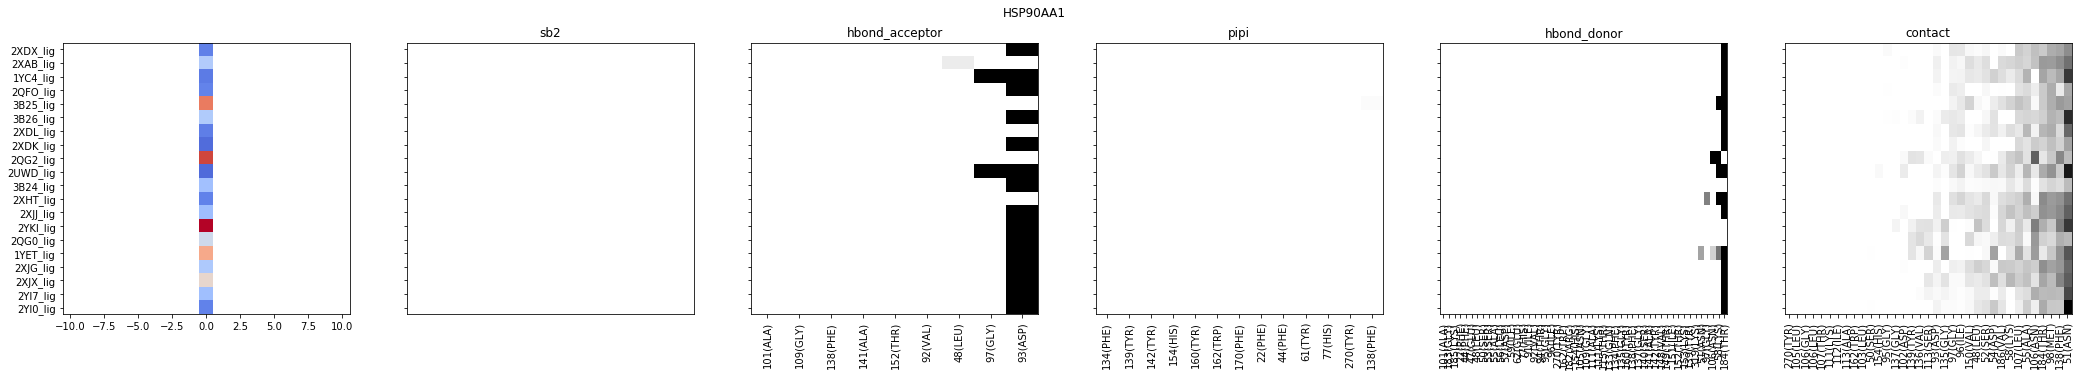

combind


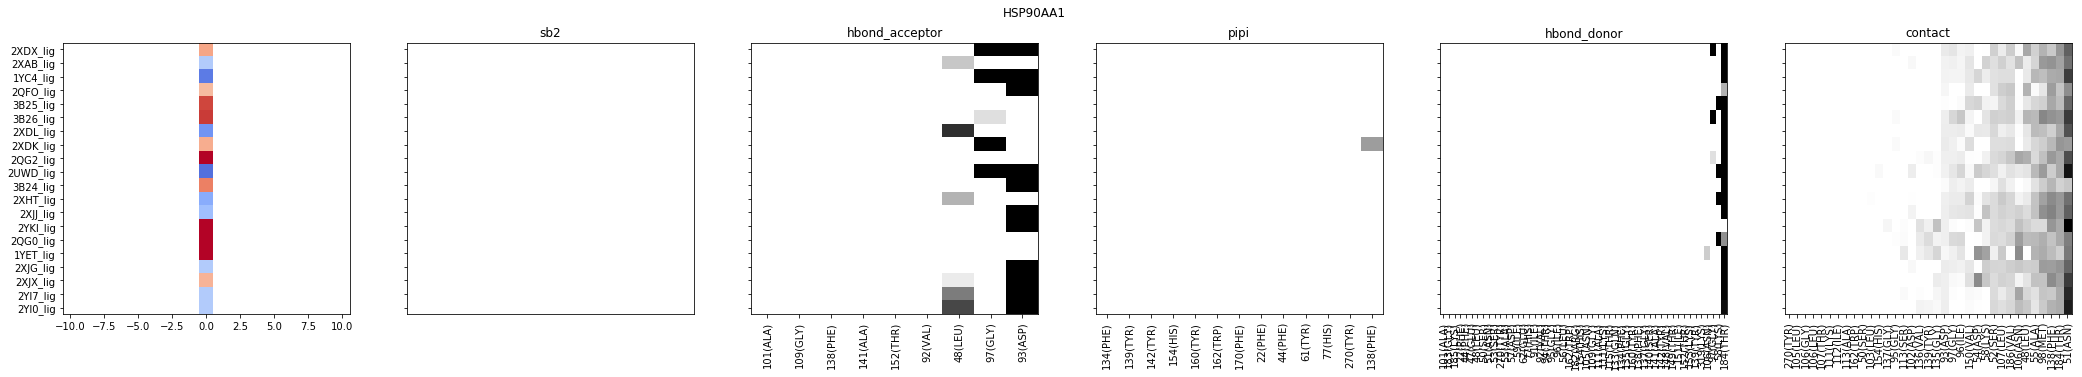

glide


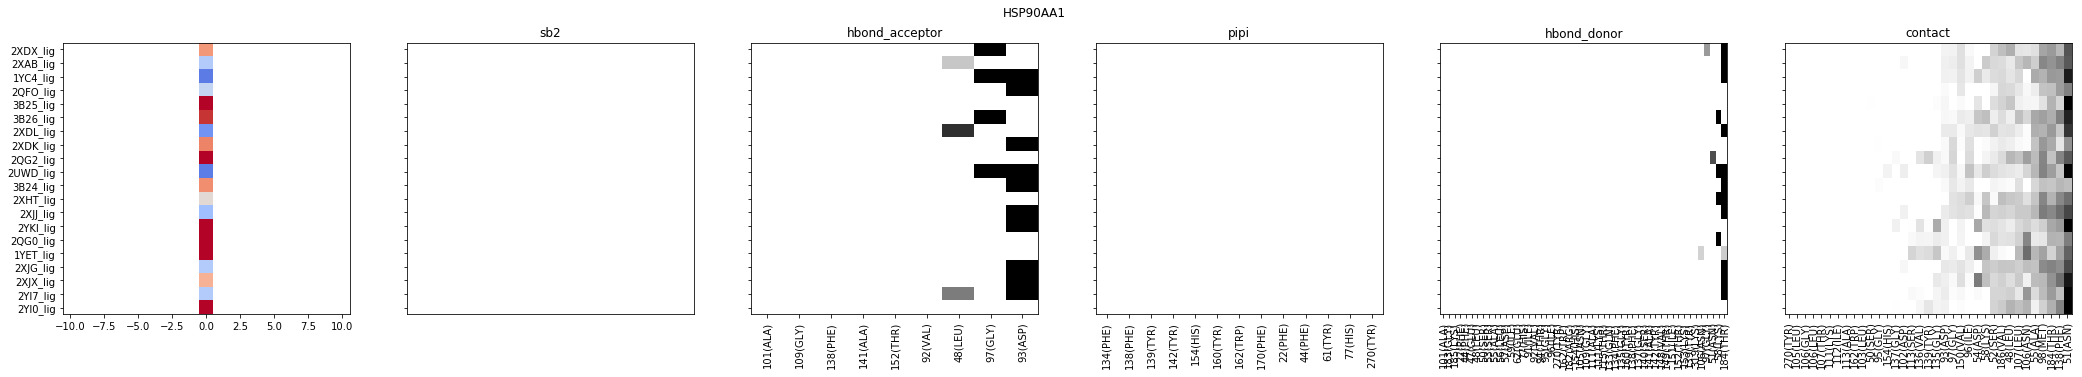

B1AR
crystal


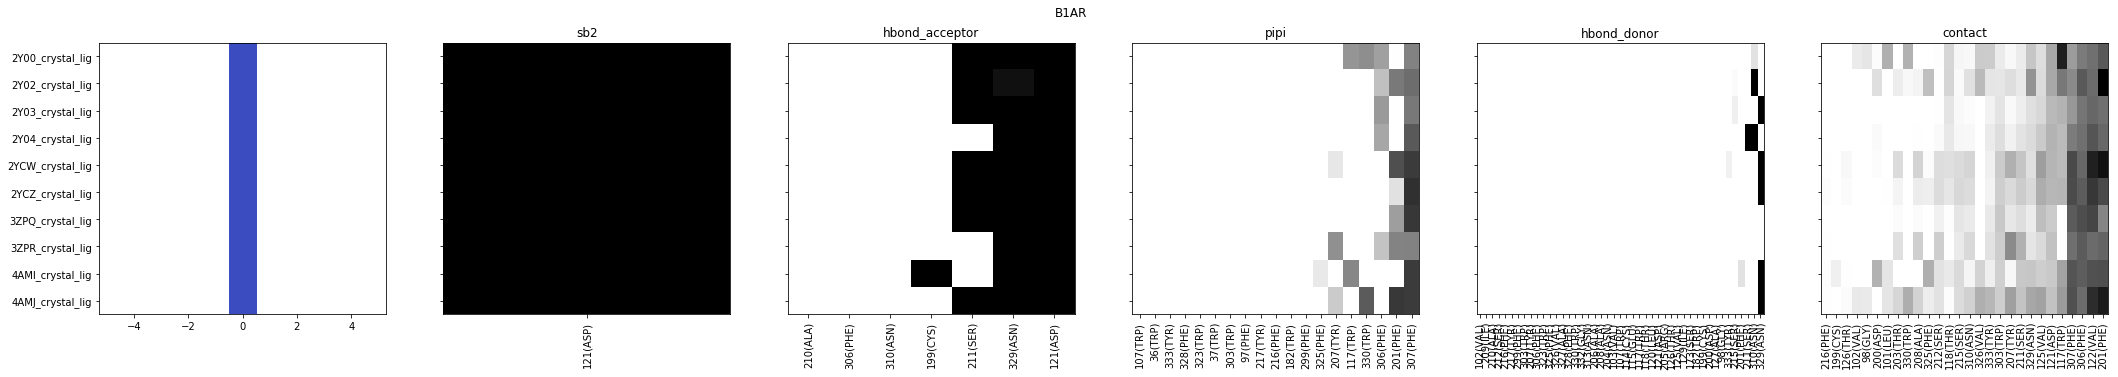

best


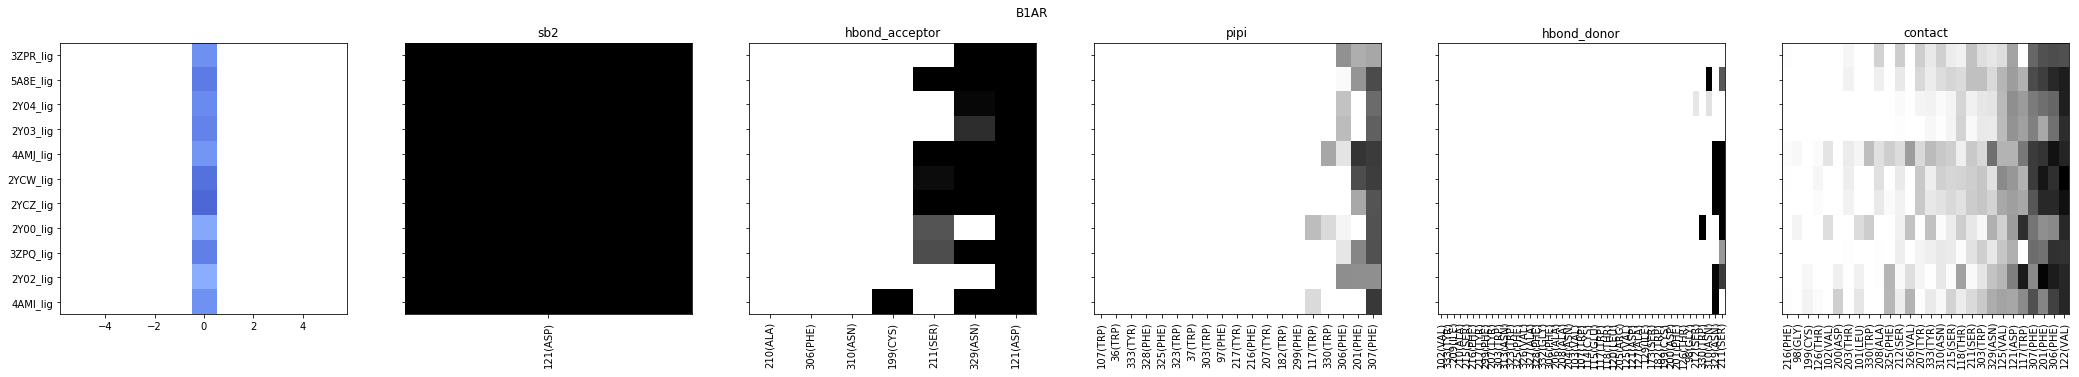

combind


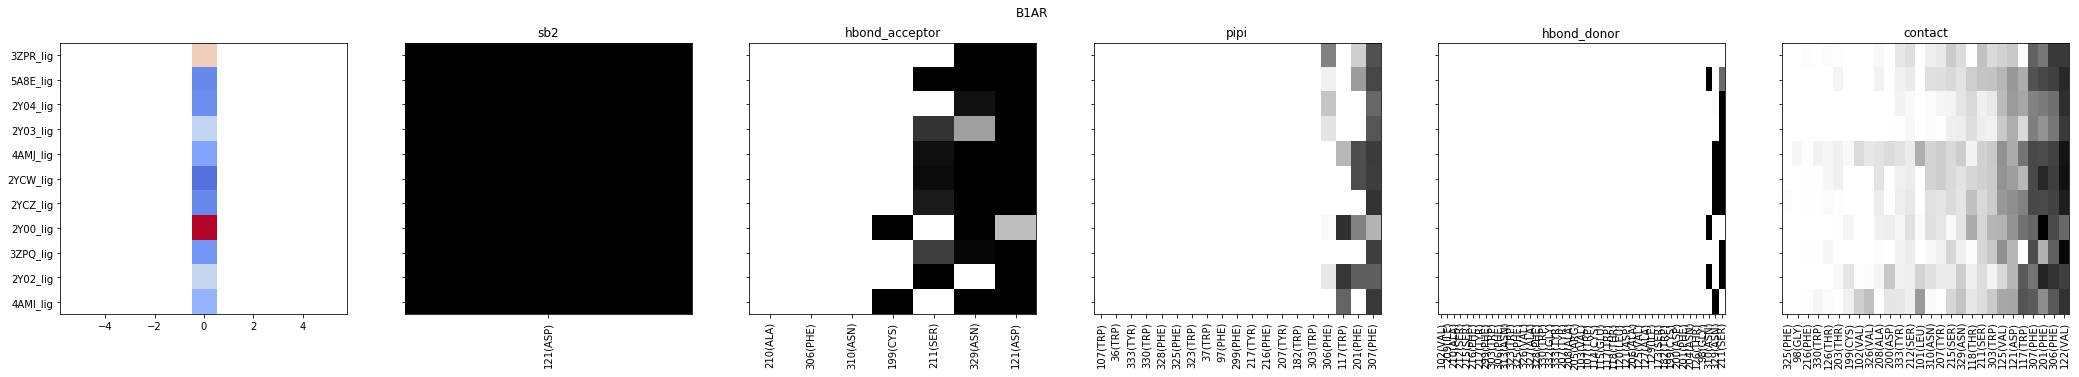

glide


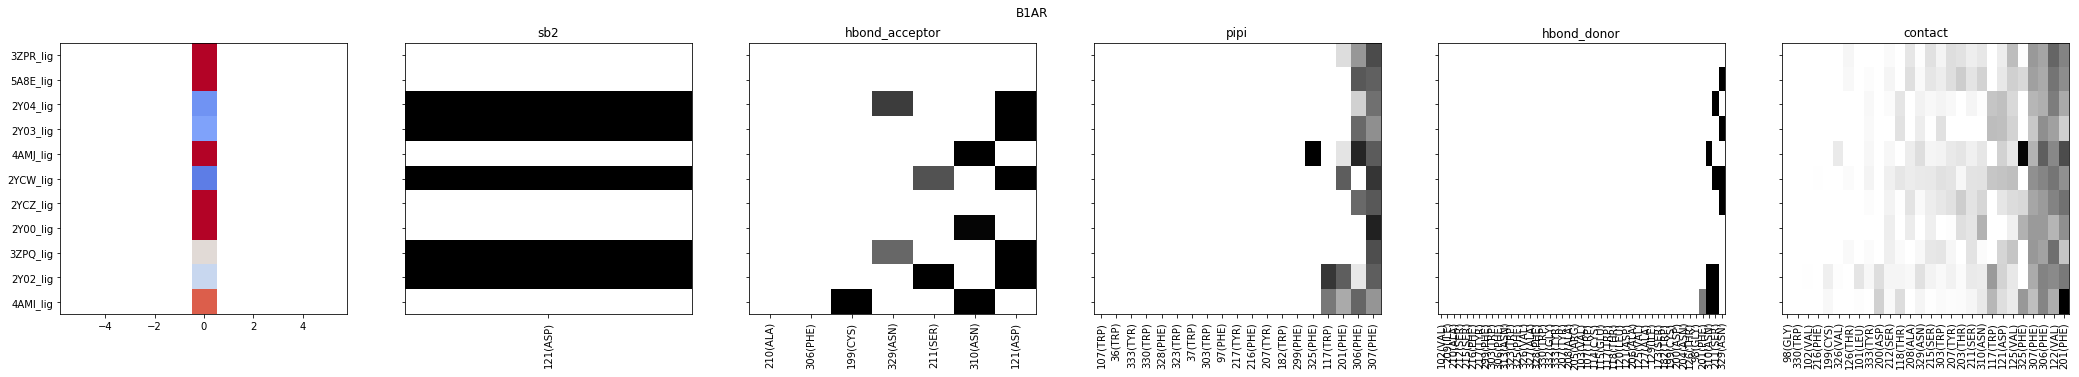

SIGMAR1
[Errno 2] No such file or directory: '/Users/jpaggi/Downloads/combind_data/bpp_data//SIGMAR1/ifp/ifp4/5HK2_struct.fp'
('/Users/jpaggi/Downloads/combind_data/bpp_data//SIGMAR1/ifp/ifp4/5HK2_struct.fp', 'fp not found')
('check', '/Users/jpaggi/Downloads/combind_data/bpp_data//SIGMAR1/ifp/ifp4/5HK2_struct.fp')


KeyError: 0

In [3]:
feature_defs = {
    'hbond_donor':[2],
    'hbond_acceptor': [3],
    'sb2':[1],
    'pipi':[6],
    'contact':[11]
}

def plot_fps(rmsds, fps, ligands, interactions = None):
    if interactions is None: interactions = {}
    f, ax = plt.subplots(1, 6, figsize = (36, 5), sharey = True)
    ax[0].imshow([[rmsds[ligand]] for ligand in ligands], vmin = 0, vmax = 5, cmap = 'coolwarm')
    for i, (name, codes) in enumerate(feature_defs.items()):
        i += 1
        if name not in interactions:
            interactions[name] = sorted(list(set([interaction
                                   for ligand in ligands
                                   for interaction, score in fps[ligand].items()
                                   if interaction[0] in codes])))
        
        X = []
        for ligand in ligands:
            X += [[]]
            for interaction in interactions[name]:
                X[-1] += [fps[ligand][interaction] if interaction in fps[ligand] else 0]
        X = np.array(X)
        
        idx = X.sum(axis = 0).argsort()
        X_sorted = X[:, idx]
        xticks = [interactions[name][j][1][2:] for j in idx]

        if name == 'contact':
            ax[i].imshow(X_sorted, aspect = 'auto', cmap = 'binary')
        else:
            ax[i].imshow(X_sorted, aspect = 'auto', cmap = 'binary', vmin = 0, vmax = 1)
        ax[i].set_xticks(range(len(xticks)))
        ax[i].set_xticklabels(xticks, rotation = 'vertical')
        ax[i].set_title(name)
    
    plt.yticks(range(len(ligands)), ligands)
    plt.suptitle(protein)
    plt.show()
    return interactions

for protein, ligands in results.items():
    print protein
    data = Protein(protein)
    crystal_ligands = [ligand.replace('_lig', '_crystal_lig') for ligand in data.lm.get_xdocked_ligands(10)]
    data.load_docking(crystal_ligands, load_crystal = True, load_fp = True)
    data.load_docking(ligands, load_fp = True)
    
    crystal_fps = {ligand: data.docking[data.lm.st].ligands[ligand].poses[0].fp
                   for ligand in crystal_ligands}
    crystal_rmsds = {ligand: 0.0
                   for ligand in crystal_ligands}

    combind_fps = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[0]].fp
                 for ligand, pose in ligands.items()}
    combind_rmsds = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[0]].rmsd
                    for ligand, pose in ligands.items()}
    
    glide_fps = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[1]].fp
                 for ligand, pose in ligands.items()}
    glide_rmsds = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[1]].rmsd
                    for ligand, pose in ligands.items()}
    
    best_fps = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[2]].fp
                 for ligand, pose in ligands.items()}
    best_rmsds = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[2]].rmsd
                    for ligand, pose in ligands.items()}
    
    print 'crystal'
    interactions = plot_fps(crystal_rmsds, crystal_fps, crystal_ligands)
    
    print 'best'
    plot_fps(best_rmsds,    best_fps,    ligands.keys(), interactions = interactions)
    
    print 'combind'
    plot_fps(combind_rmsds, combind_fps, ligands.keys(), interactions = interactions)

    print 'glide'
    plot_fps(glide_rmsds,   glide_fps,   ligands.keys(), interactions = interactions)

In [6]:
feature_defs = {
    'hbond_donor':[2],
    'hbond_acceptor': [3],
    'sb2':[1],
    'pipi':[6],
    'contact':[11]
}

def plot_fps(rmsds, fps, ligands, interactions = None):
    if interactions is None: interactions = {}
    for i, (name, codes) in enumerate(feature_defs.items()):
        i += 1
        if name not in interactions:
            interactions[name] = sorted(list(set([interaction
                                   for ligand in ligands
                                   for interaction, score in fps[ligand].items()
                                   if interaction[0] in codes])))
        
        X = []
        for ligand in ligands:
            X += [[]]
            for interaction in interactions[name]:
                X[-1] += [fps[ligand][interaction] if interaction in fps[ligand] else 0]
        X = np.array(X)
        
        print name, X.sum()
    return interactions

for protein, ligands in results.items():
    print protein
    data = Protein(protein)
    crystal_ligands = [ligand.replace('_lig', '_crystal_lig') for ligand in data.lm.get_xdocked_ligands(10)]
    data.load_docking(crystal_ligands, load_crystal = True, load_fp = True)
    data.load_docking(ligands, load_fp = True)
    
    crystal_fps = {ligand: data.docking[data.lm.st].ligands[ligand].poses[0].fp
                   for ligand in crystal_ligands}
    crystal_rmsds = {ligand: 0.0
                   for ligand in crystal_ligands}

    combind_fps = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[0]].fp
                 for ligand, pose in ligands.items()}
    combind_rmsds = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[0]].rmsd
                    for ligand, pose in ligands.items()}
    
    glide_fps = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[1]].fp
                 for ligand, pose in ligands.items()}
    glide_rmsds = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[1]].rmsd
                    for ligand, pose in ligands.items()}
    
    best_fps = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[2]].fp
                 for ligand, pose in ligands.items()}
    best_rmsds = {ligand: data.docking[data.lm.st].ligands[ligand].poses[pose[2]].rmsd
                    for ligand, pose in ligands.items()}
    
    print 'crystal'
    interactions = plot_fps(crystal_rmsds, crystal_fps, crystal_ligands)
    
    print 'best'
    plot_fps(best_rmsds,    best_fps,    ligands.keys(), interactions = interactions)
    
    print 'combind'
    plot_fps(combind_rmsds, combind_fps, ligands.keys(), interactions = interactions)

    print 'glide'
    plot_fps(glide_rmsds,   glide_fps,   ligands.keys(), interactions = interactions)

ELANE
crystal
sb2 0.0
hbond_acceptor 2.96755806682
pipi 14.8154698183
hbond_donor 7.12494826804
contact 1822.40404516
best
sb2 0.0
hbond_acceptor 1.0
pipi 14.4762226819
hbond_donor 4.33918686375
contact 1548.52643579
combind
sb2 0.0
hbond_acceptor 1.0
pipi 13.8577889341
hbond_donor 6.560046269
contact 1654.21491898
glide
sb2 0.0
hbond_acceptor 0
pipi 13.7907755458
hbond_donor 5.29944404618
contact 1612.70108939
VDR
crystal
sb2 0.0
hbond_acceptor 28.841187
pipi 0.0
hbond_donor 28.2430634561
contact 2637.42188028
best
sb2 0.0
hbond_acceptor 40.3024641603
pipi 0.0
hbond_donor 41.219210491
contact 5088.31017046
combind
sb2 0.0
hbond_acceptor 48.33555678
pipi 0.0
hbond_donor 49.1874001817
contact 5182.42724352
glide
sb2 0.0
hbond_acceptor 48.1510231823
pipi 0.0
hbond_donor 49.5293561938
contact 5177.89514769
5HT2B
crystal
sb2 3.0
hbond_acceptor 5.04811729737
pipi 5.33581377378
hbond_donor 2.0
contact 949.075490838
best
sb2 2.0
hbond_acceptor 3.36583659087
pipi 3.51193279344
hbond_donor 2.0


OSError: [Errno 5] Input/output error: '/Users/jpaggi/Downloads/combind_data/bpp_data//PTPN1/ligands/prepared_ligands'